## Data Cleaning

In [142]:
#importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [143]:
#importing our dataset
df = pd.read_excel('1. Data.xlsx', sheet_name='VU')
df.head()

Глубина манометра    Dшт  Руст(ср)  Рзаб(ср)  Pлин(ср)  Руст(кон)  \
0             3576.3   7.94     249.6     370.1     101.8      249.0   
1             3576.3   9.53     233.5     364.6     101.3      249.0   
2             3576.3  11.11     213.4     357.1     101.6      211.0   
3             3576.3  12.70     191.6     347.4      98.4      187.0   
4             3576.3  14.29     171.9     337.7      99.2      169.0   

   Рзаб(кон)  Рлин(кон)  Туст  Тна шлейфе   Тзаб  Tлин  Дебит газа(ст)  \
0      359.6      101.8  53.0        31.7  103.2  32.5         214.704   
1      338.1      102.4  58.8        37.6  103.0  38.6         290.594   
2      314.8      100.6  63.6        42.8  102.6  43.4         368.042   
3      291.5       99.0  64.7        46.2  102.0  46.1         434.663   
4      270.3       99.5  64.0        49.4  104.4  49.9         483.283   

   Дебит ст. конд.(ст)  Дебит воды(ст)  Дебит смеси(ст)  Дебит газа(лин)  \
0                 83.6             0.4        231.24884      1610.368866   
1                104.7             1.4        309.00166      2310.226429   
2                114.3             1.9        388.11498      3039.489680   
3                121.3             3.3        455.21452      3824.082686   
4                129.8             4.6        504.58778      4299.104676   

   Дебит кон нестабильный(лин)  Дебит воды(лин)   Нэф  \
0                        131.3              0.4  56.8   
1                        158.5              1.4  56.8   
2                        172.3              1.9  56.8   
3                        181.5              3.3  56.8   
4                        190.6              4.7  56.8   

   Рпл. Тек (послед точка на КВД)  Рпл. Тек (Расчет по КВД)  \
0                           45.25                      56.5   
1                           45.25                      56.5   
2                           45.25                      56.5   
3                           45.25                      56.5   
4                           45.25                      56.5   

   Рпл. Тек (Карноухов)   Pсб      Ro_g   Ro_c    Ro_w  \
0                   NaN  93.6  0.806017  801.0  1000.0   
1                   NaN  92.9  0.806017  801.0  1000.0   
2                   NaN  91.4  0.806017  801.0  1000.0   
3                   NaN  89.2  0.806017  801.0  1000.0   
4                   NaN  89.7  0.806017  801.0  1000.0   

   Удельная плотность газа    G_total       КГФ  
0                  0.669449  2.782623  311.9094  
1                  0.669449  3.697781  288.6003  
2                  0.669449  4.515073  248.7906  
3                  0.669449  5.217673  223.5591  
4                  0.669449  5.765092  215.1486

In [144]:
#Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        90 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       90 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

In [145]:
#getting statstical info about the dataset
df.describe()

Глубина манометра        Dшт    Руст(ср)    Рзаб(ср)    Pлин(ср)  \
count          90.000000  93.000000   93.000000   90.000000   93.000000   
mean         3524.086667  10.951183  228.293412  331.762255   99.860962   
std           144.474862   2.423172   41.897238   56.481235    7.300663   
min          3276.000000   6.350000  138.157895  174.000000   73.306638   
25%          3427.625000   9.530000  201.636750  297.797500   95.945951   
50%          3579.000000  11.110000  229.894737  337.789172  100.800000   
75%          3652.250000  12.700000  252.000000  364.150000  103.865199   
max          3670.000000  15.880000  337.108108  458.600000  121.682930   

        Руст(кон)   Рзаб(кон)   Рлин(кон)       Туст  Тна шлейфе        Тзаб  \
count   93.000000   90.000000   93.000000  93.000000   60.000000   90.000000   
mean   227.837817  330.334444   98.005453  56.172043   43.091667  104.961400   
std     41.814527   56.357493   12.425851  11.250781   19.602337    1.250941   
min    136.000000  174.000000   40.739839  24.200000   14.000000  100.210000   
25%    200.000000  294.625000   95.335032  50.300000   33.300000  104.525000   
50%    228.000000  334.250000  100.260000  58.000000   38.700000  105.110000   
75%    252.000000  362.150000  104.000000  64.000000   46.375000  105.567500   
max    333.000000  458.500000  123.616800  75.000000  110.200000  107.071000   

            Tлин  Дебит газа(ст)  Дебит ст. конд.(ст)  Дебит воды(ст)  \
count  93.000000       93.000000            93.000000       93.000000   
mean   39.798184      394.402772            99.909533        2.132827   
std     8.937669      150.354801            49.140664        1.874972   
min    16.204686      128.365641            33.629767        0.000000   
25%    33.688653      287.950295            69.900000        0.700000   
50%    40.519491      383.719622            89.800000        1.400000   
75%    47.800000      489.673000           117.600000        3.200000   
max    55.513904      846.816143           302.621077        8.340288   

       Дебит смеси(ст)  Дебит газа(лин)  Дебит кон нестабильный(лин)  \
count        89.000000        93.000000                    93.000000   
mean        417.021121      3282.971050                   164.151613   
std         157.746532      1353.043667                    85.225100   
min         136.815245       884.000000                    59.800000   
25%         306.243434      2223.000000                   116.800000   
50%         401.391397      3112.000000                   143.500000   
75%         509.046953      4165.000000                   185.200000   
max         896.908271      6943.100000                   492.800000   

       Дебит воды(лин)        Нэф  Рпл. Тек (послед точка на КВД)  \
count        93.000000  93.000000                       88.000000   
mean          2.163441  52.703325                       40.682881   
std           1.903132  12.149424                        5.374353   
min           0.000000  30.000000                       29.170000   
25%           0.700000  44.200000                       37.210000   
50%           1.400000  56.800000                       39.466050   
75%           3.300000  63.500000                       42.860000   
max           8.100000  72.539800                       53.270000   

       Рпл. Тек (Расчет по КВД)  Рпл. Тек (Карноухов)         Pсб       Ro_g  \
count                 81.000000             64.000000   93.000000  23.000000   
mean                  50.943684             50.773438   95.162366   0.807631   
std                    4.378416              4.006591    5.136060   0.015076   
min                   39.900000             41.600000   85.500000   0.787416   
25%                   48.300000             49.425000   90.700000   0.787416   
50%                   50.800000             50.900000   94.200000   0.806017   
75%                   55.400000             52.700000   99.800000   0.821344   
max                   56.700000          

In [146]:
#adding additional statsical parameters to check our data
C = len(df.columns)
L = len(df.index)
CN = df.count()
NP = ((L-CN)/L)*100
MN = df.min()
Q1 = df.quantile(q=0.25)
MA=df.mean() 
ME=df.median() 
Q3=df.quantile(q=0.75) 
MX=df.max() 
ST=df.std() 
P=df.nunique() 
IQ=Q3-Q1 

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

In [147]:
#removing features with too many missing values and whose power is 1
df = df.drop(columns=['Ro_g','Ro_w'])
df.head()

Глубина манометра    Dшт  Руст(ср)  Рзаб(ср)  Pлин(ср)  Руст(кон)  \
0             3576.3   7.94     249.6     370.1     101.8      249.0   
1             3576.3   9.53     233.5     364.6     101.3      249.0   
2             3576.3  11.11     213.4     357.1     101.6      211.0   
3             3576.3  12.70     191.6     347.4      98.4      187.0   
4             3576.3  14.29     171.9     337.7      99.2      169.0   

   Рзаб(кон)  Рлин(кон)  Туст  Тна шлейфе   Тзаб  Tлин  Дебит газа(ст)  \
0      359.6      101.8  53.0        31.7  103.2  32.5         214.704   
1      338.1      102.4  58.8        37.6  103.0  38.6         290.594   
2      314.8      100.6  63.6        42.8  102.6  43.4         368.042   
3      291.5       99.0  64.7        46.2  102.0  46.1         434.663   
4      270.3       99.5  64.0        49.4  104.4  49.9         483.283   

   Дебит ст. конд.(ст)  Дебит воды(ст)  Дебит смеси(ст)  Дебит газа(лин)  \
0                 83.6             0.4        231.24884      1610.368866   
1                104.7             1.4        309.00166      2310.226429   
2                114.3             1.9        388.11498      3039.489680   
3                121.3             3.3        455.21452      3824.082686   
4                129.8             4.6        504.58778      4299.104676   

   Дебит кон нестабильный(лин)  Дебит воды(лин)   Нэф  \
0                        131.3              0.4  56.8   
1                        158.5              1.4  56.8   
2                        172.3              1.9  56.8   
3                        181.5              3.3  56.8   
4                        190.6              4.7  56.8   

   Рпл. Тек (послед точка на КВД)  Рпл. Тек (Расчет по КВД)  \
0                           45.25                      56.5   
1                           45.25                      56.5   
2                           45.25                      56.5   
3                           45.25                      56.5   
4                           45.25                      56.5   

   Рпл. Тек (Карноухов)   Pсб   Ro_c  Удельная плотность газа    G_total  \
0                   NaN  93.6  801.0                  0.669449  2.782623   
1                   NaN  92.9  801.0                  0.669449  3.697781   
2                   NaN  91.4  801.0                  0.669449  4.515073   
3                   NaN  89.2  801.0                  0.669449  5.217673   
4                   NaN  89.7  801.0                  0.669449  5.765092   

        КГФ  
0  311.9094  
1  288.6003  
2  248.7906  
3  223.5591  
4  215.1486

<Axes: >

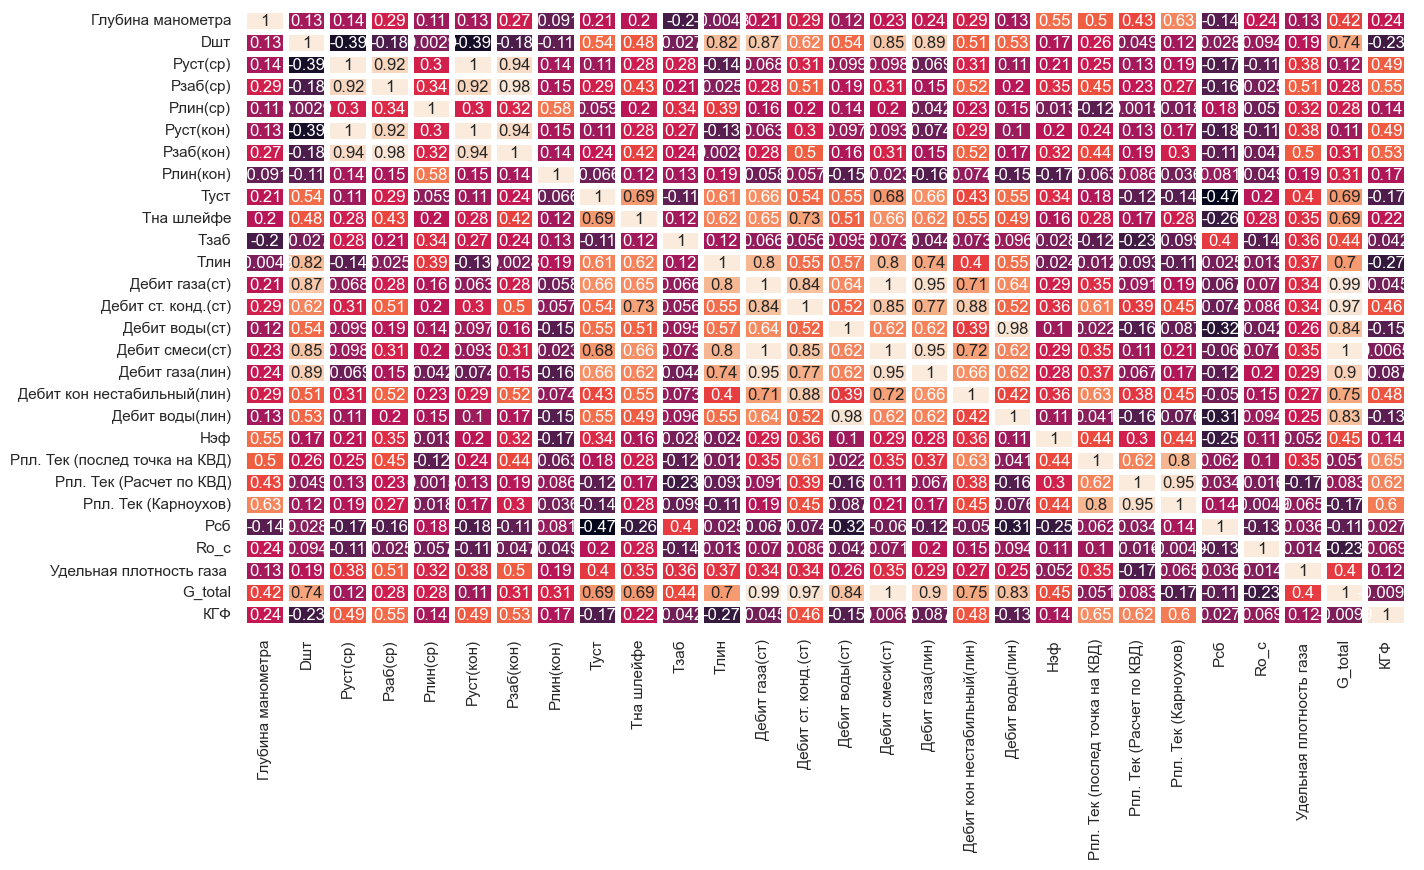

In [148]:
#creating a heat map to visualise the correlation between features

sns.set(rc={'figure.figsize': (15,8),})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Axes: >

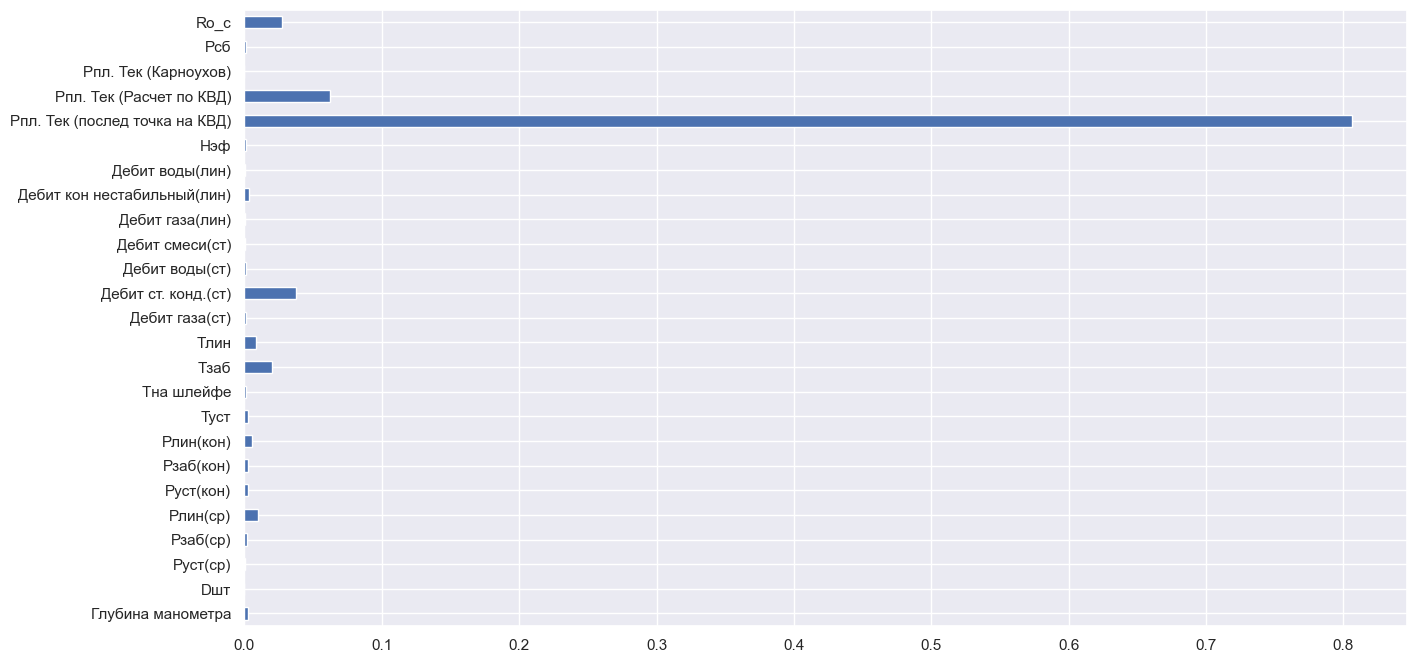

In [149]:
#extracting feature importances
df1=df.fillna(-100)
X=df1.iloc[:, 0:25]
Y=df1.iloc[:, 26:27]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')



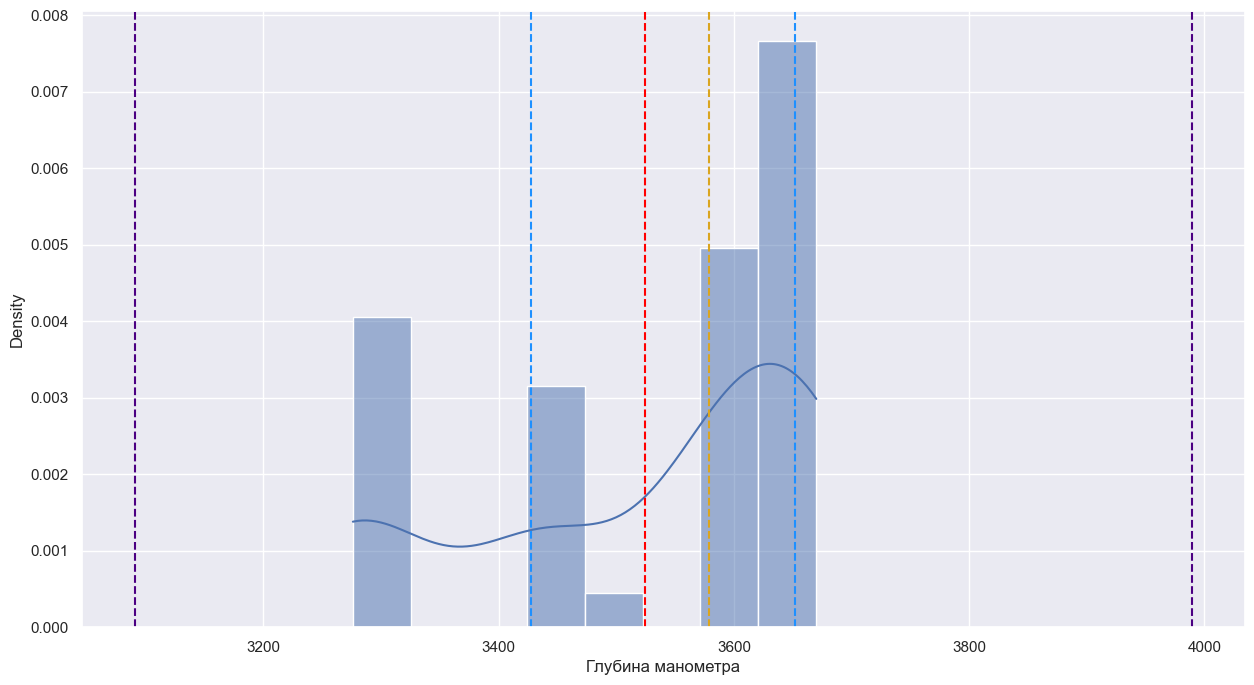

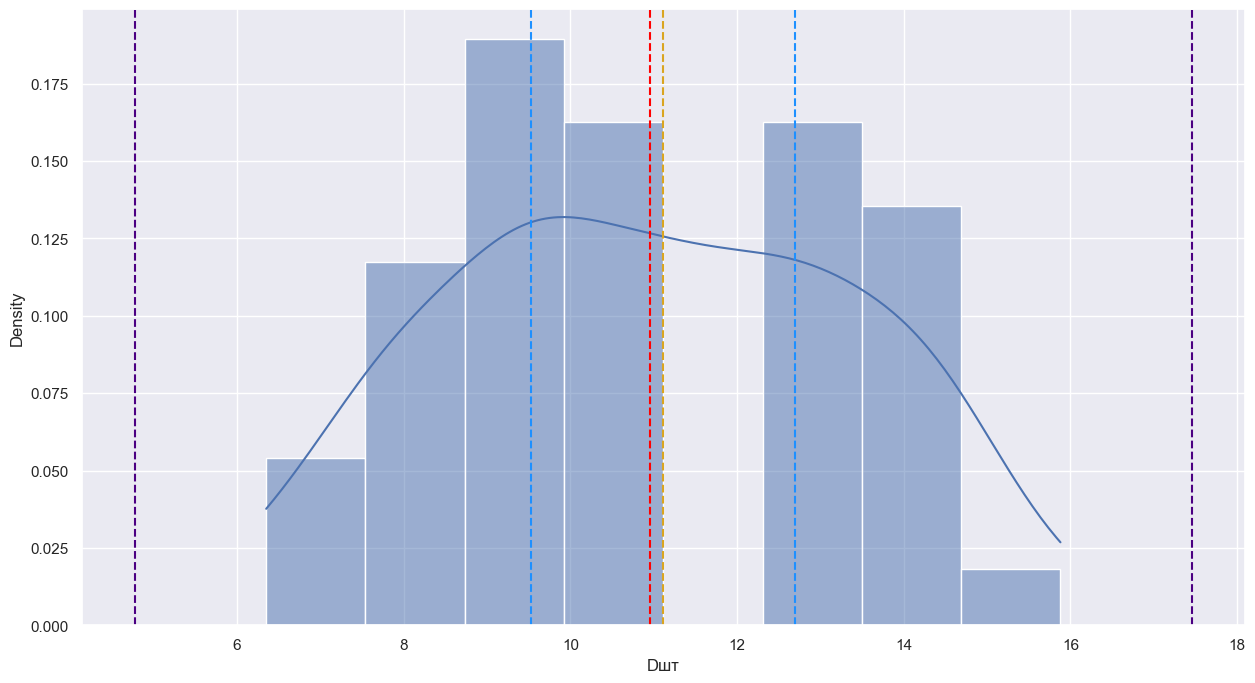

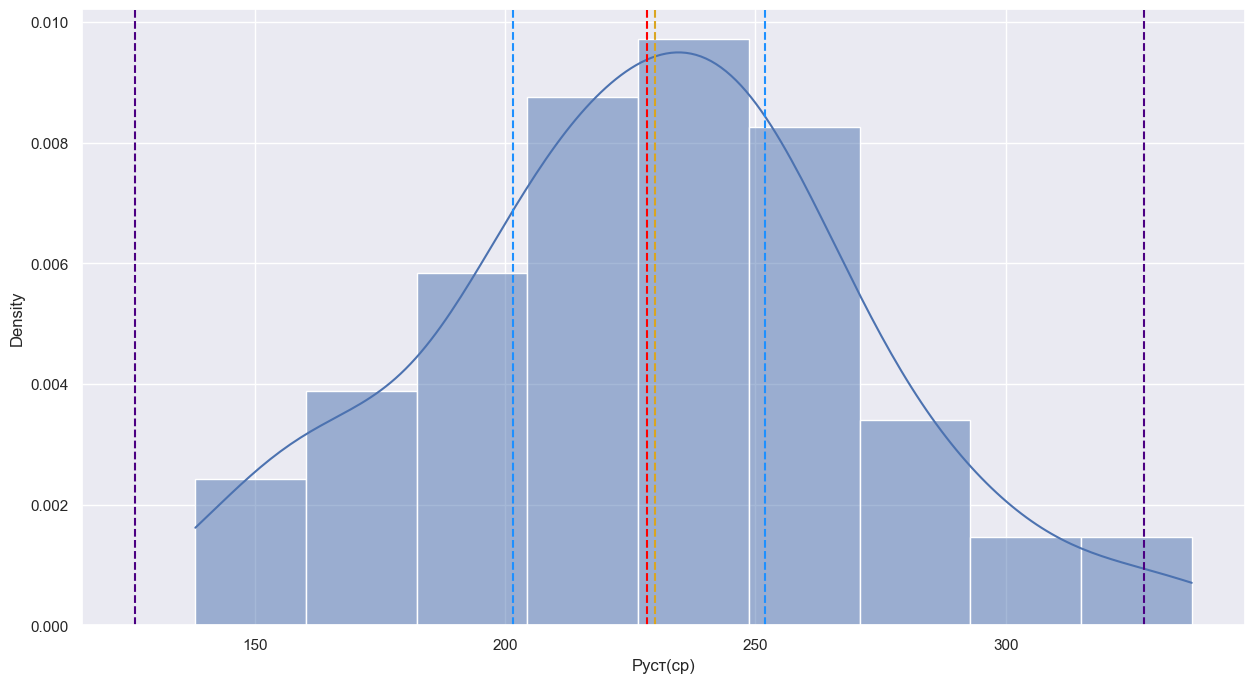

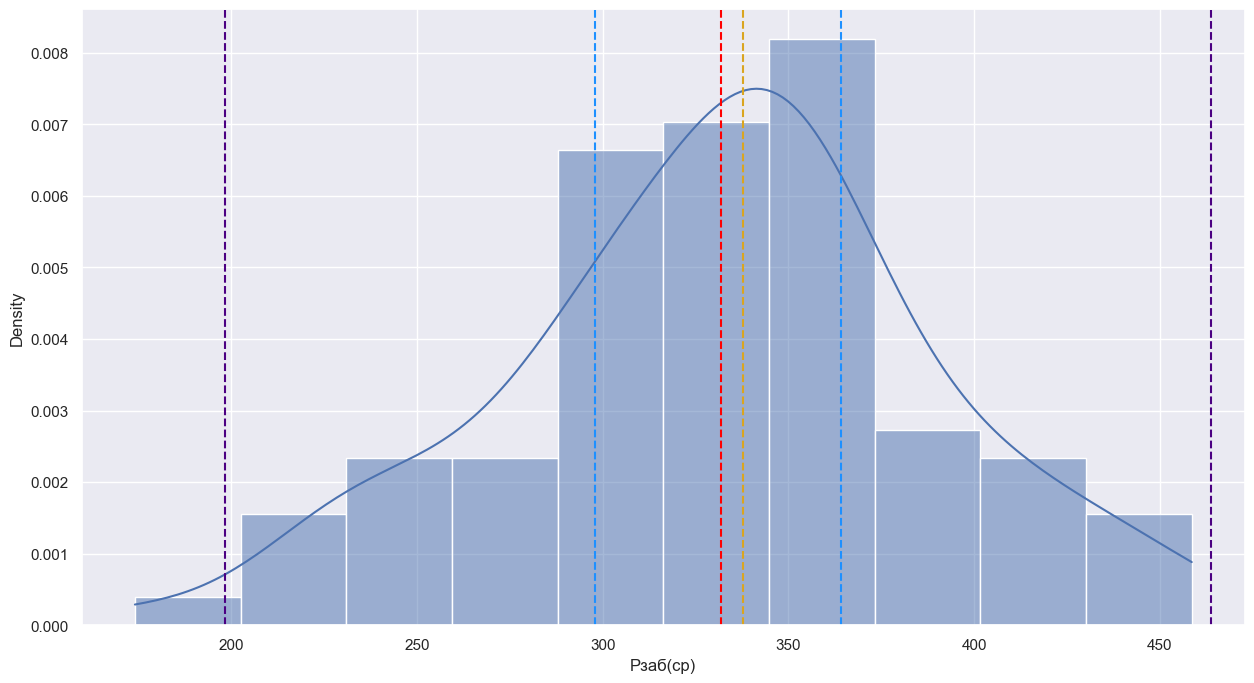

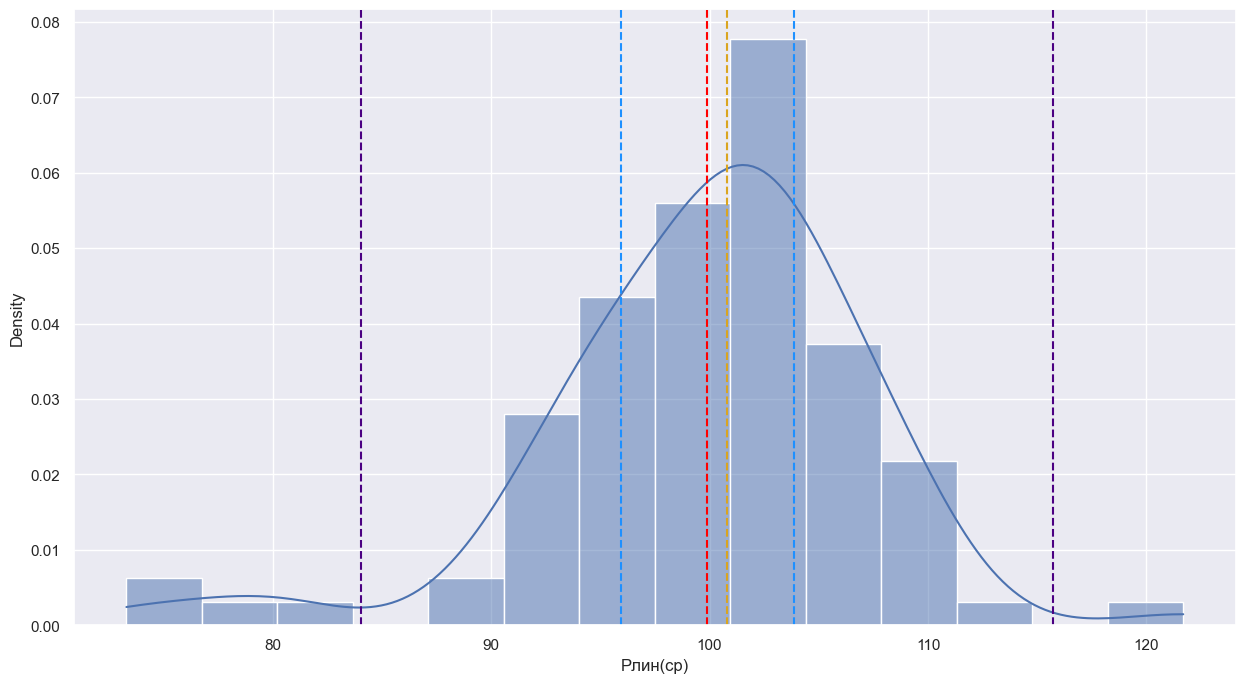

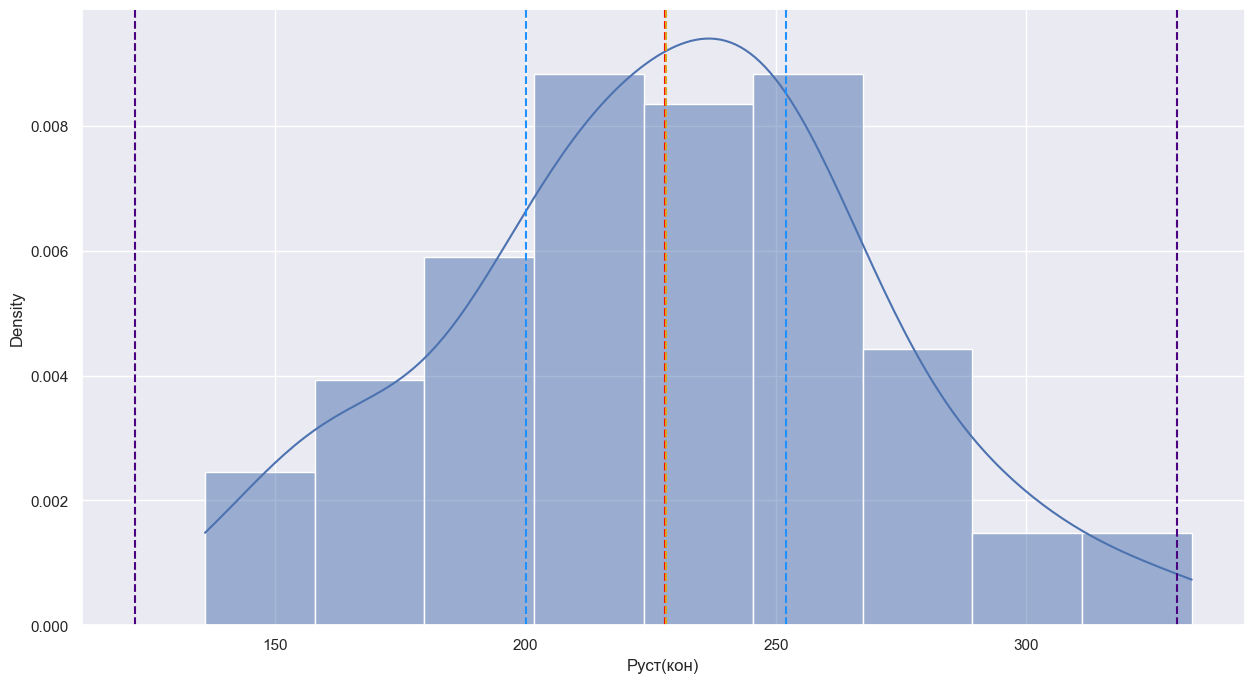

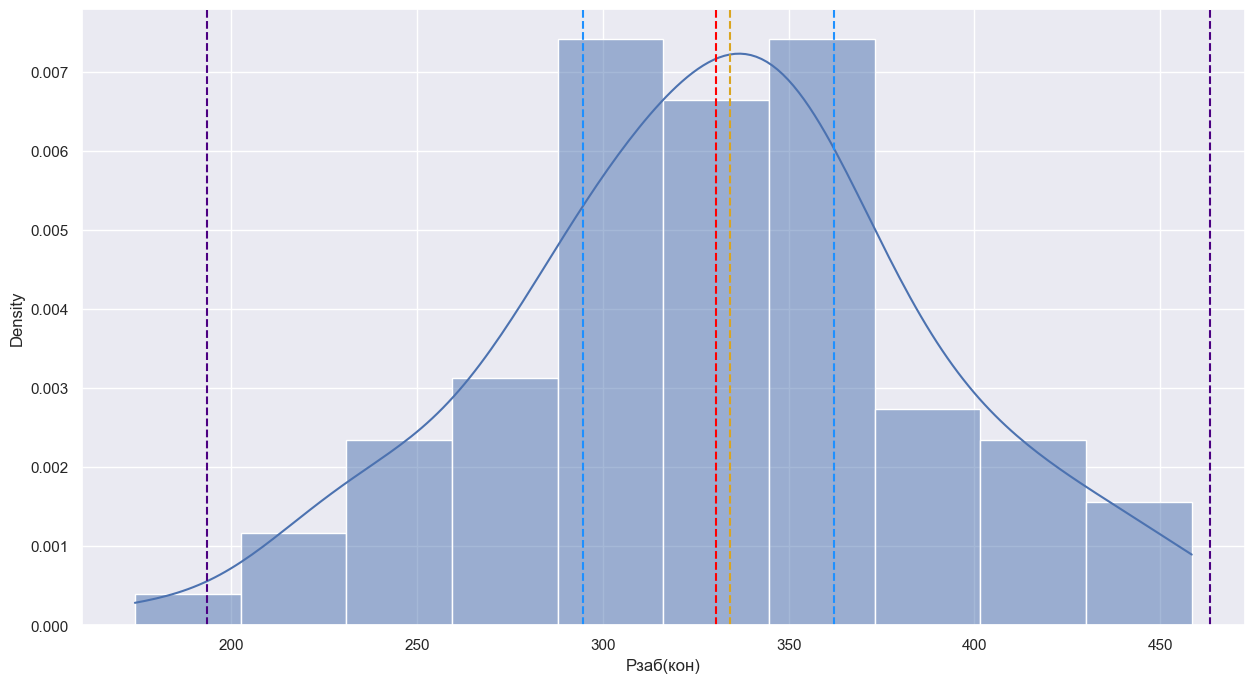

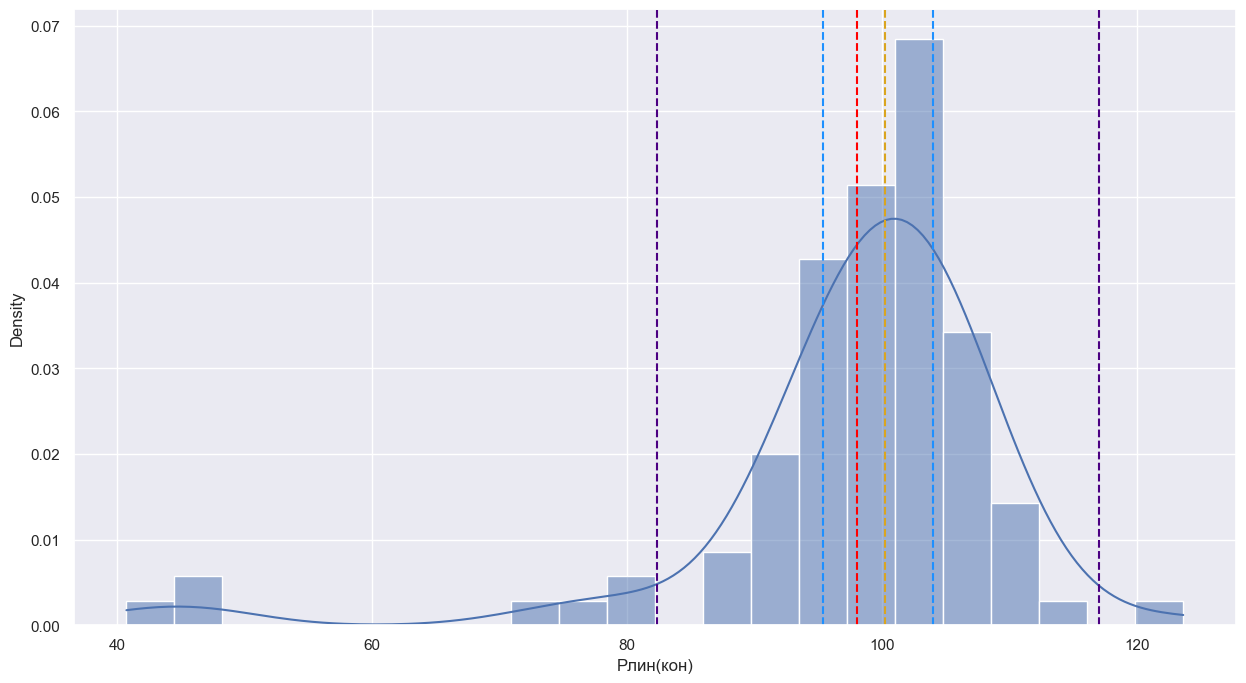

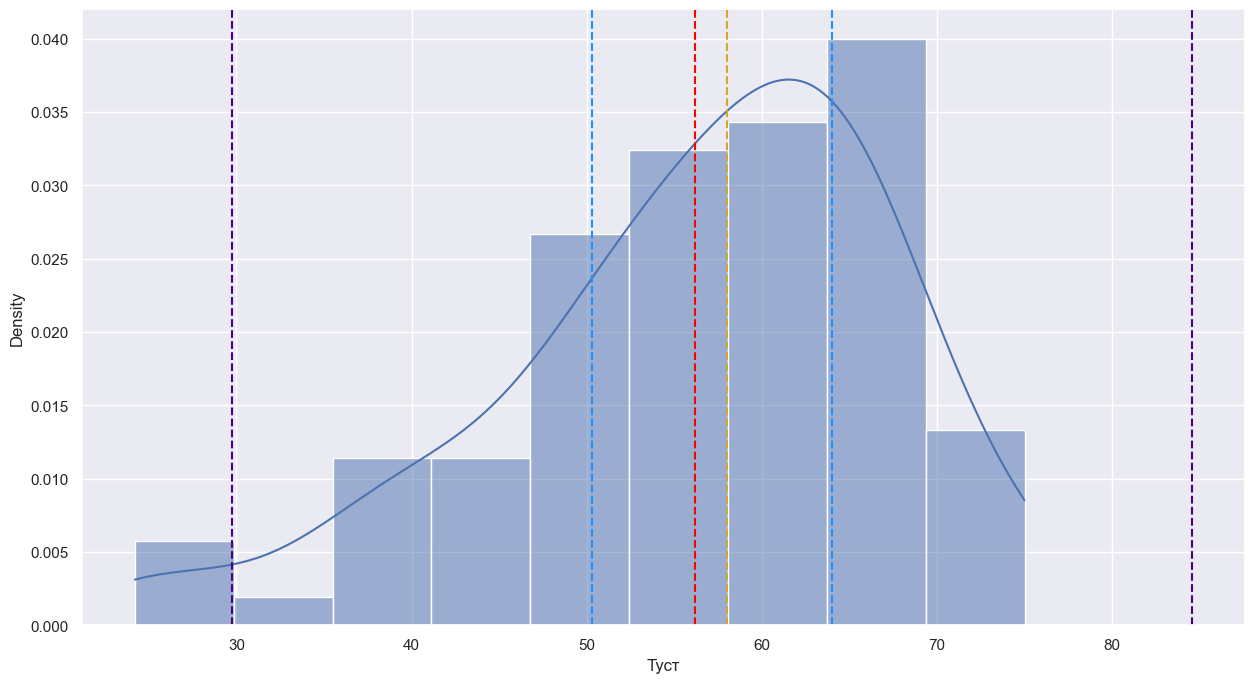

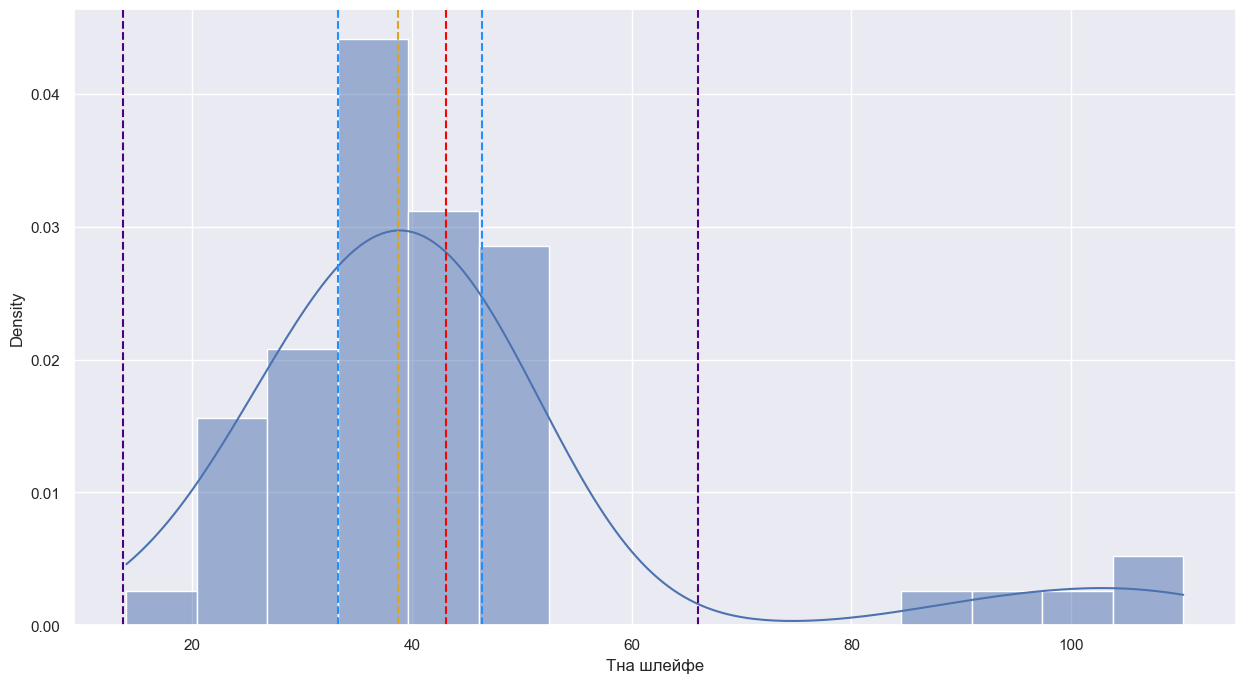

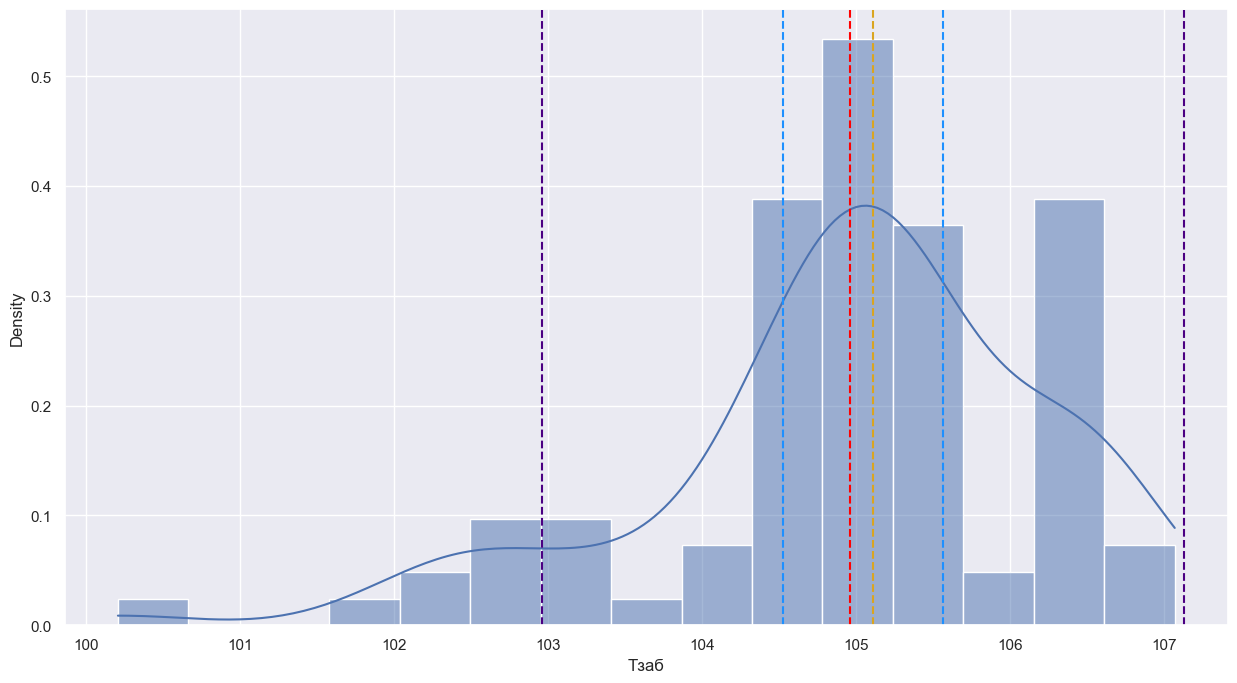

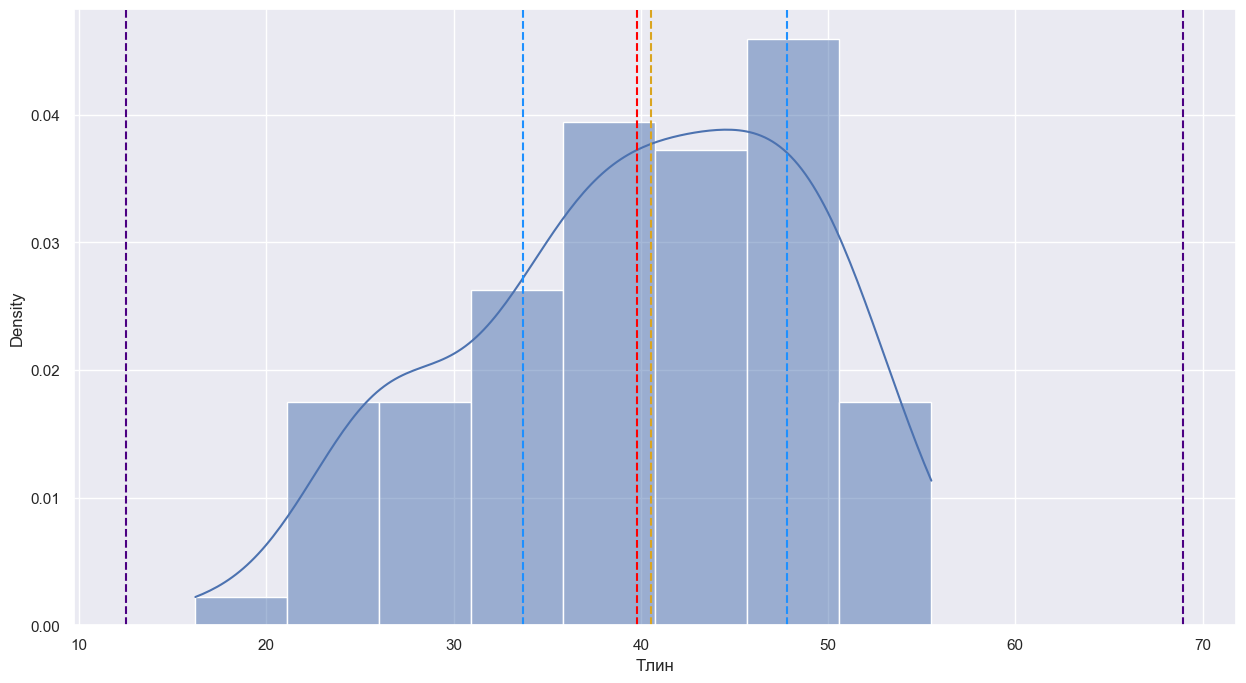

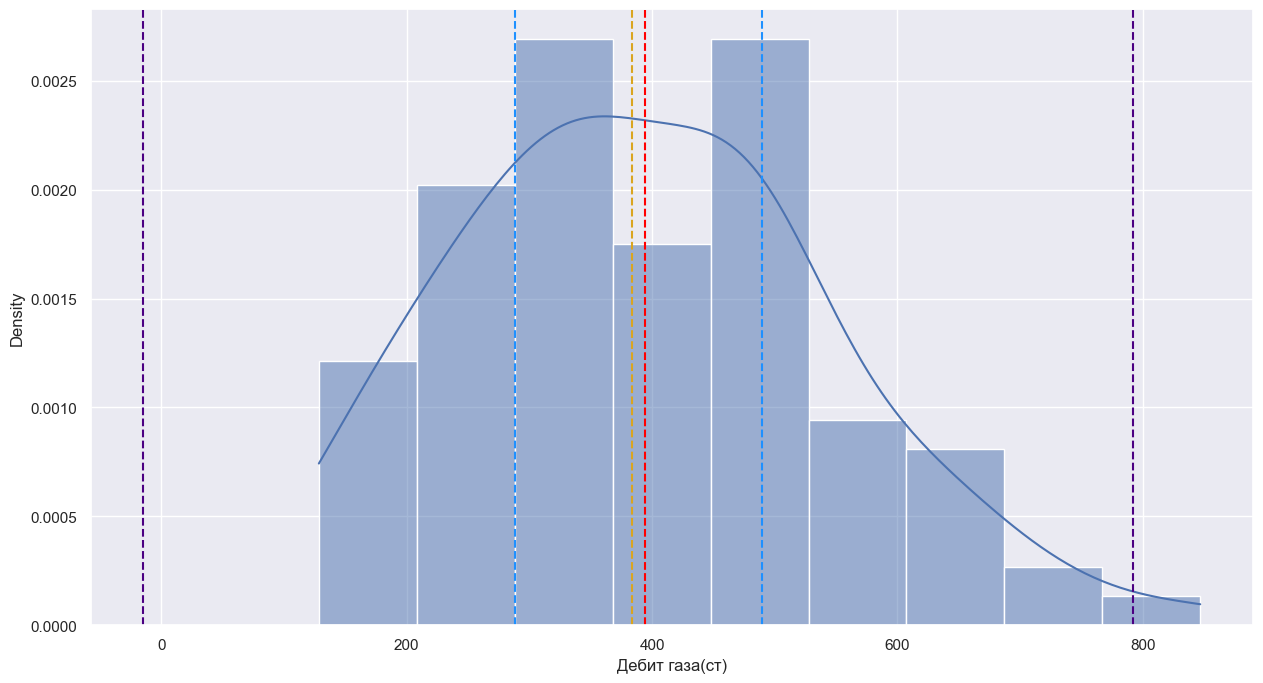

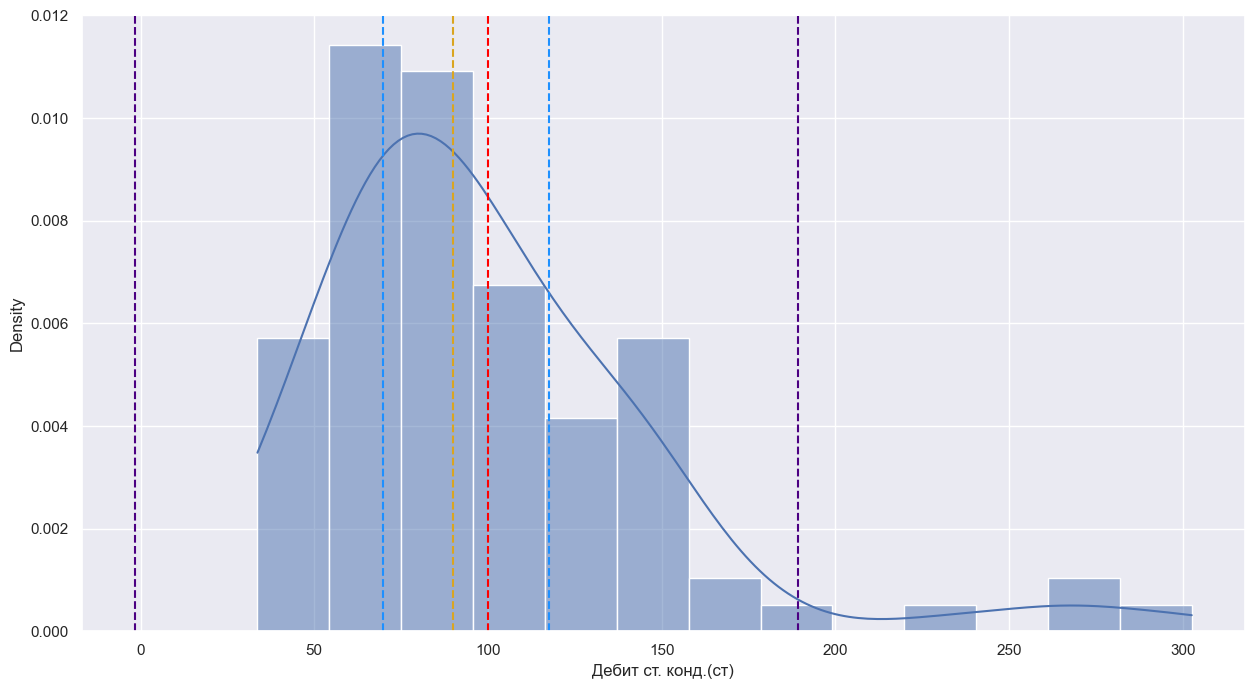

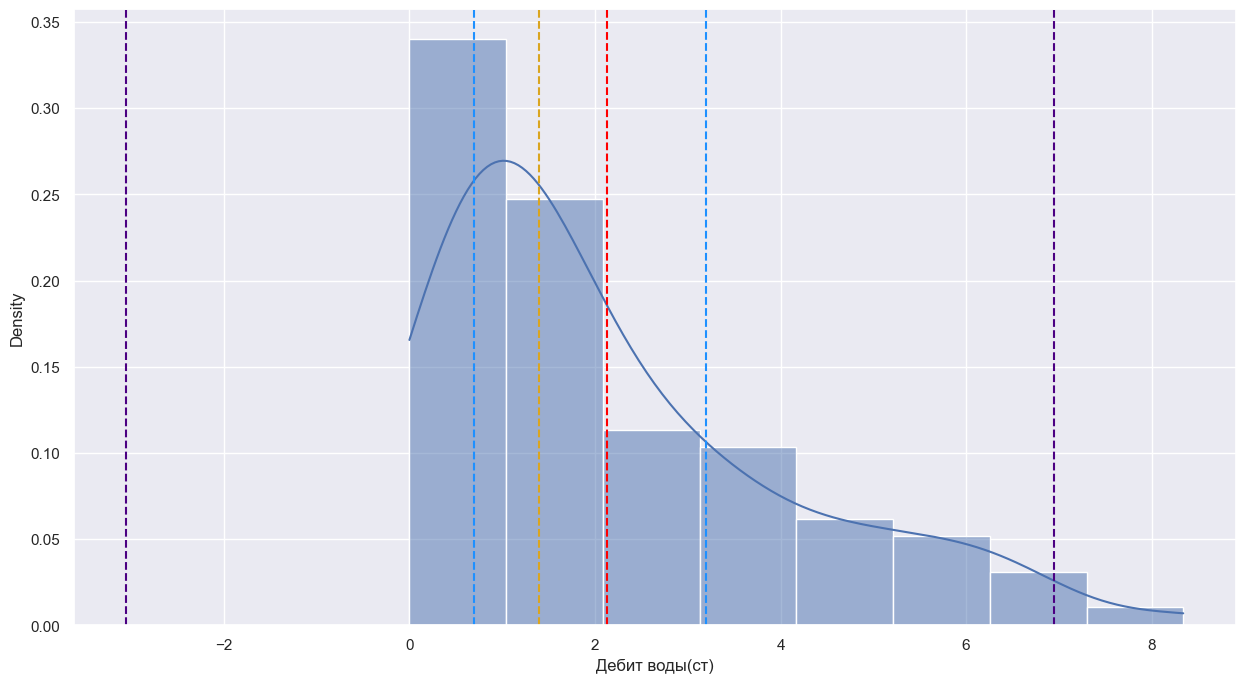

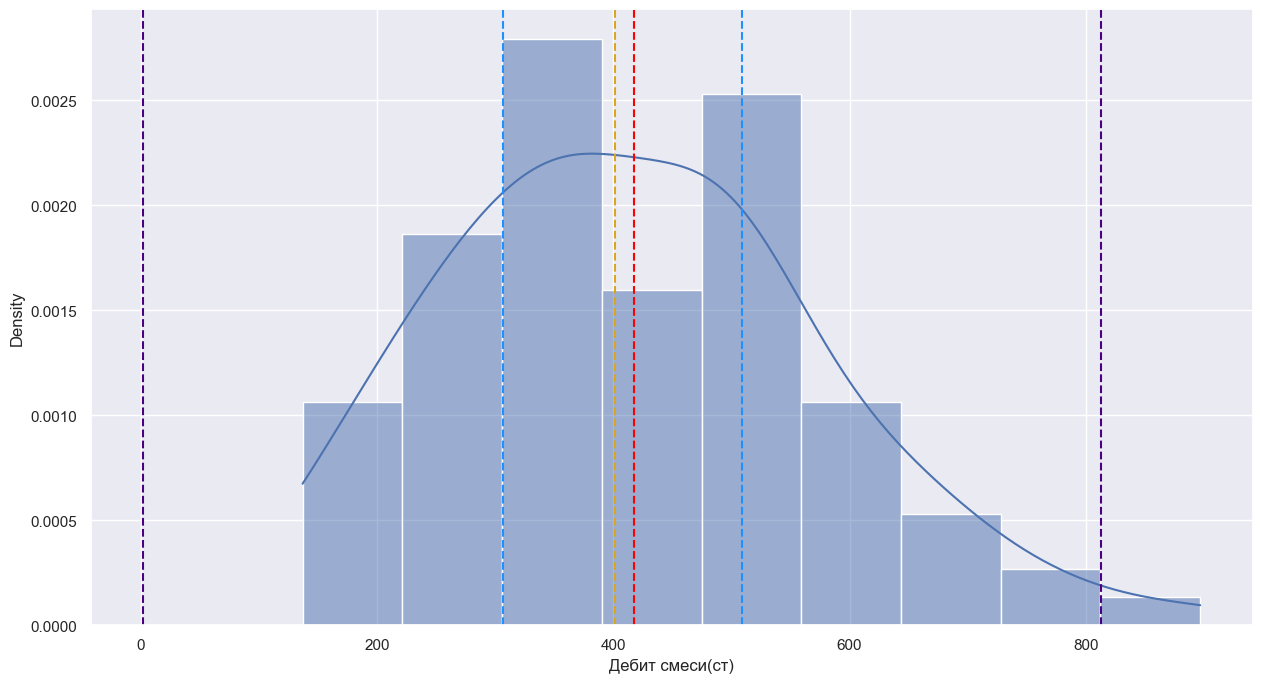

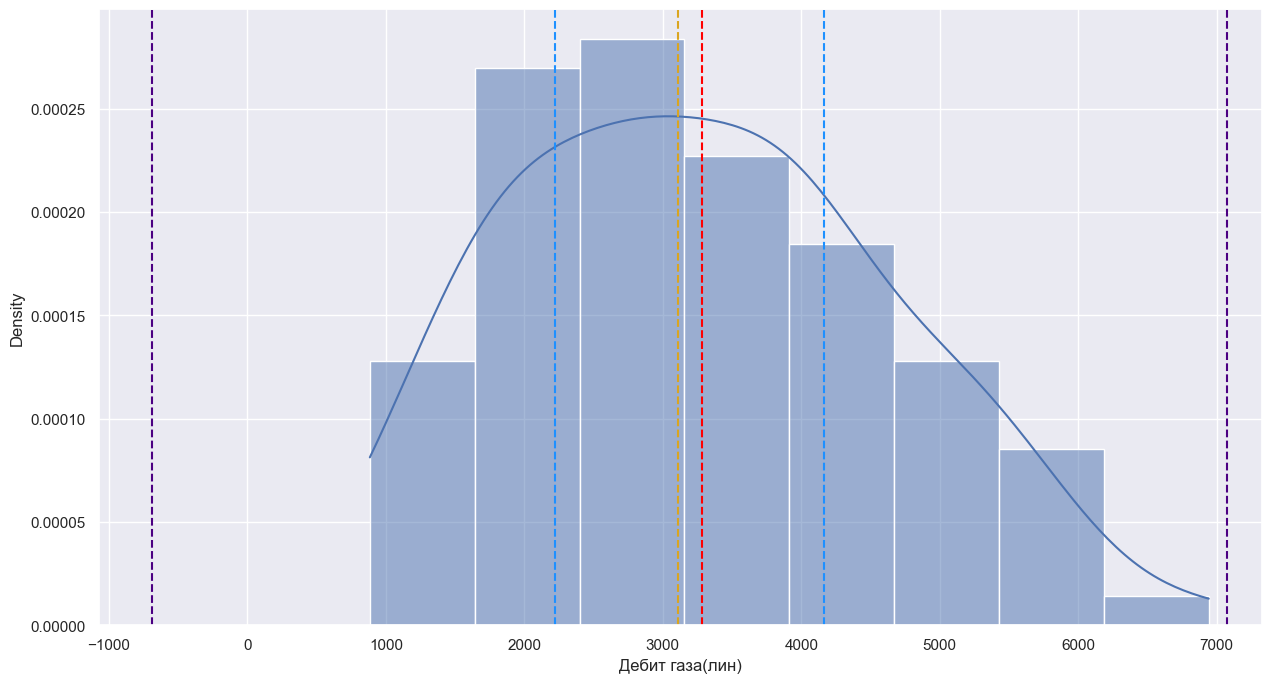

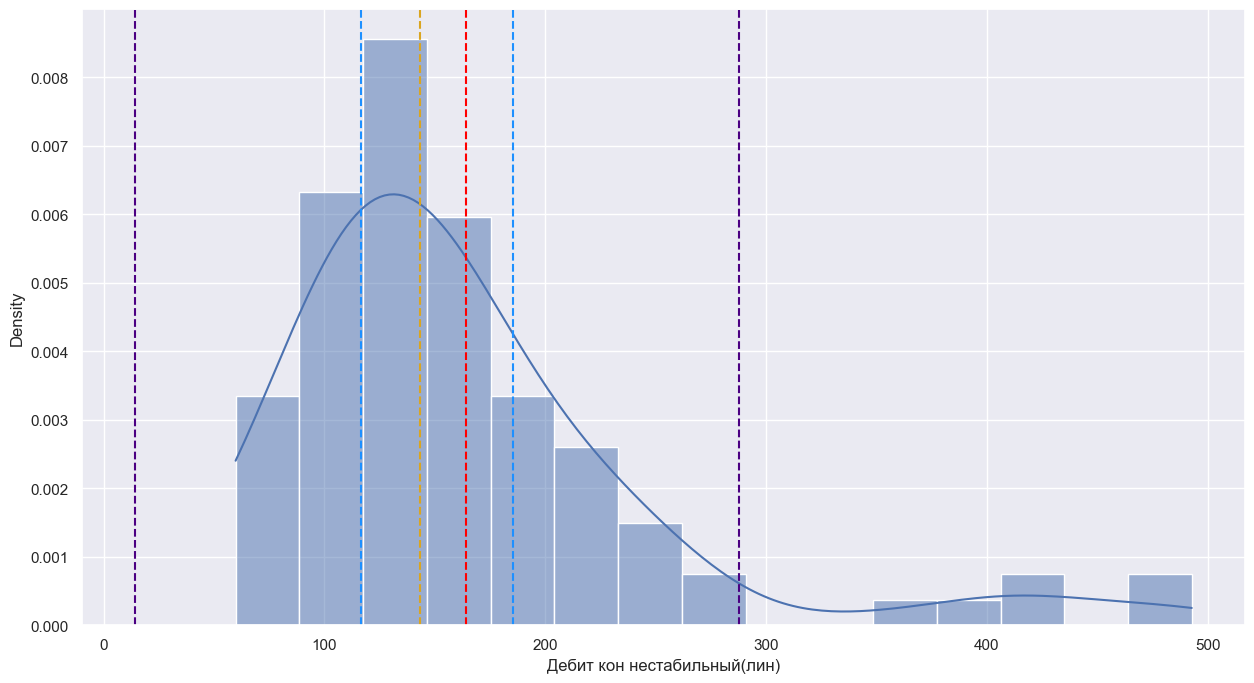

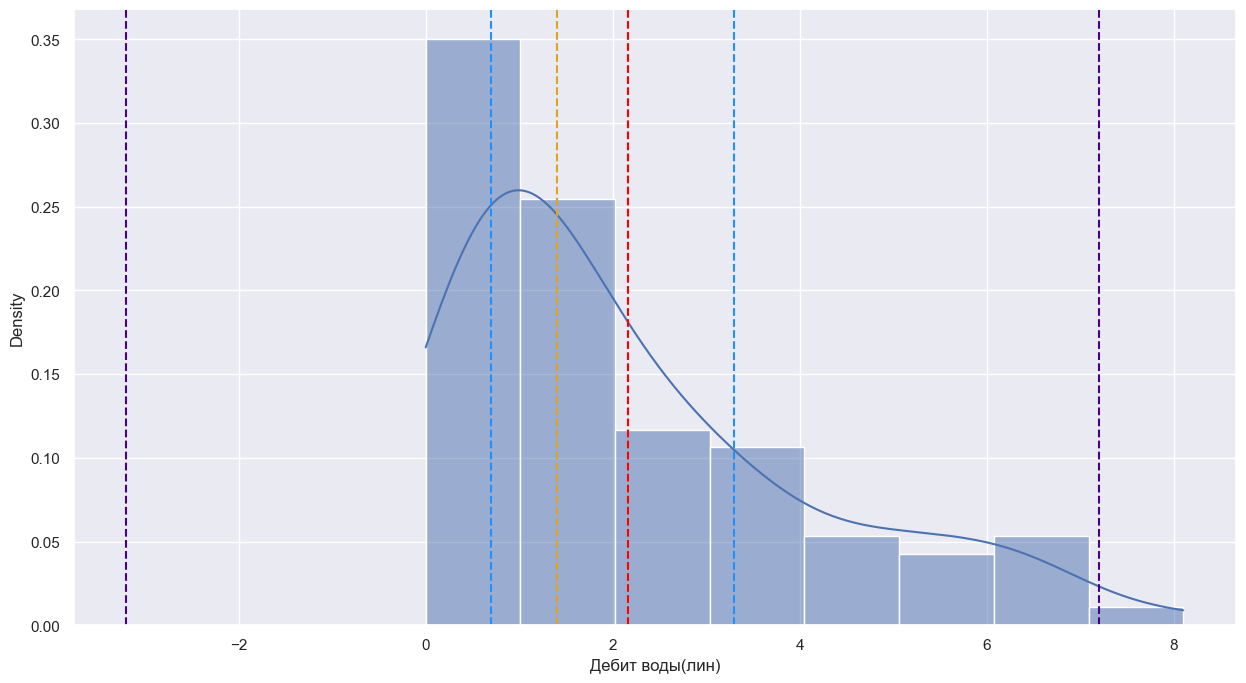

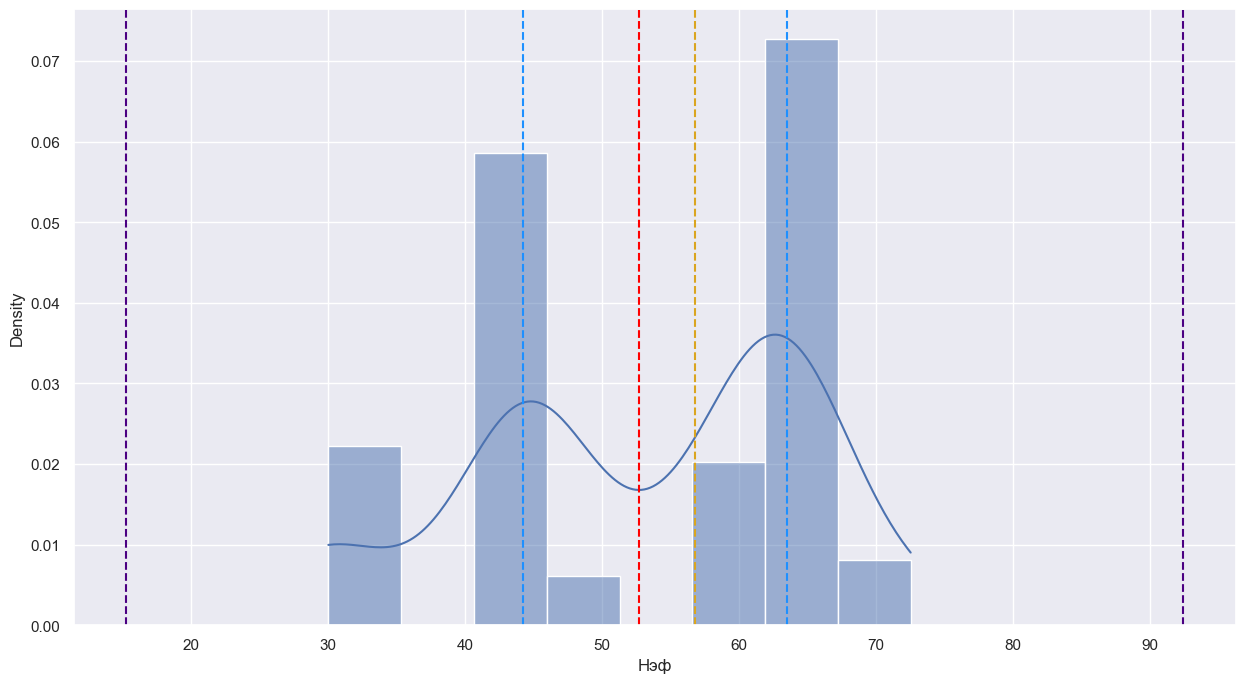

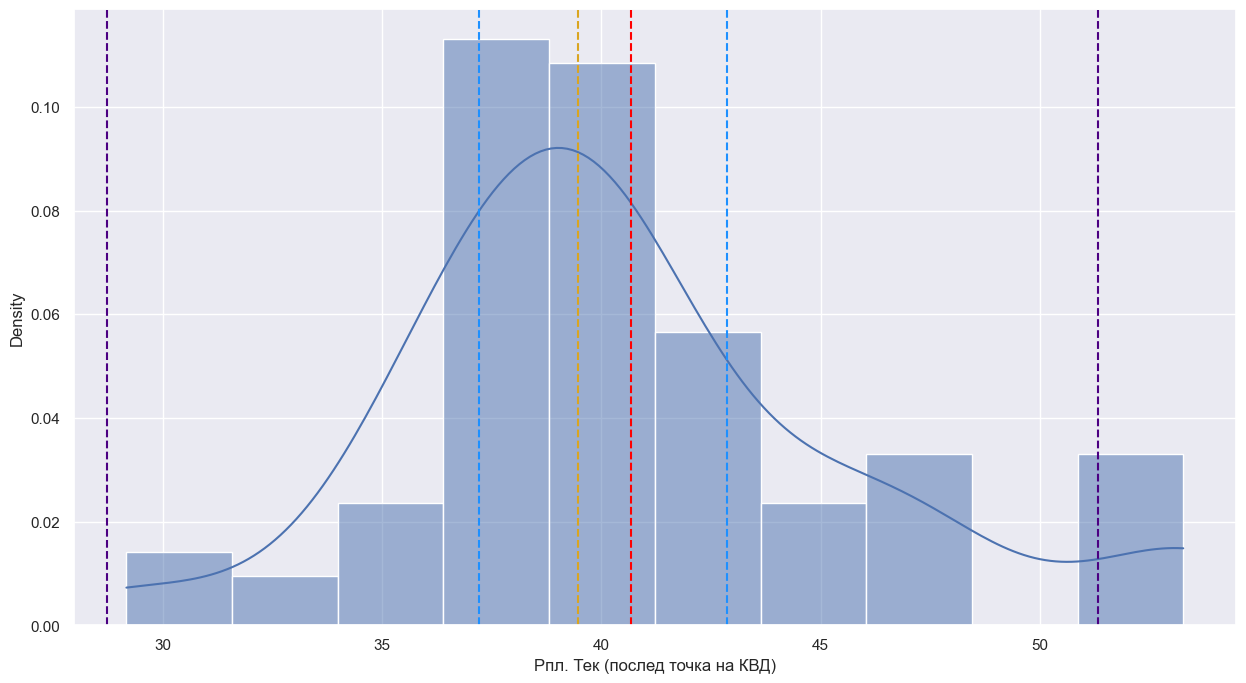

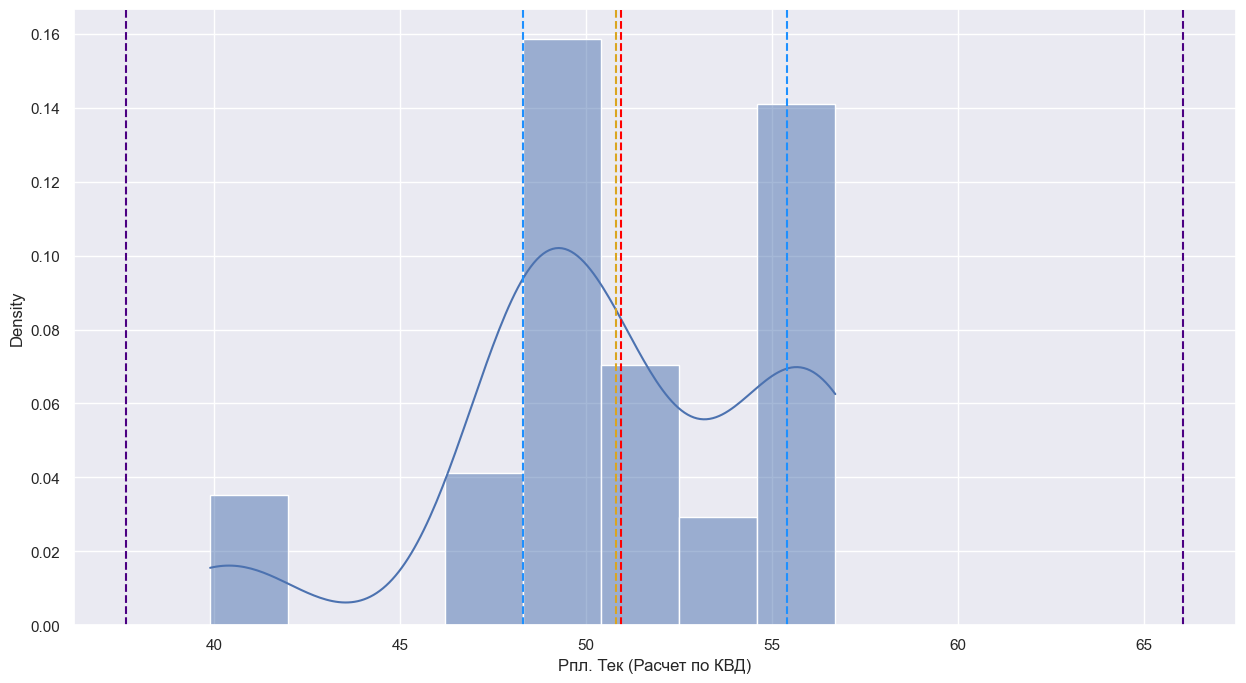

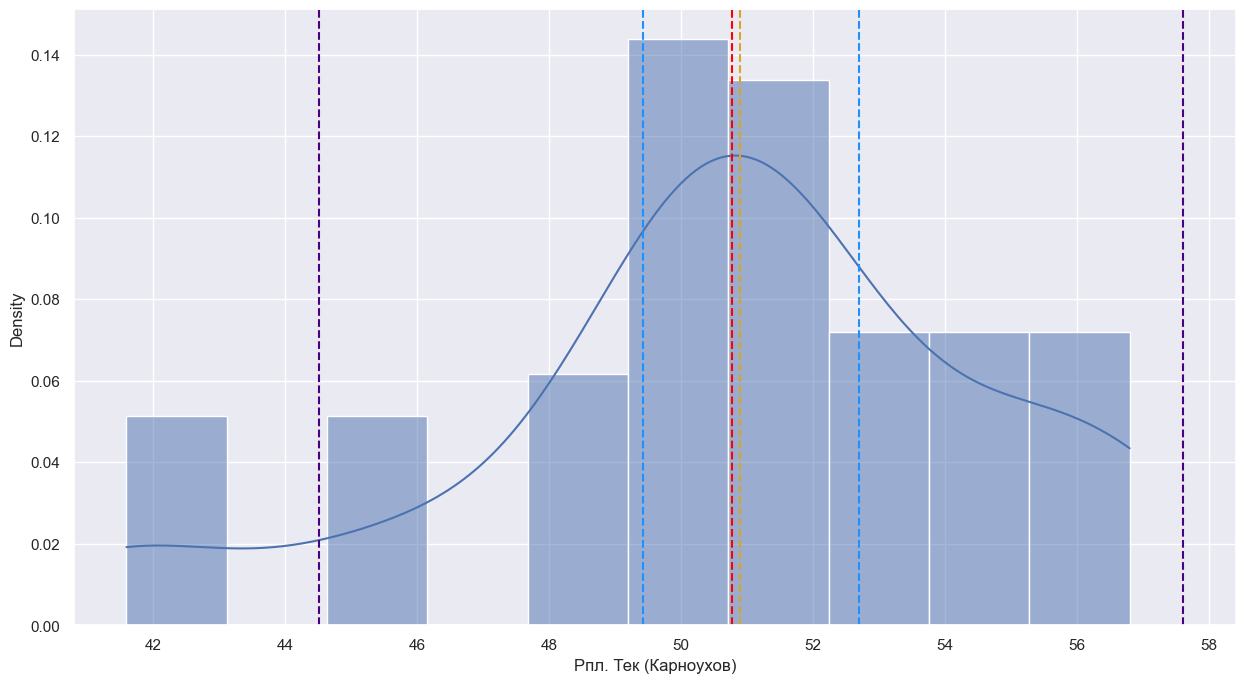

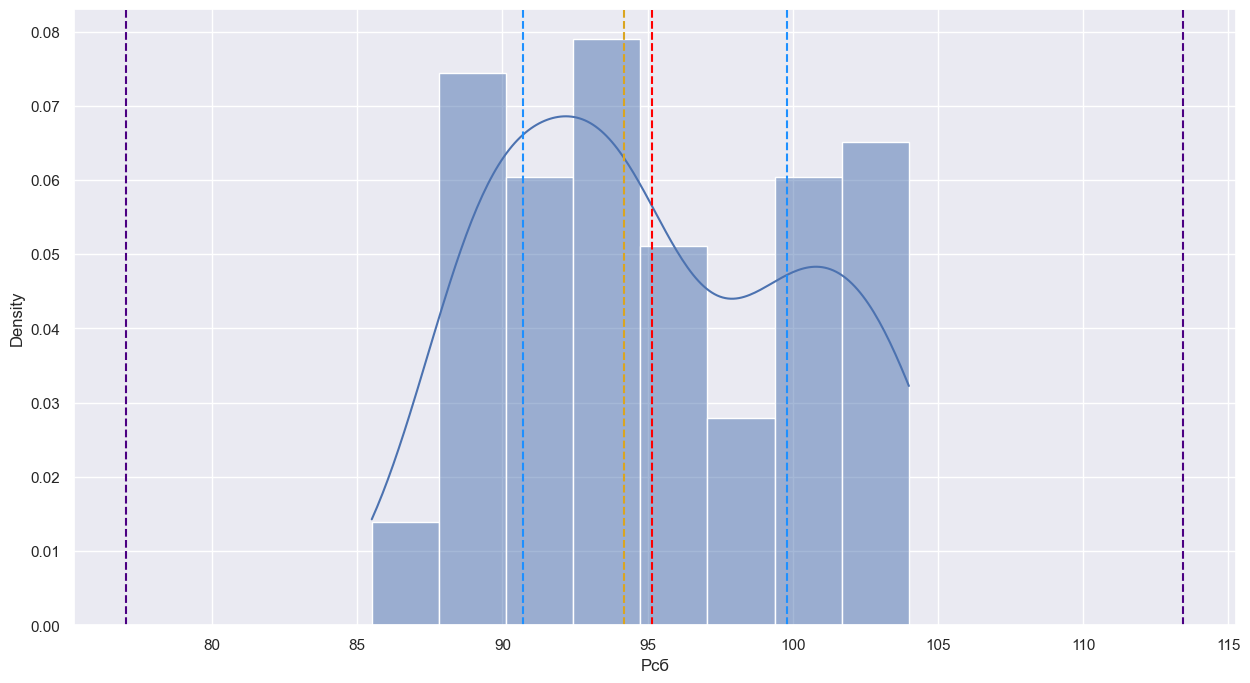

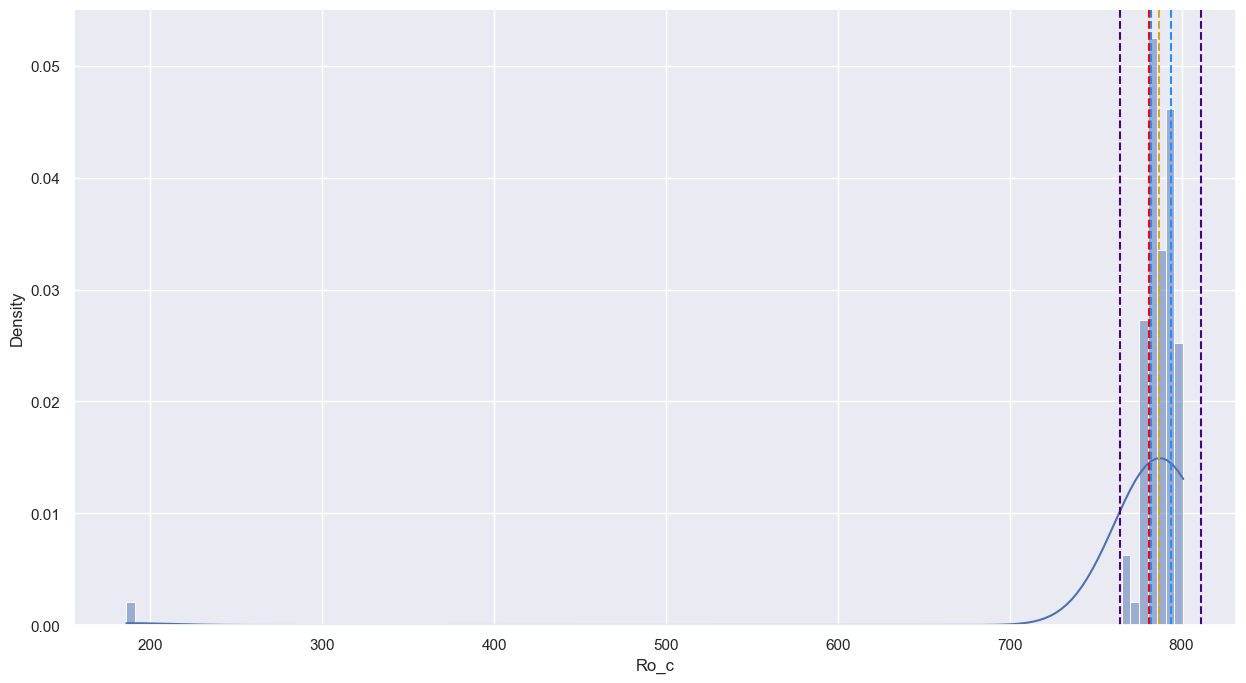

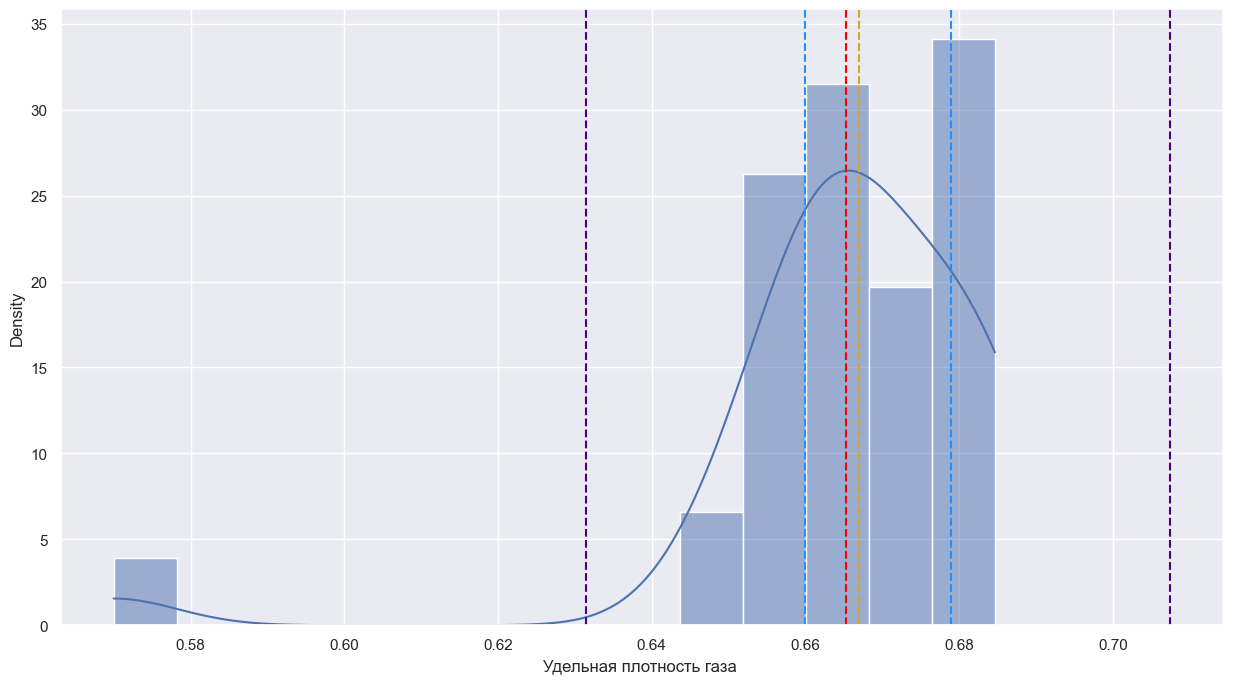

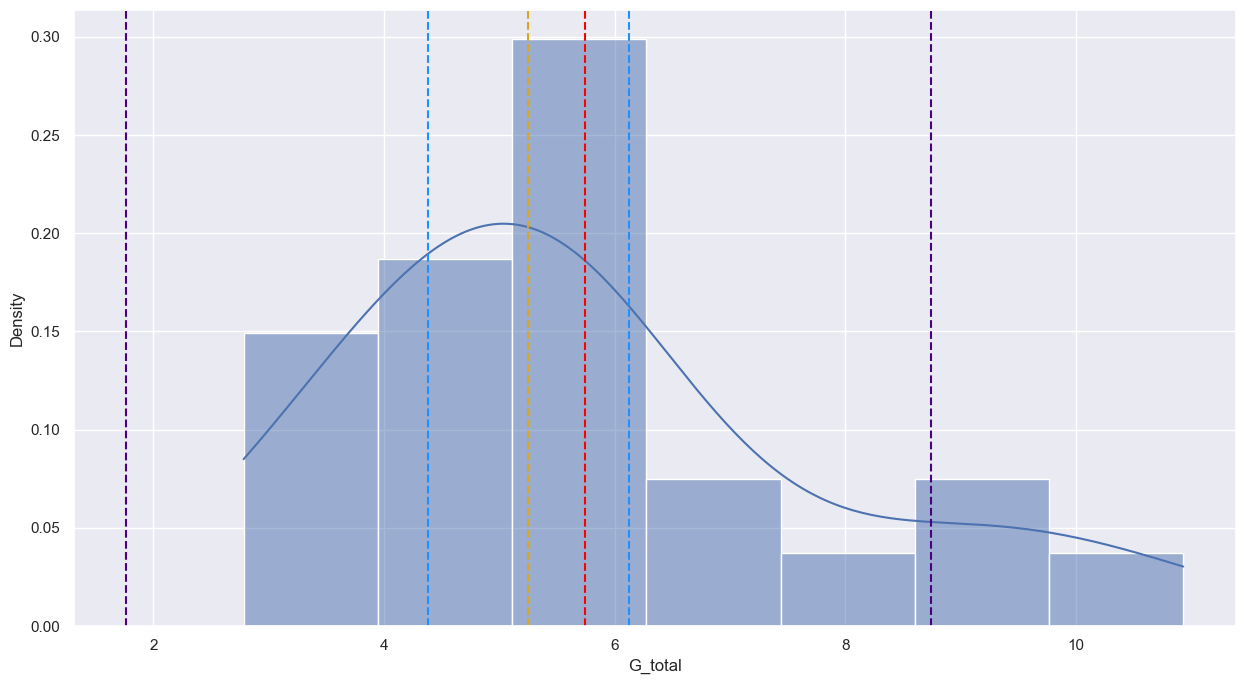

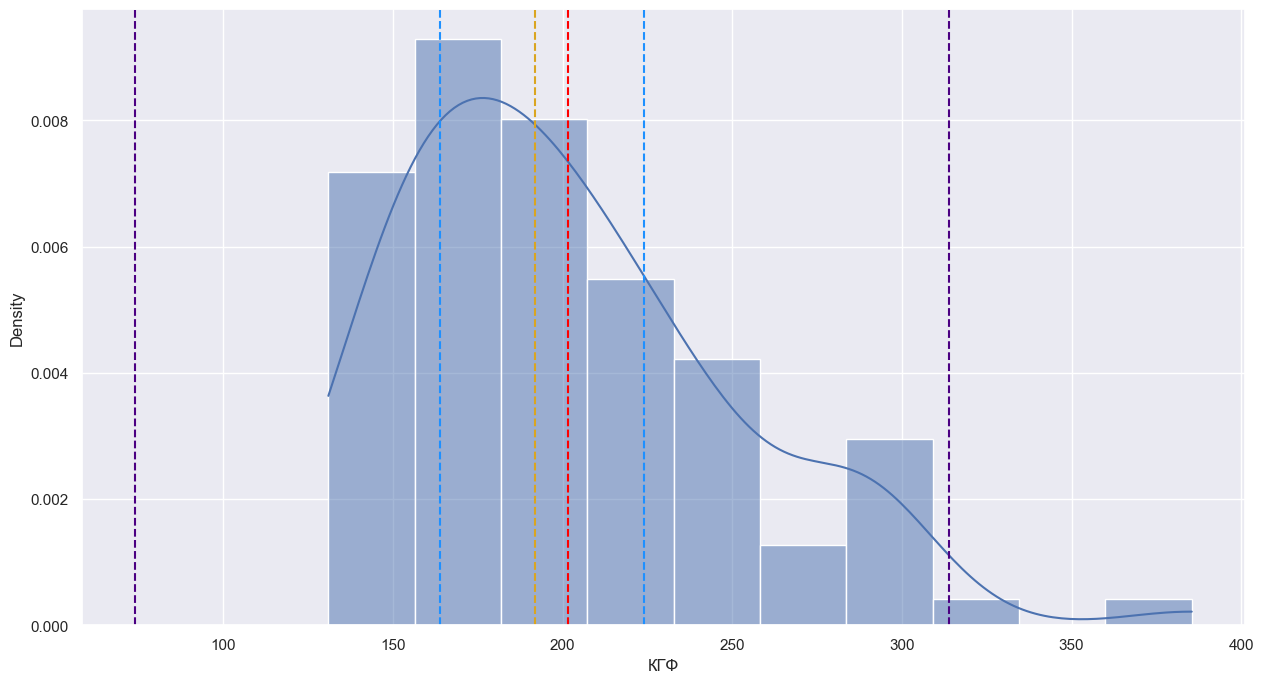

In [150]:
#creating histograms for each feature 
for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10][i], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #first quarile
    plt.axvline(f.iloc[4][i], color="red", ls='--') #mean
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #meadian
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #third quatile
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

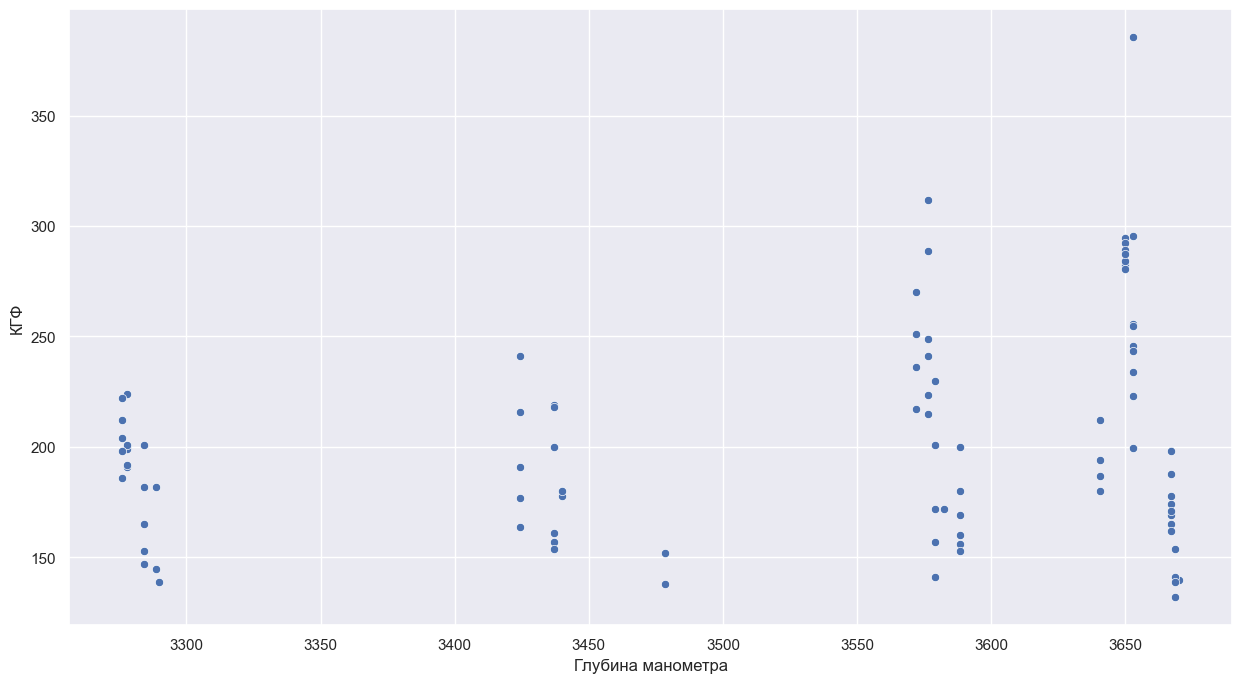

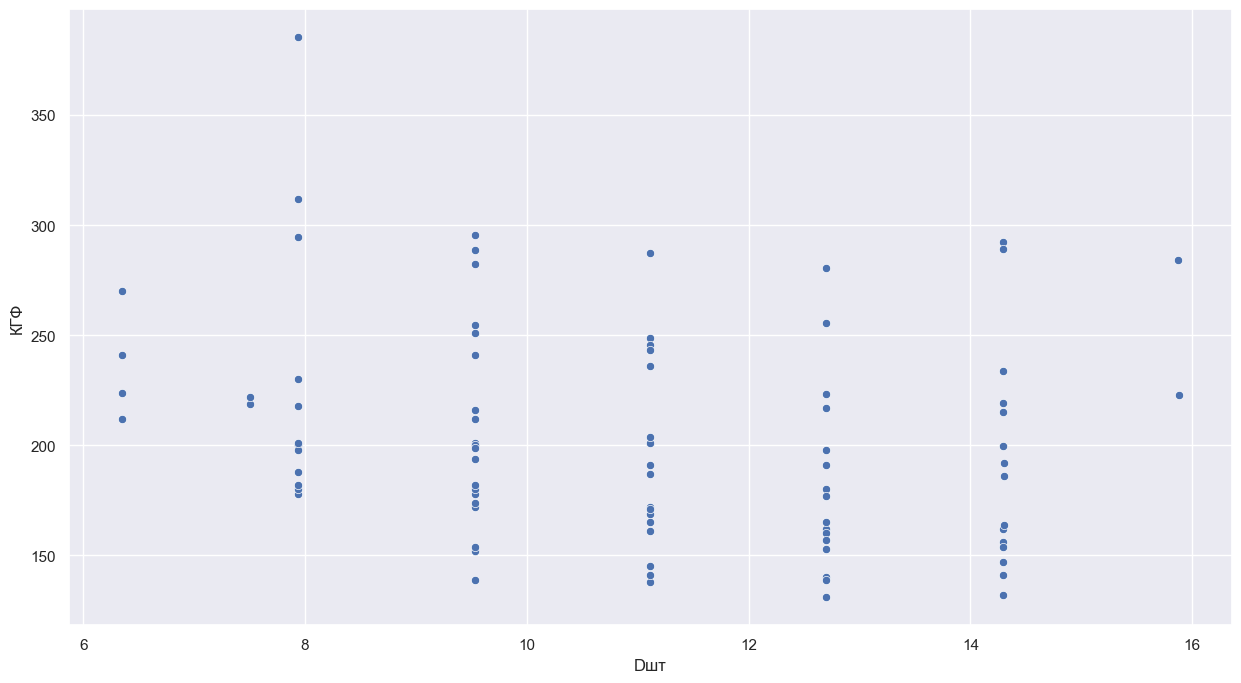

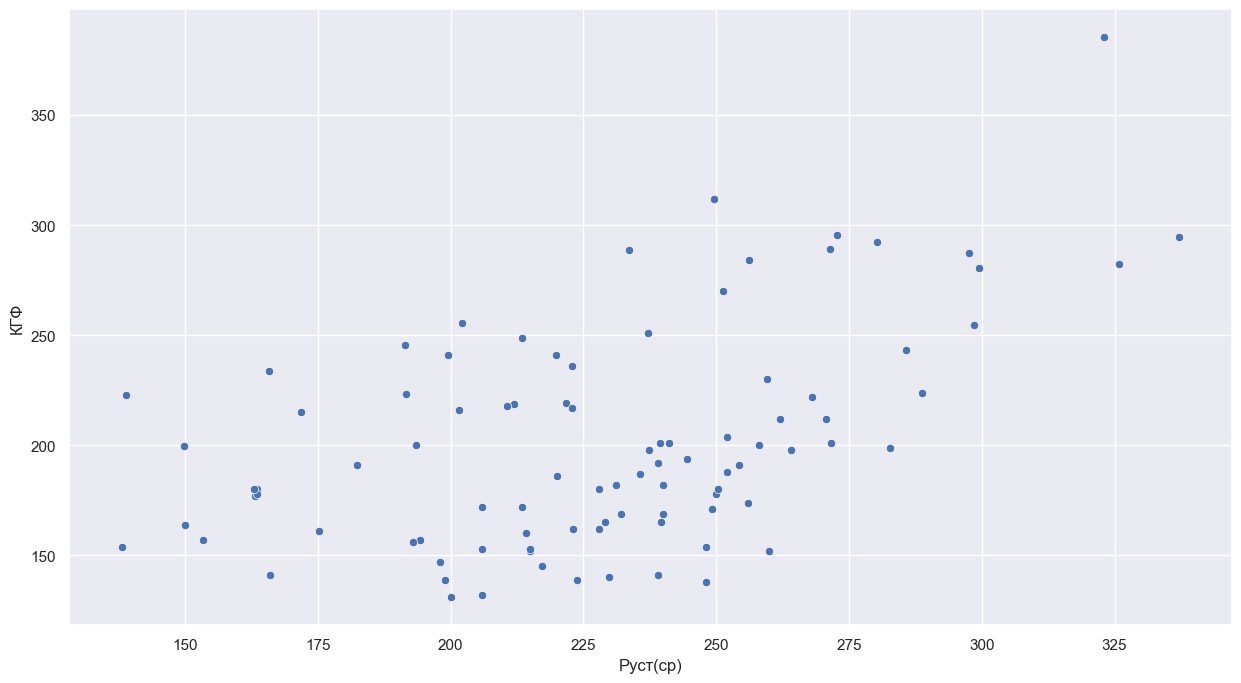

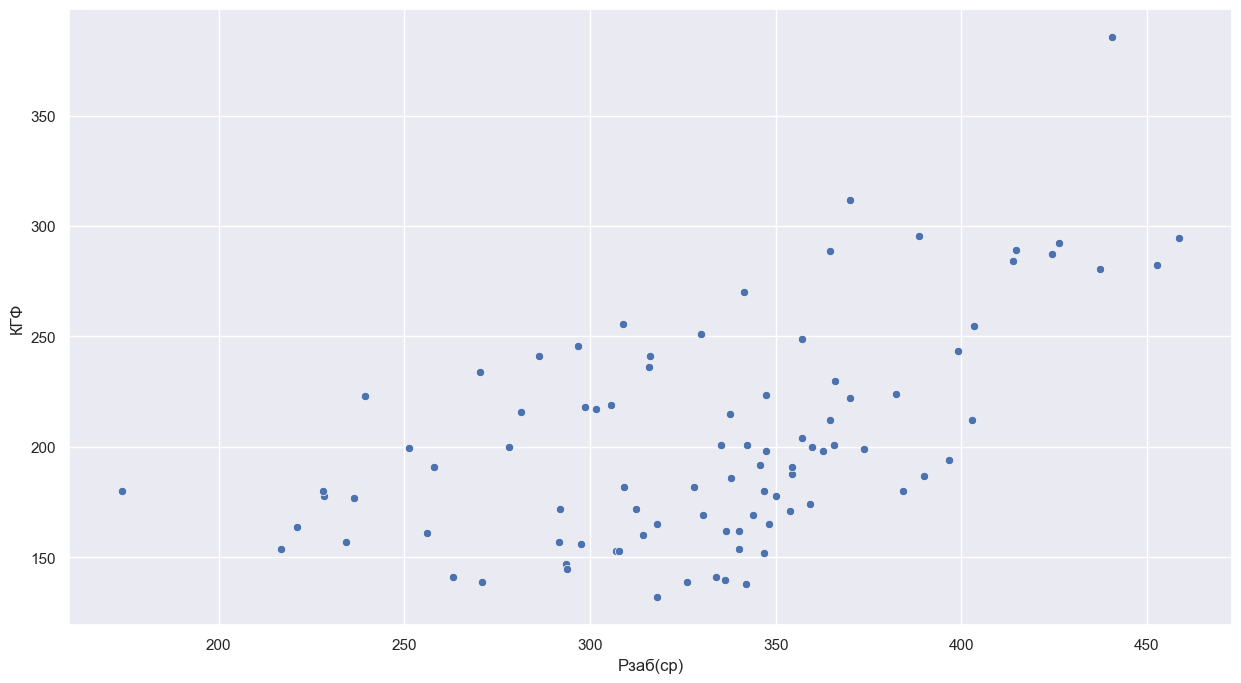

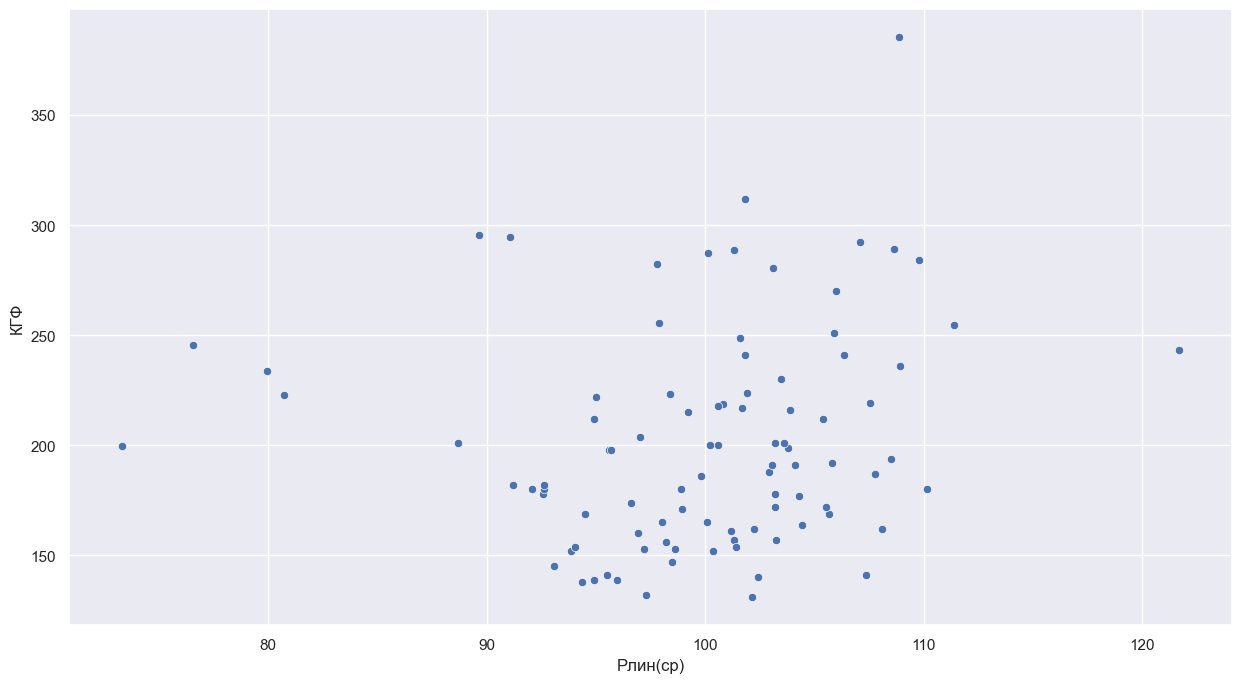

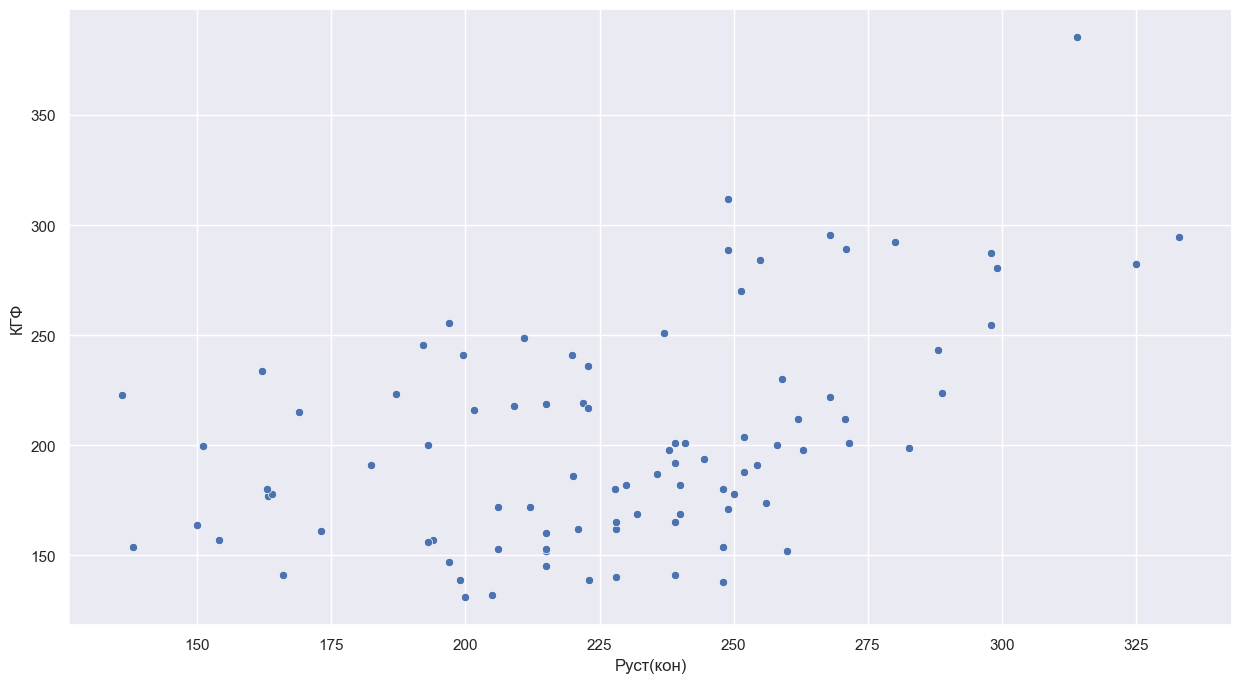

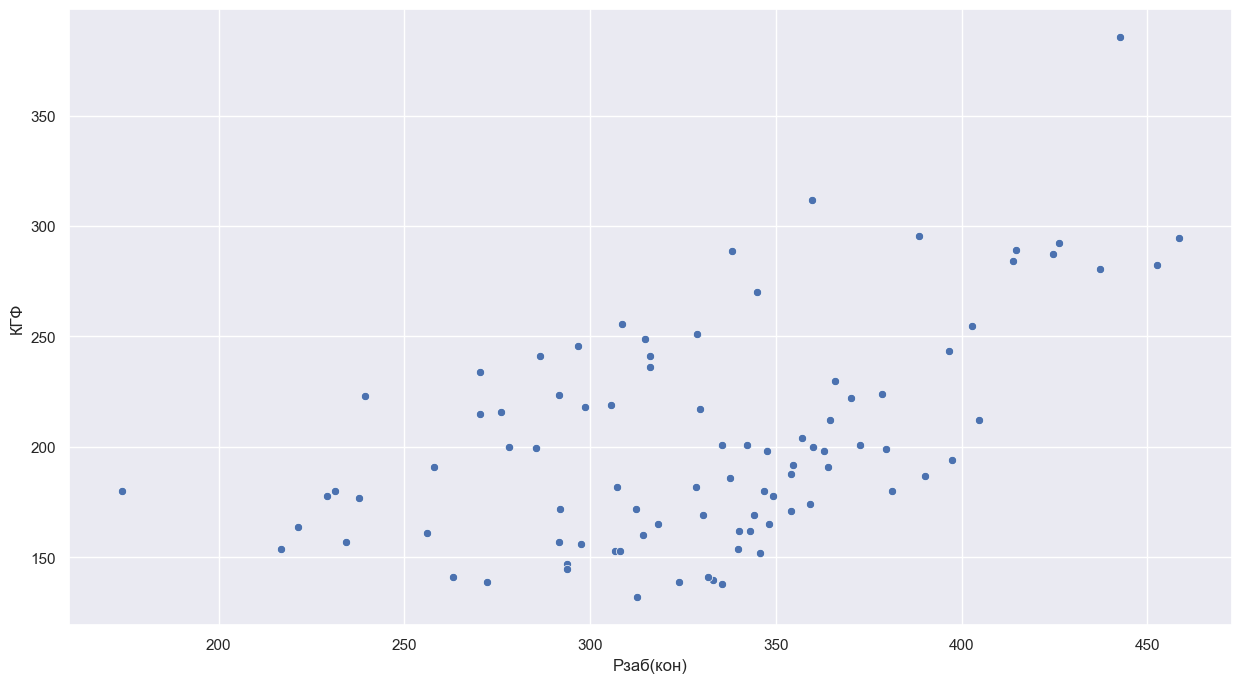

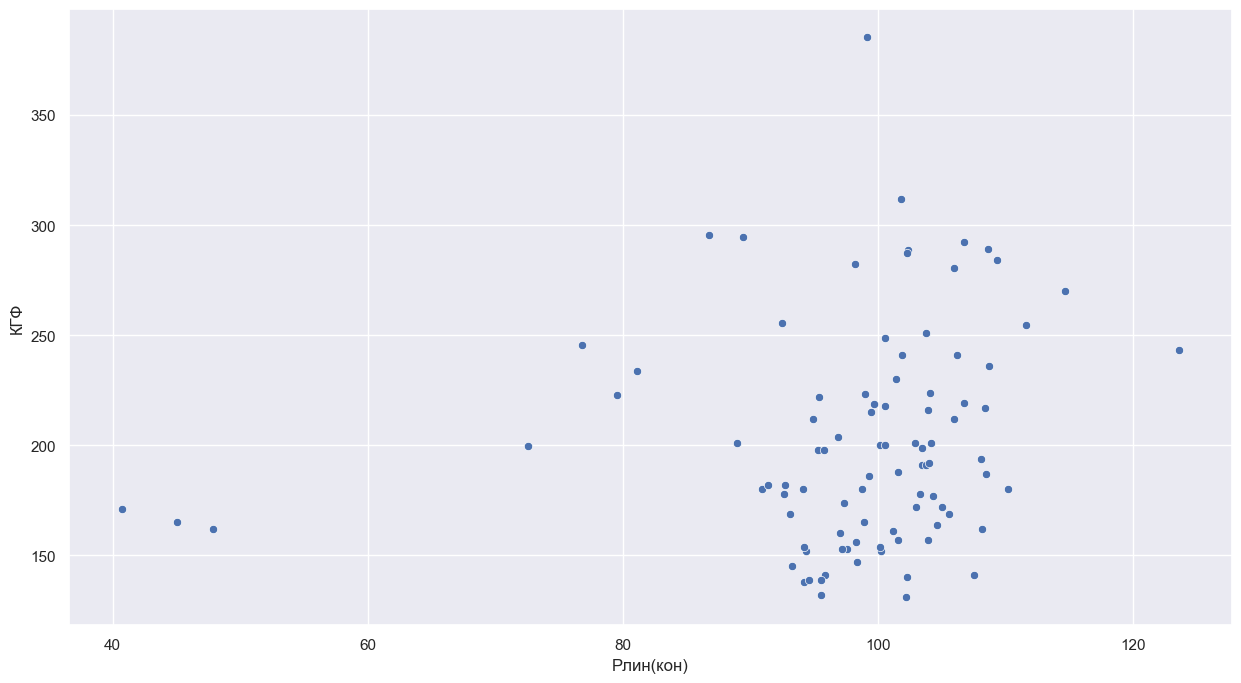

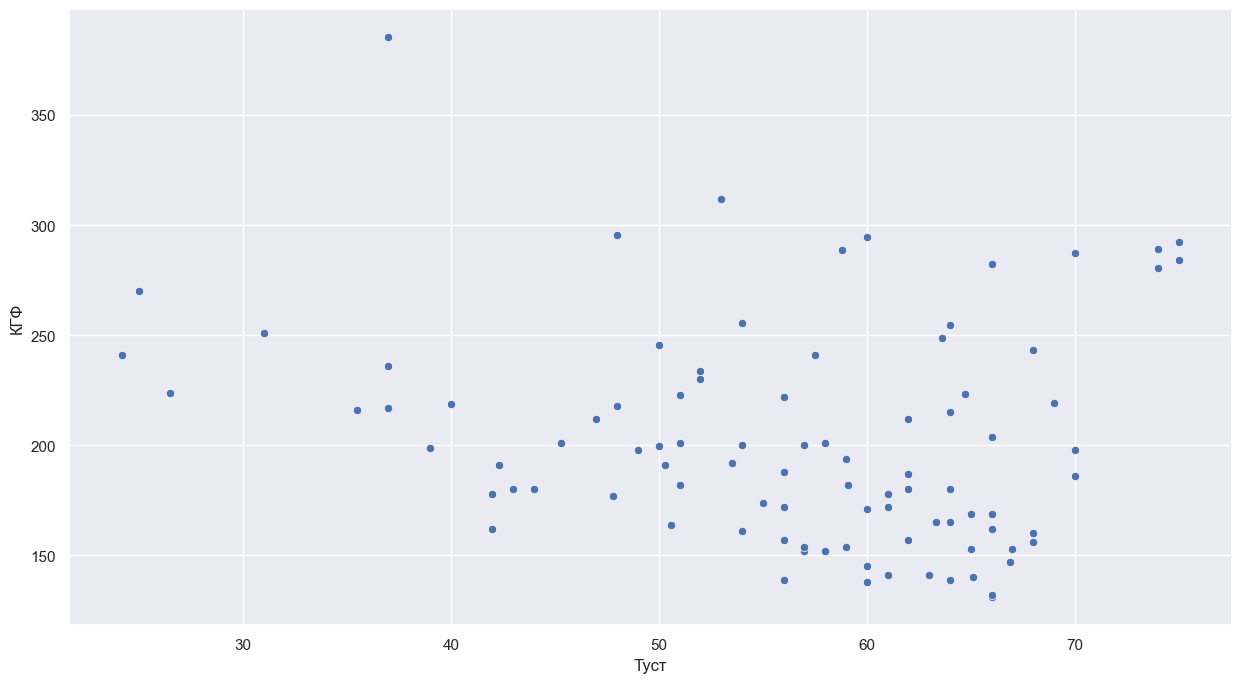

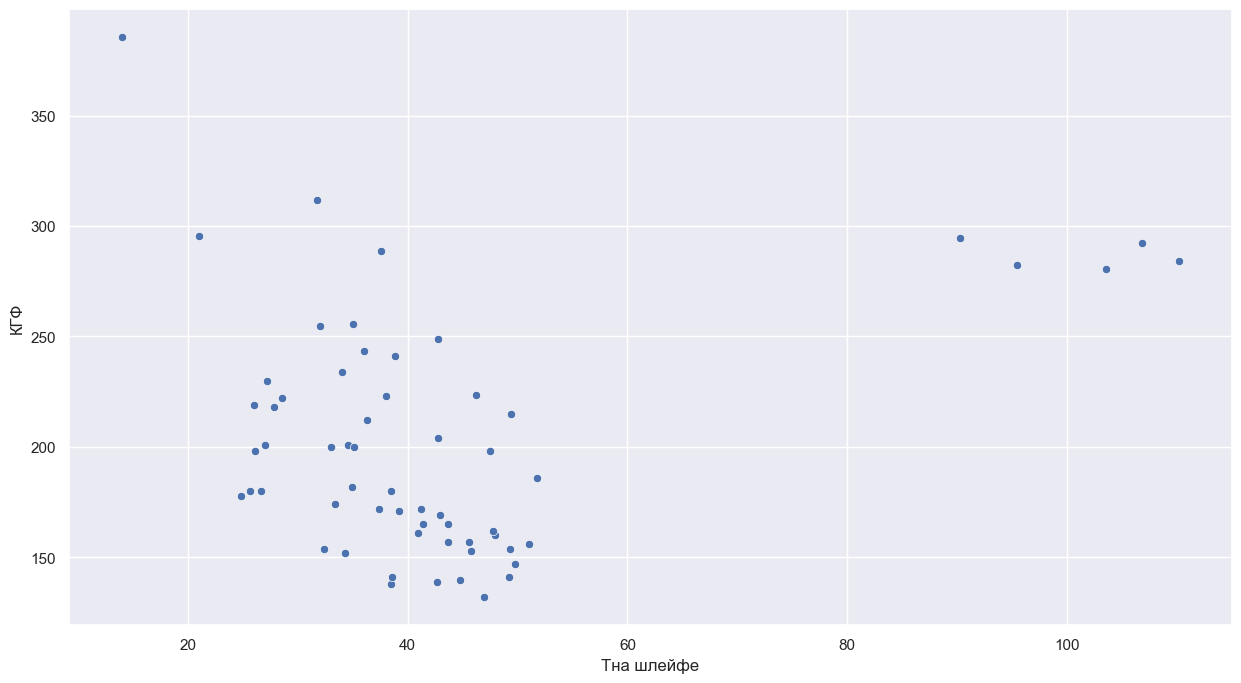

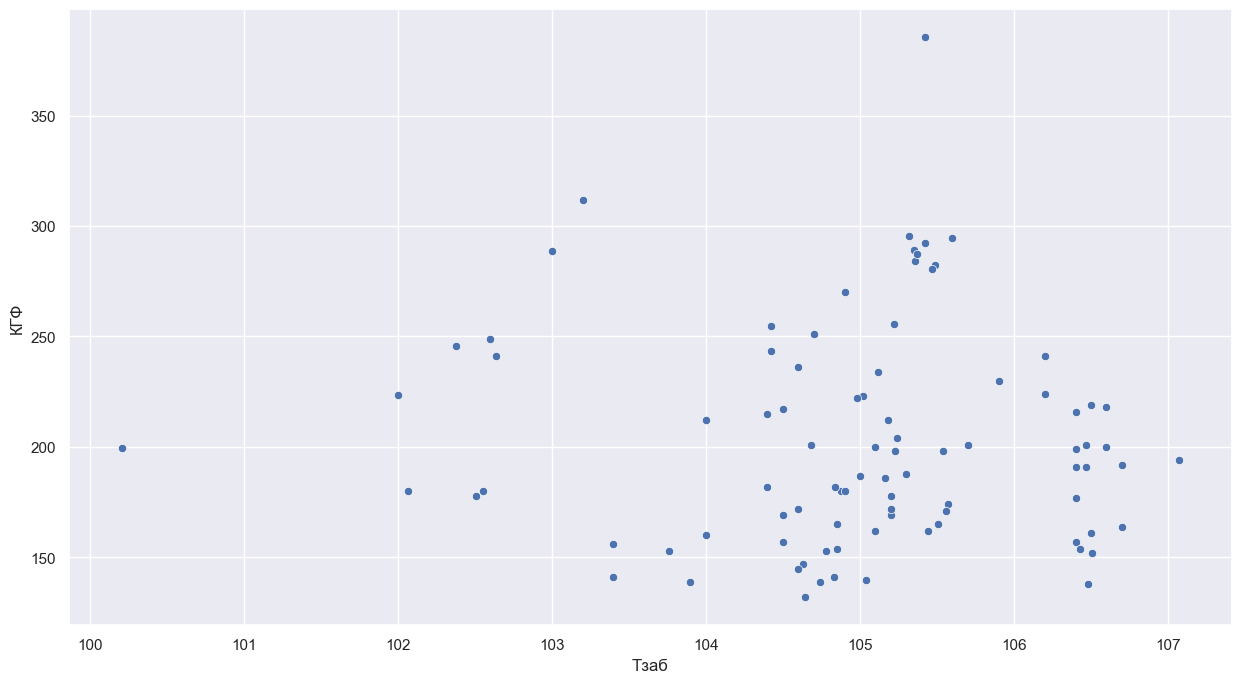

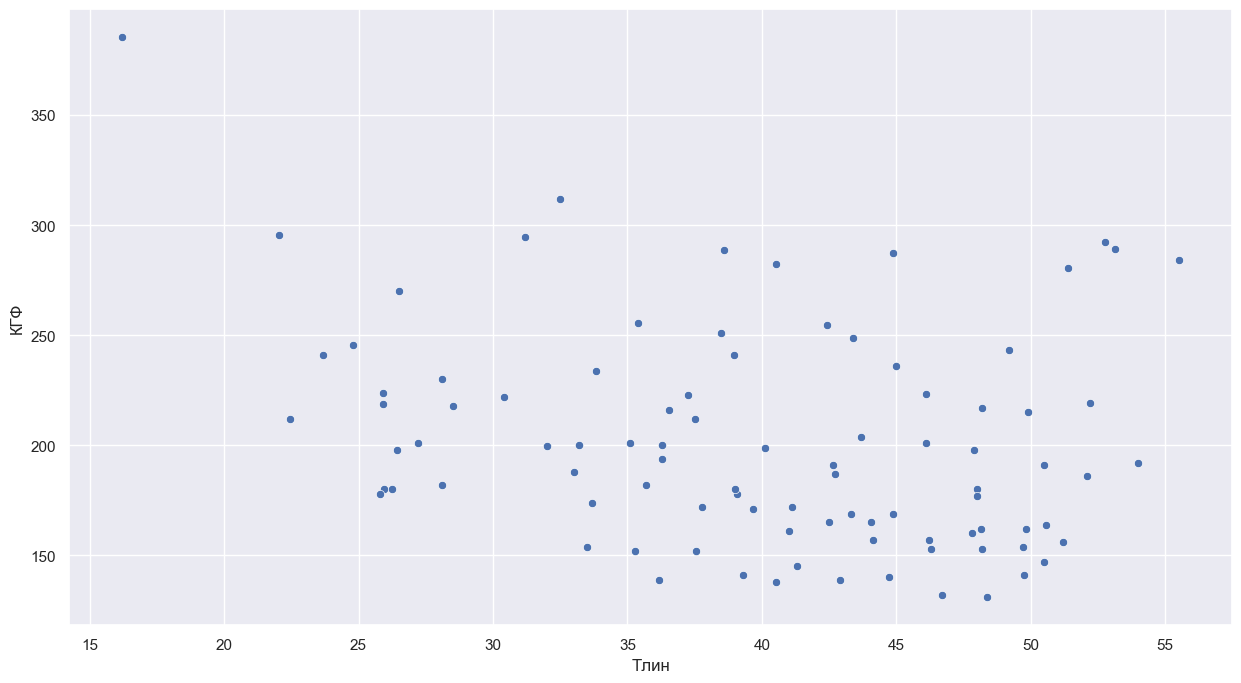

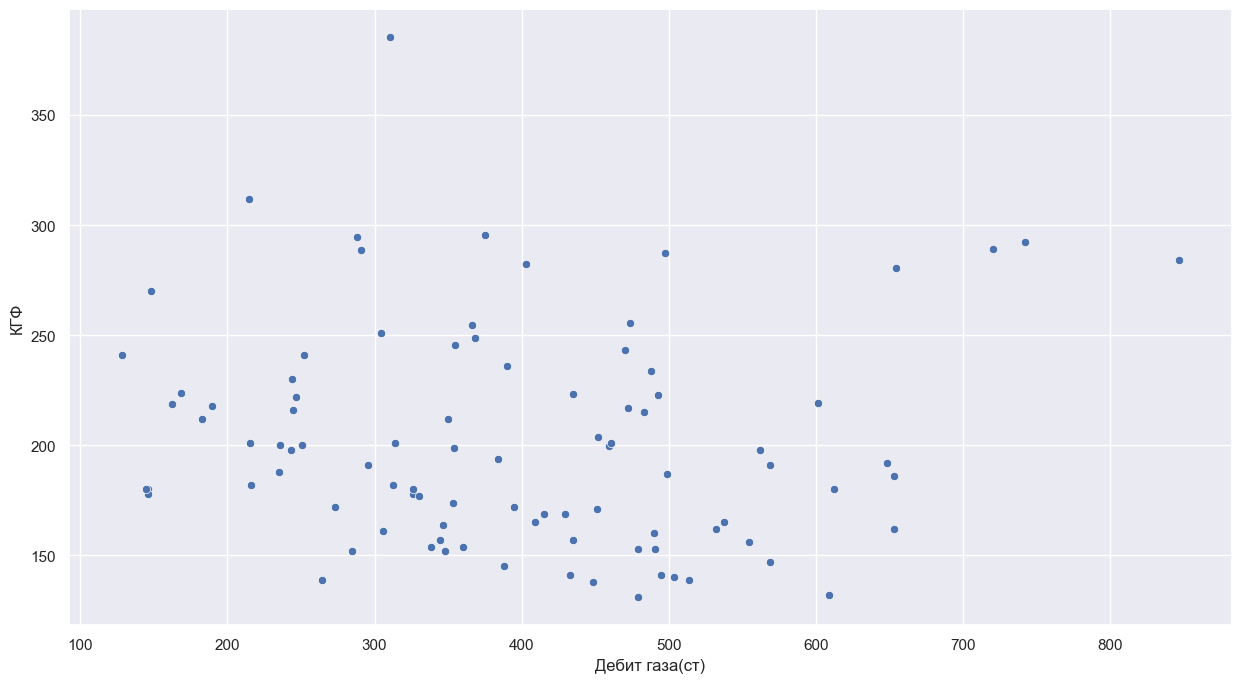

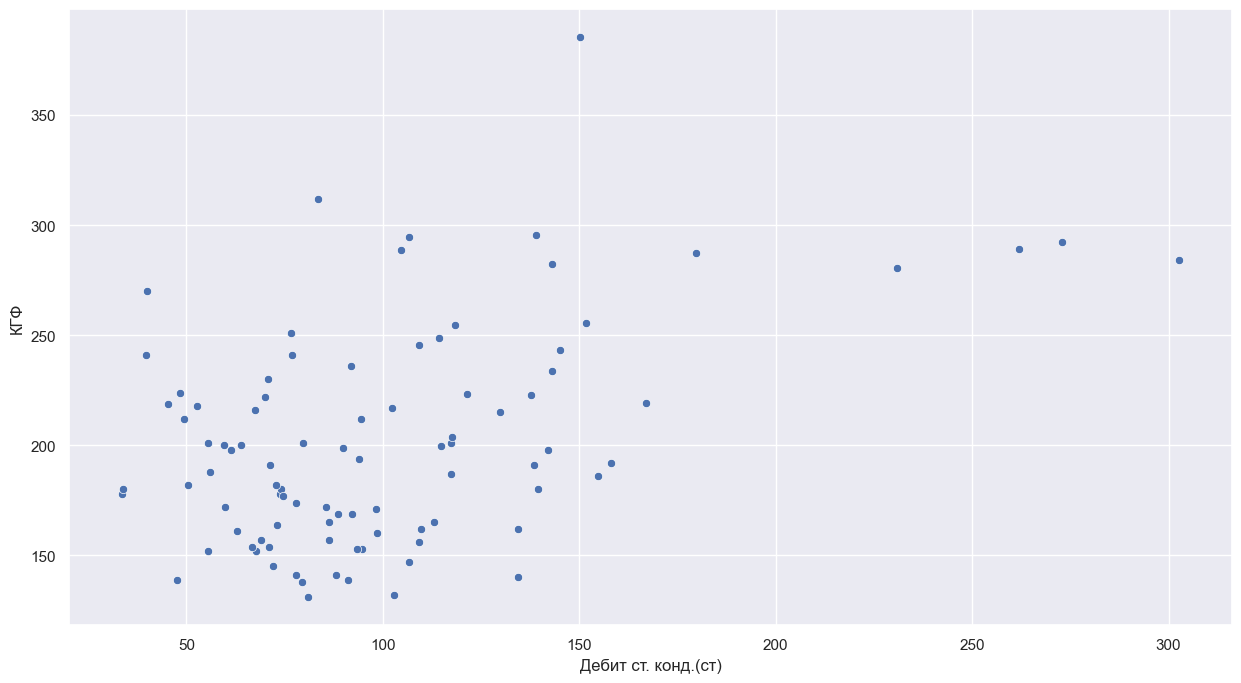

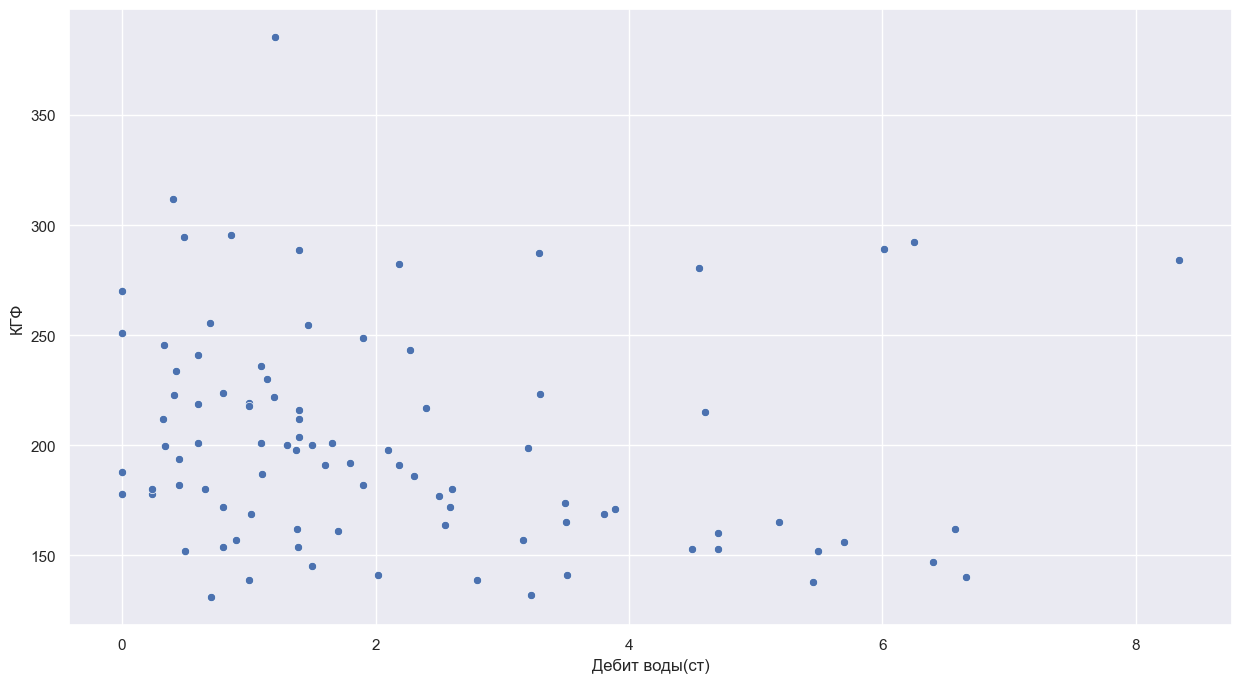

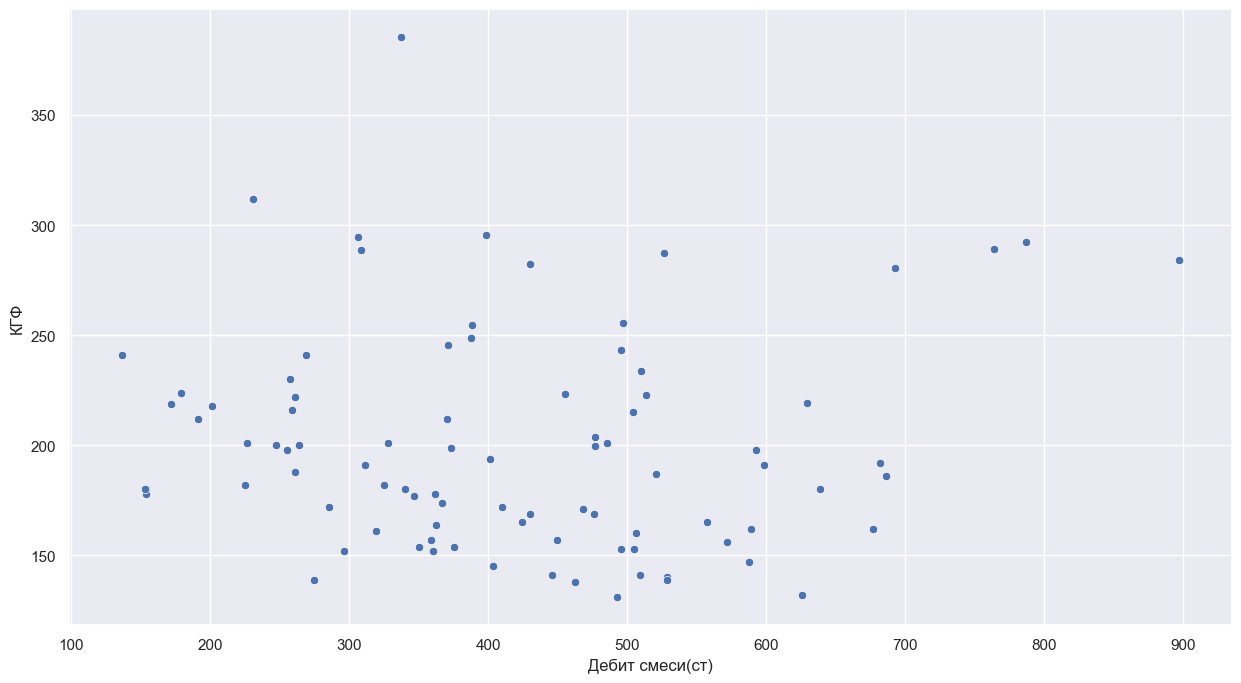

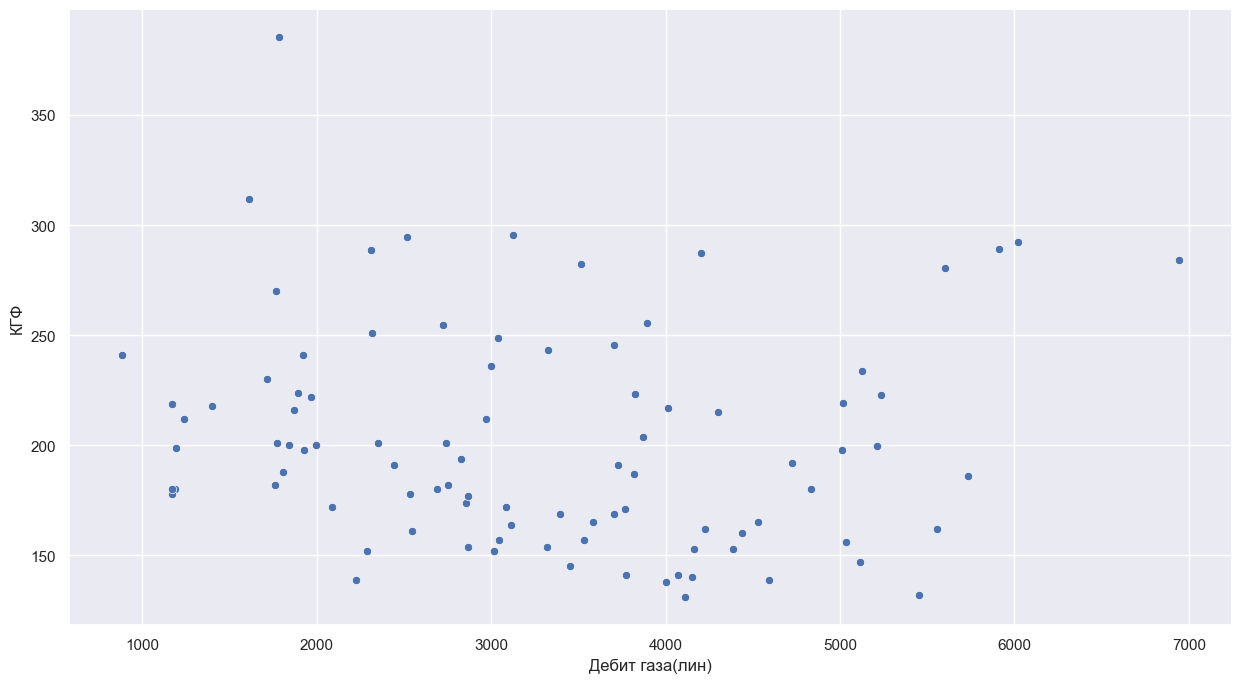

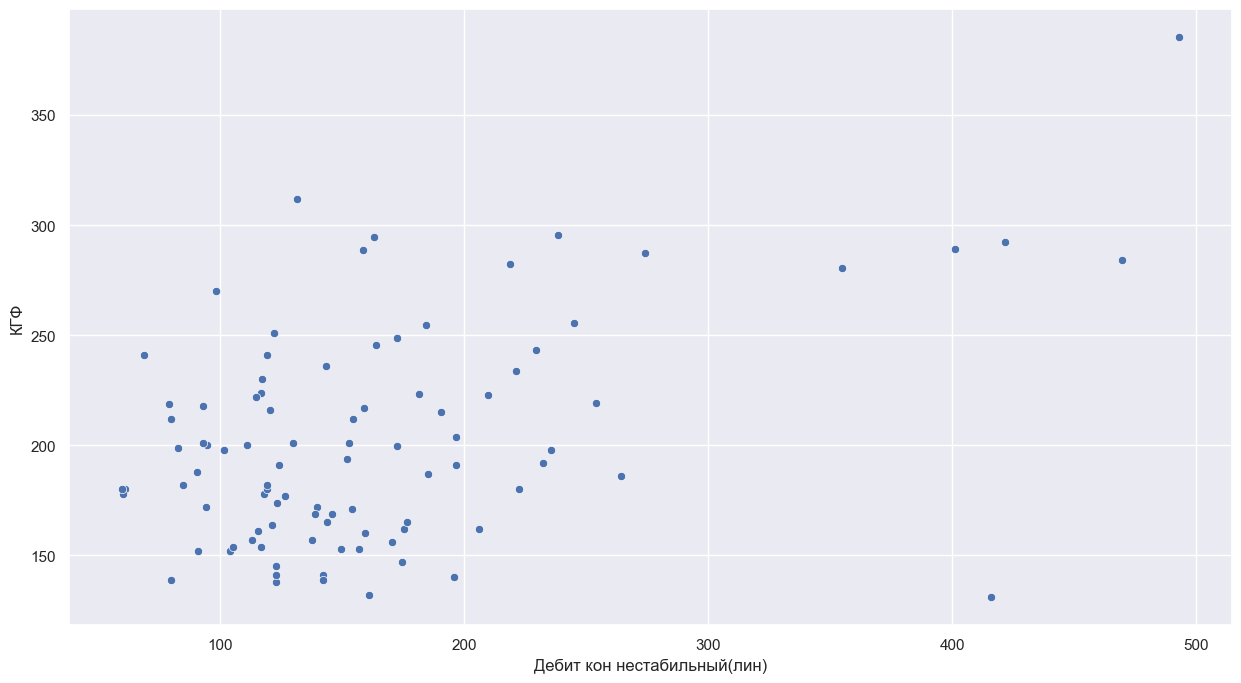

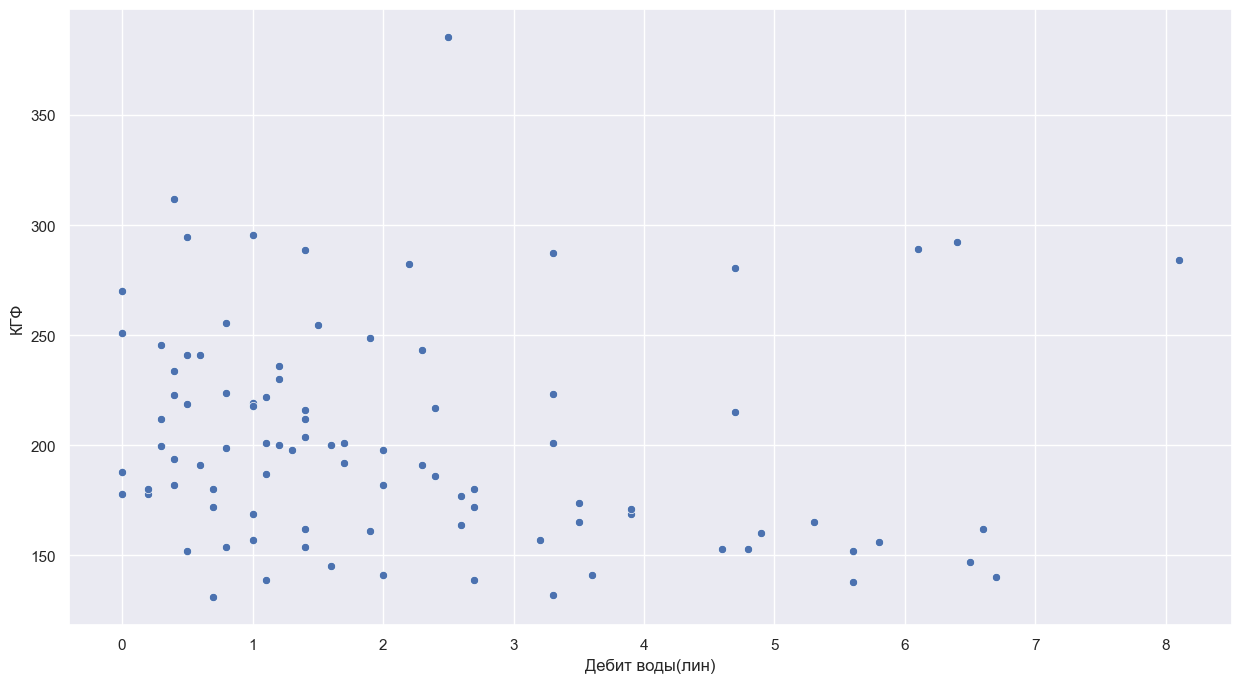

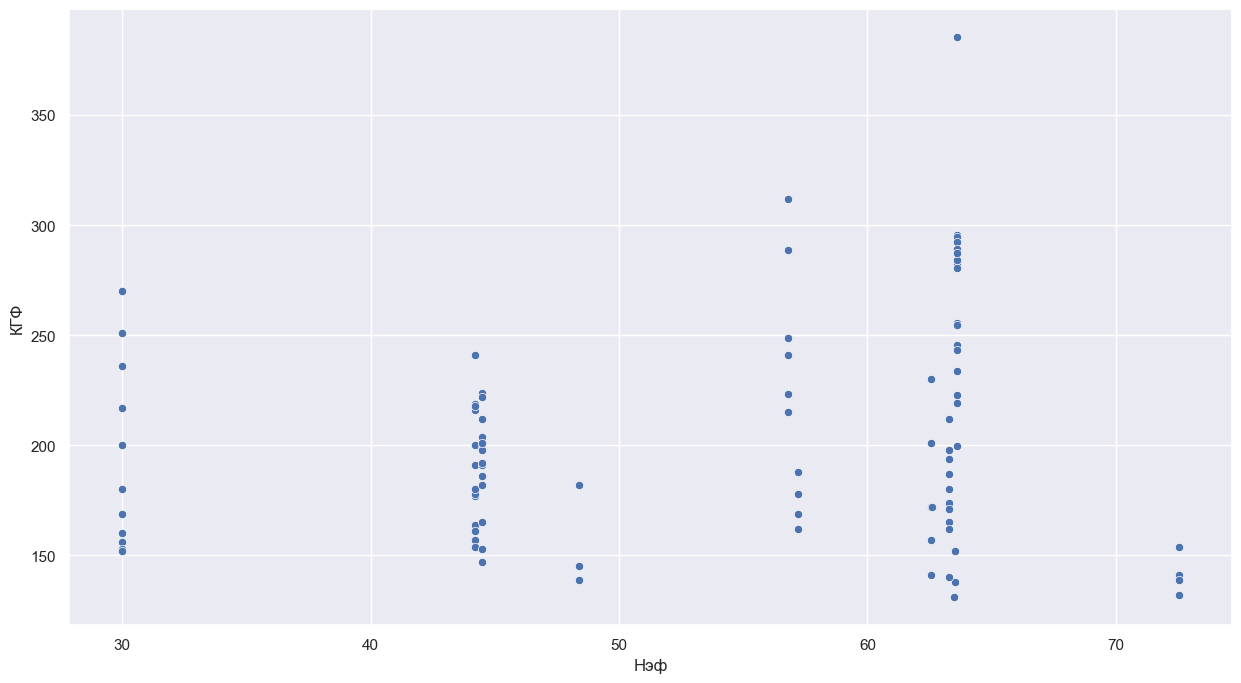

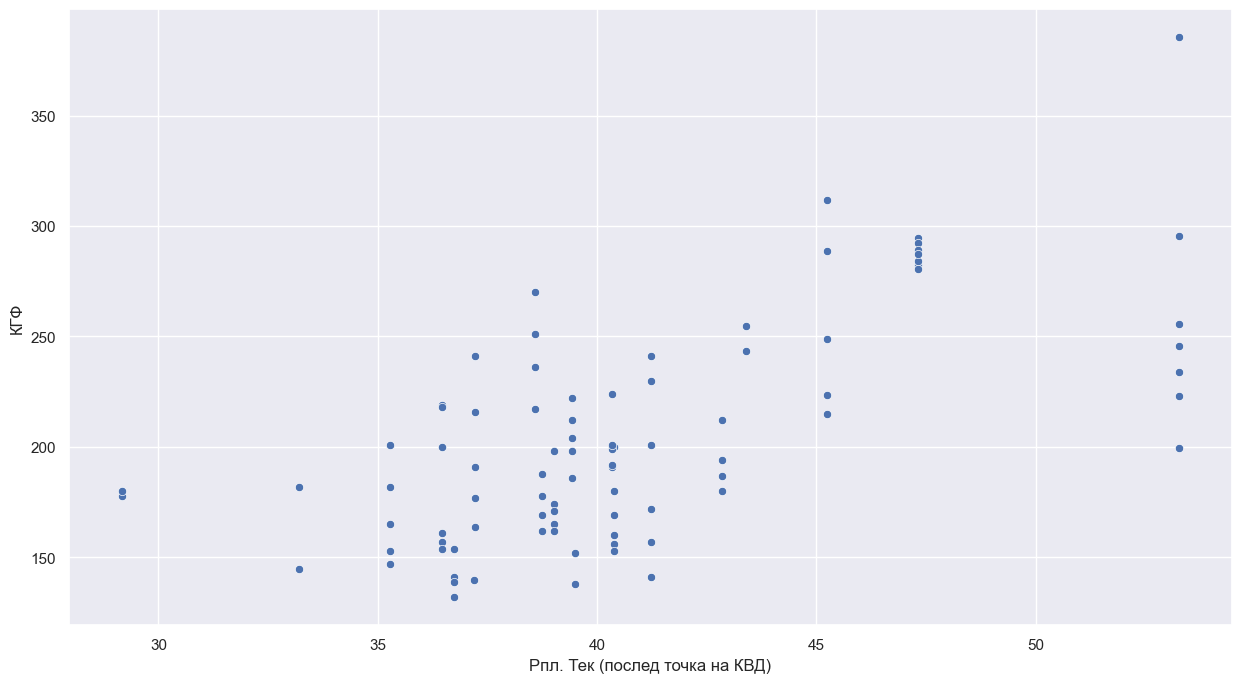

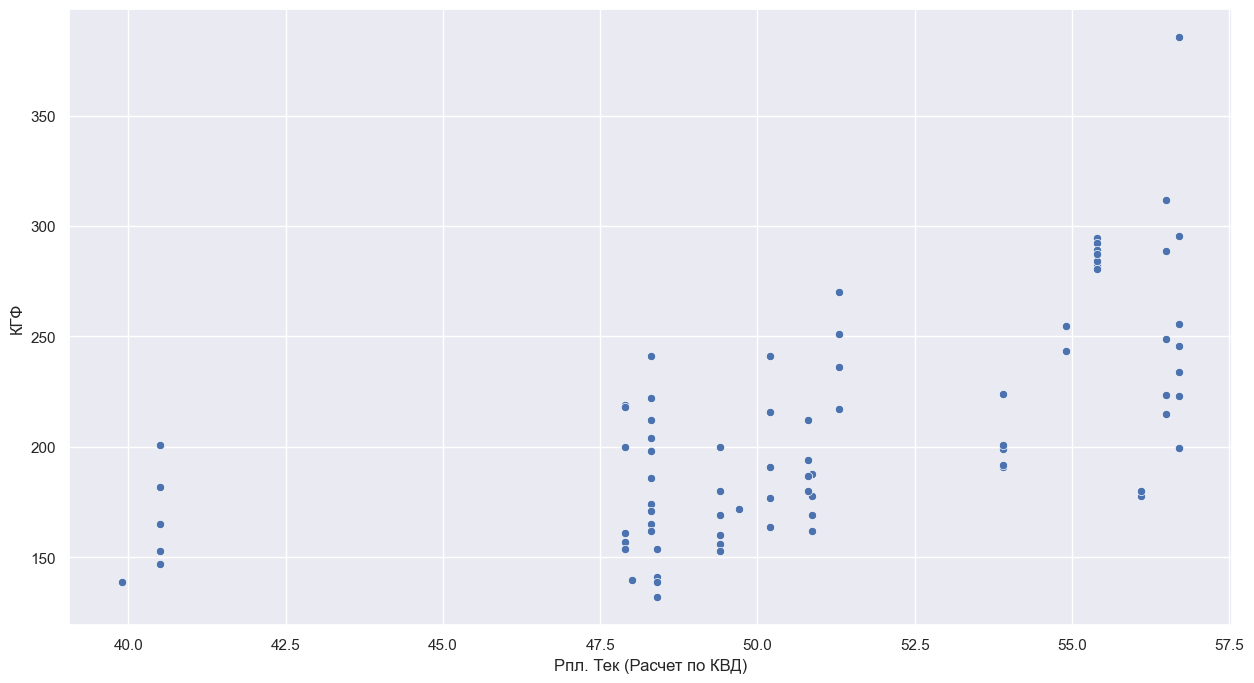

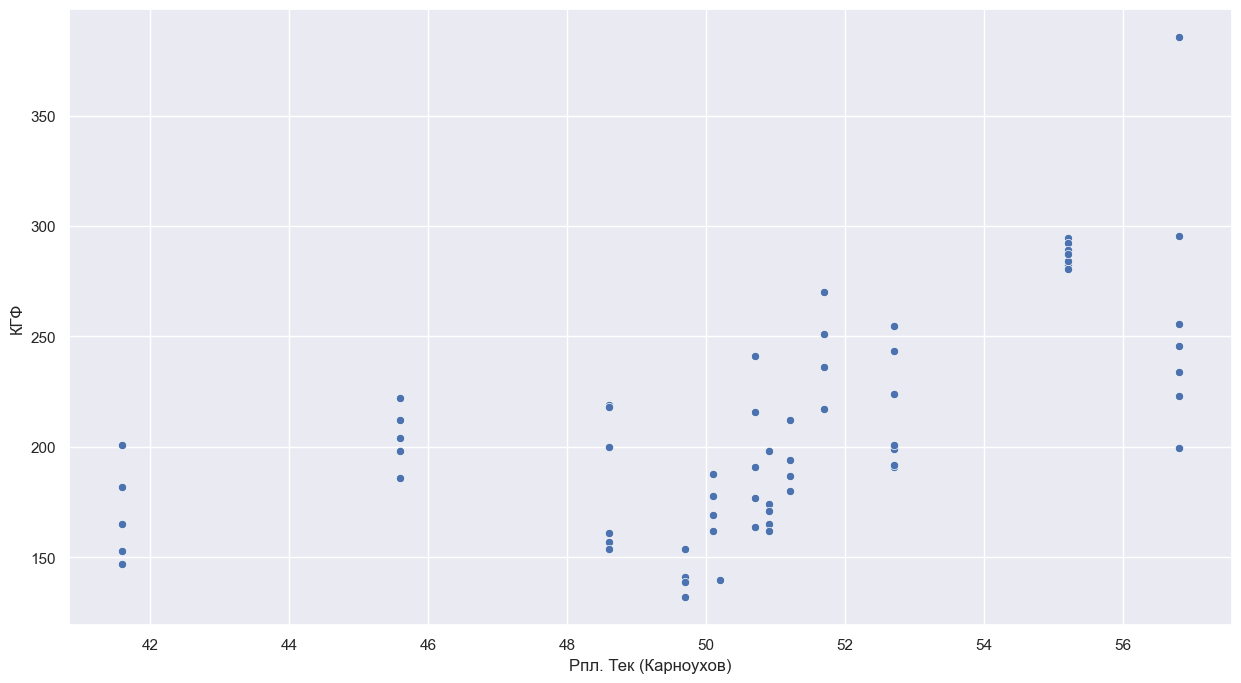

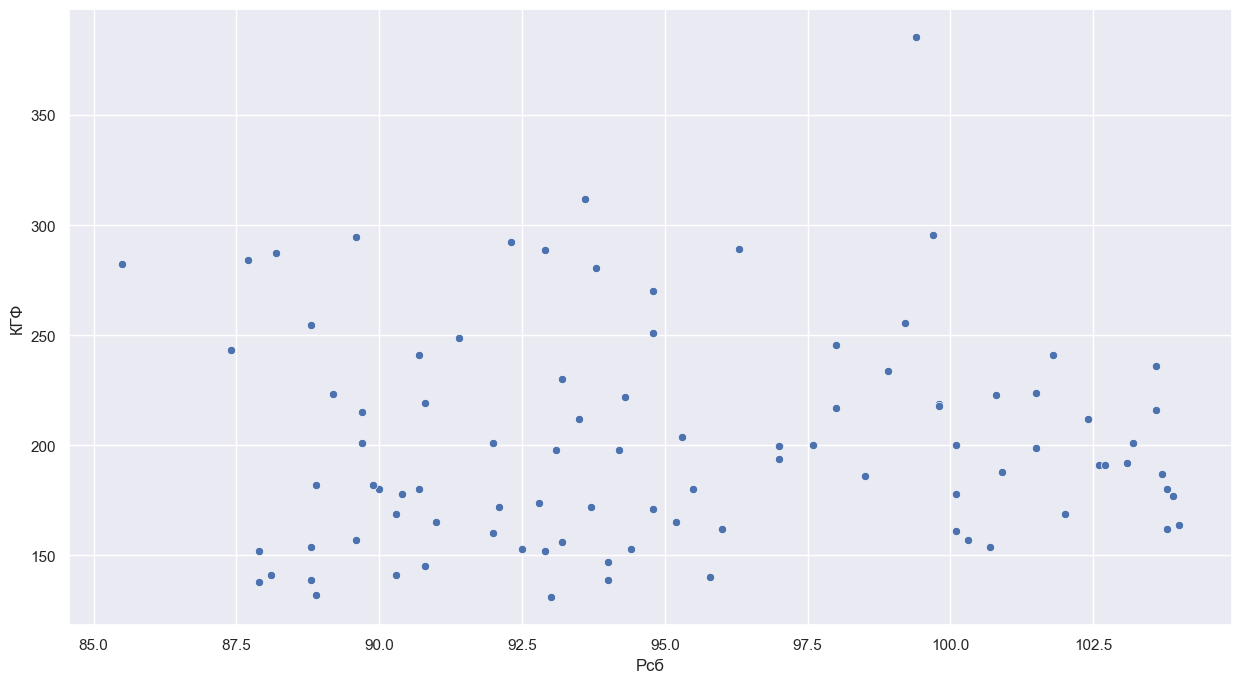

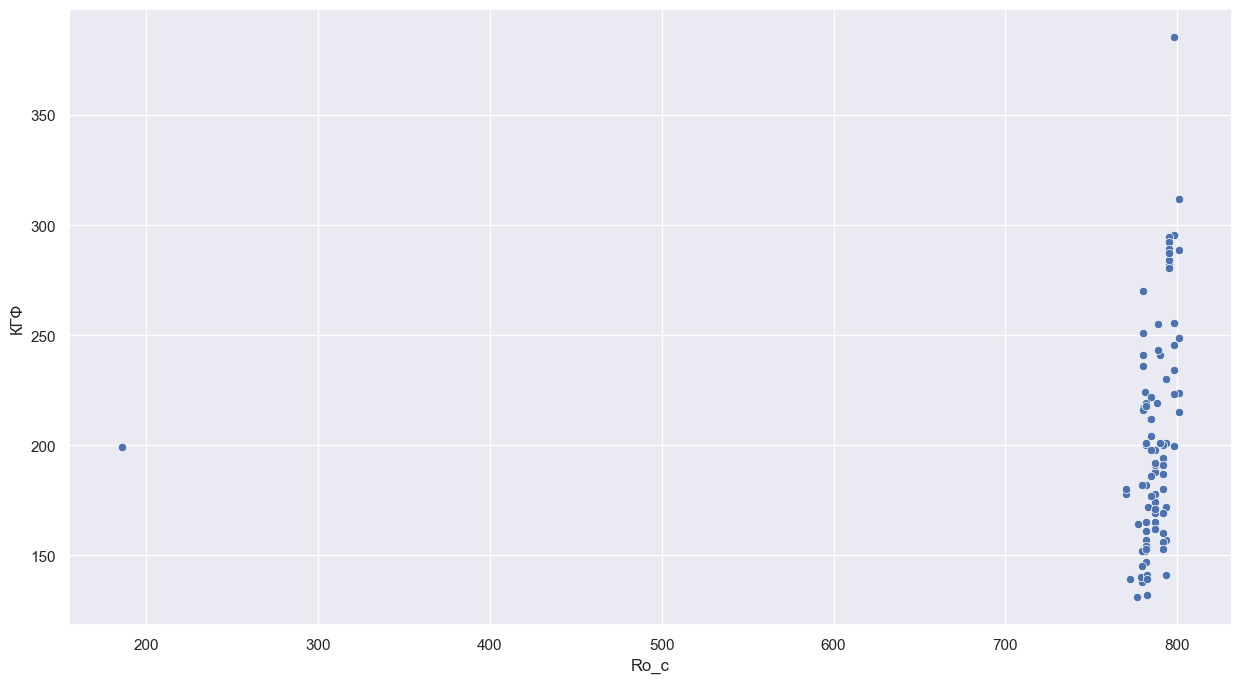

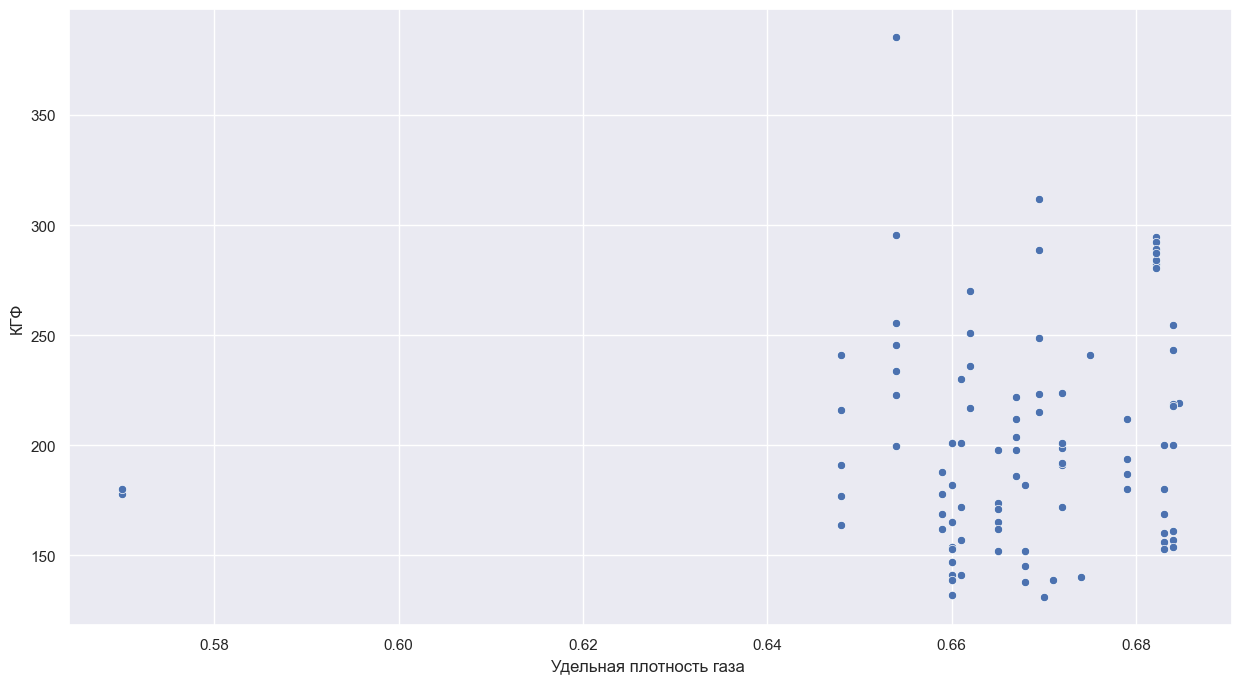

In [151]:
#scatter plot of the features compared to targets
X1=df.iloc[:, 0:26]

for i in X1.columns:
    plt.figure(i)
    sns.scatterplot(data=df, y="КГФ", x=i)
    plt.show()

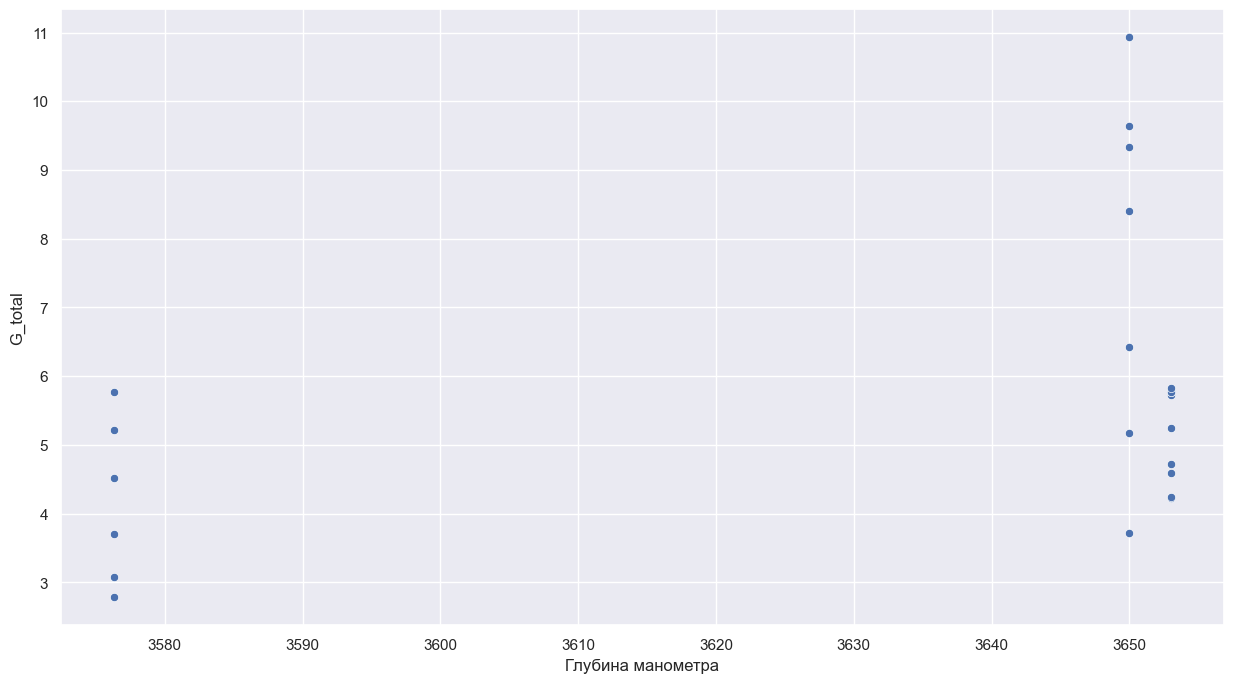

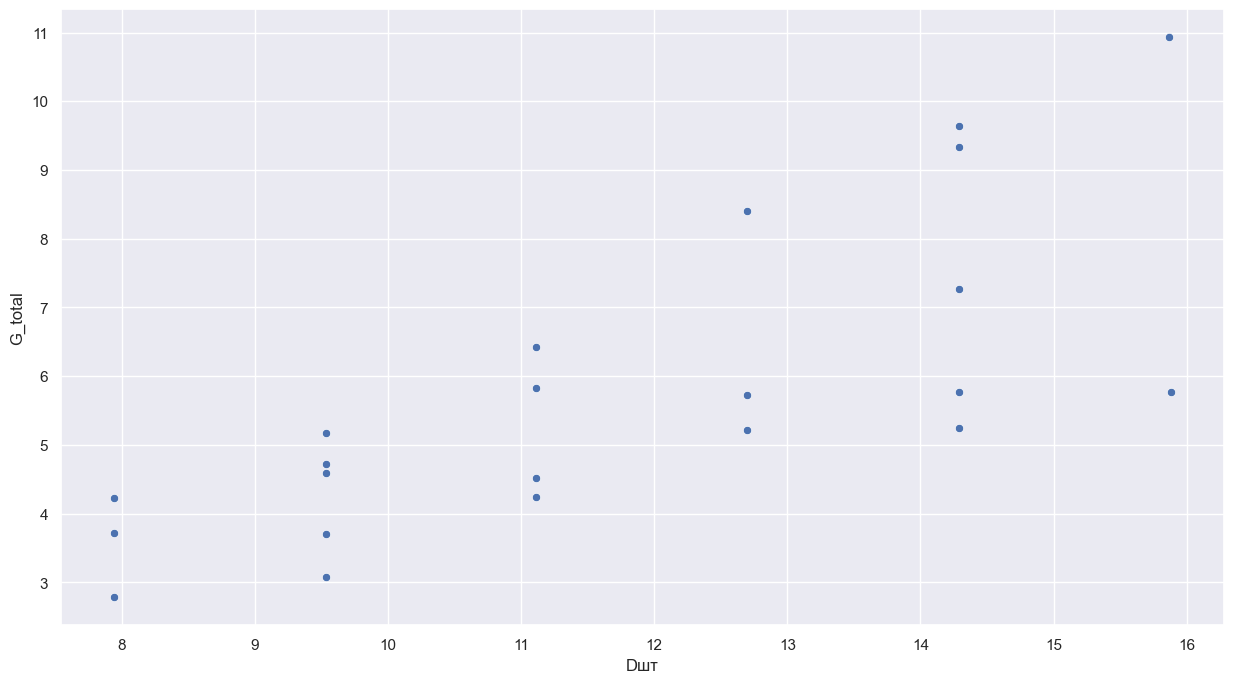

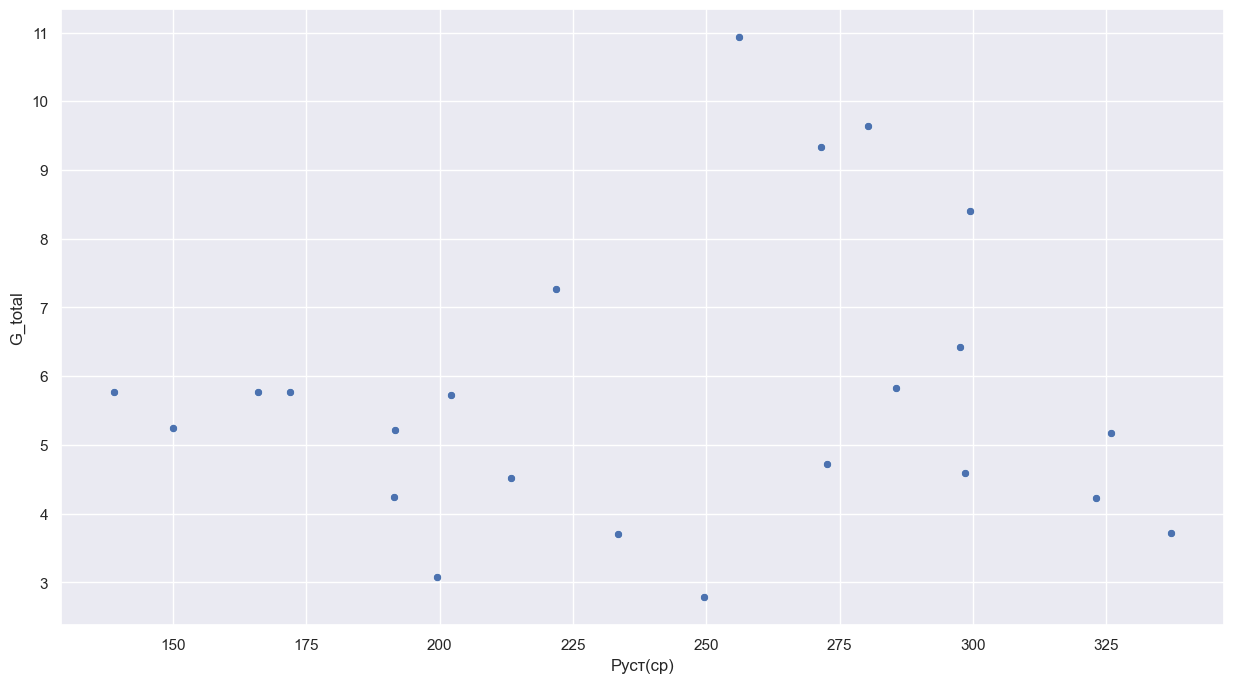

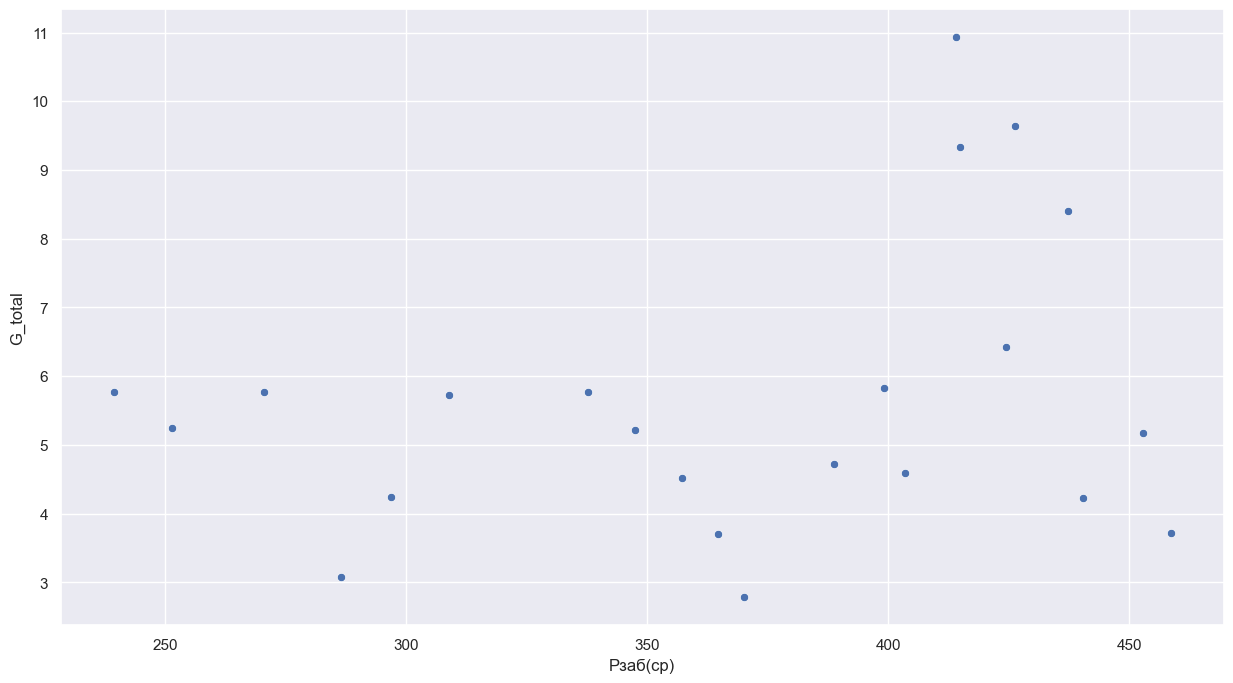

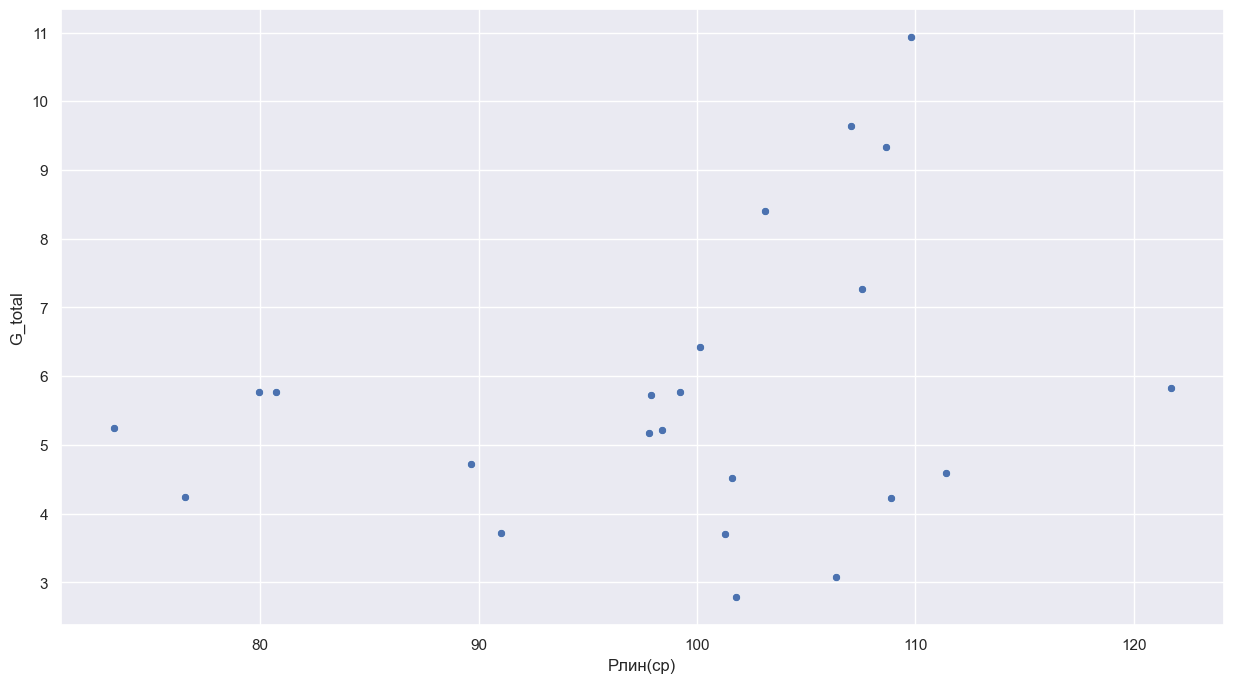

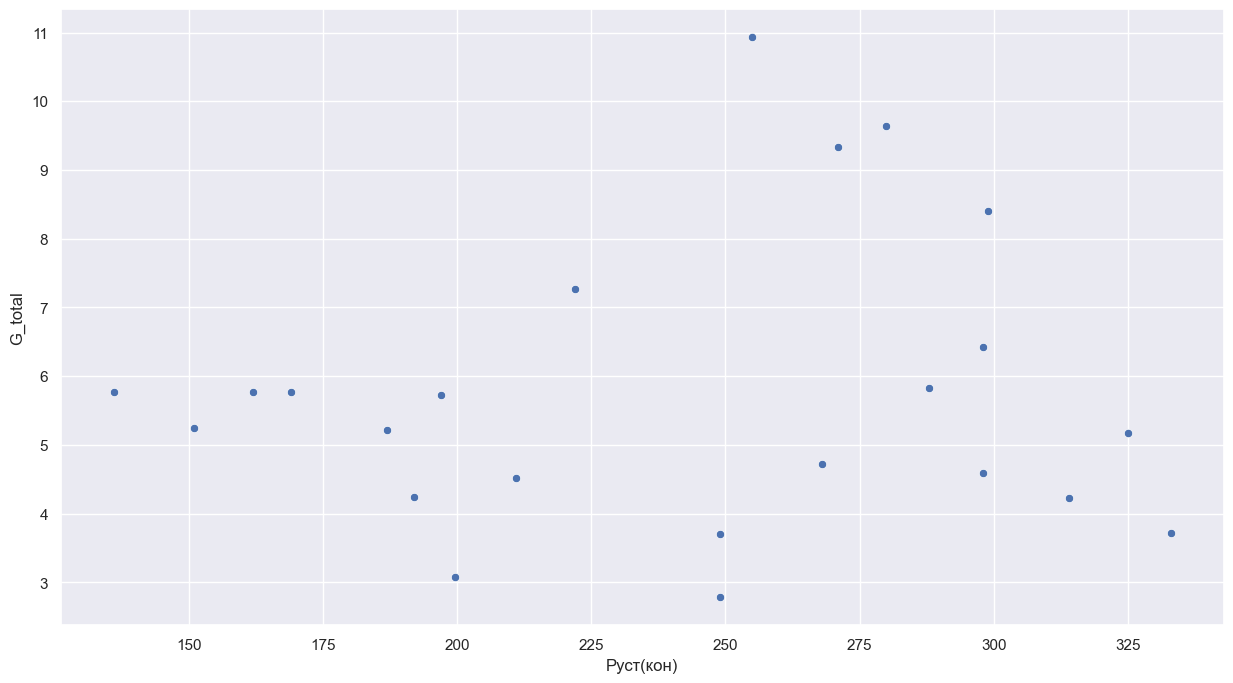

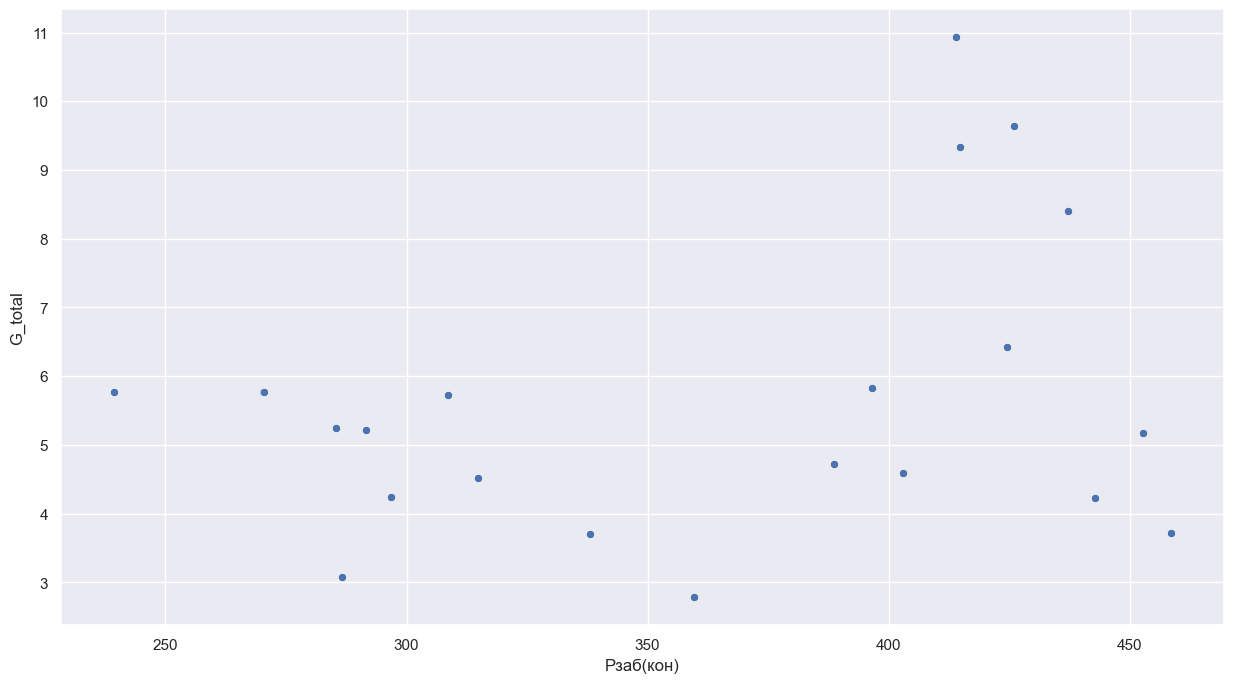

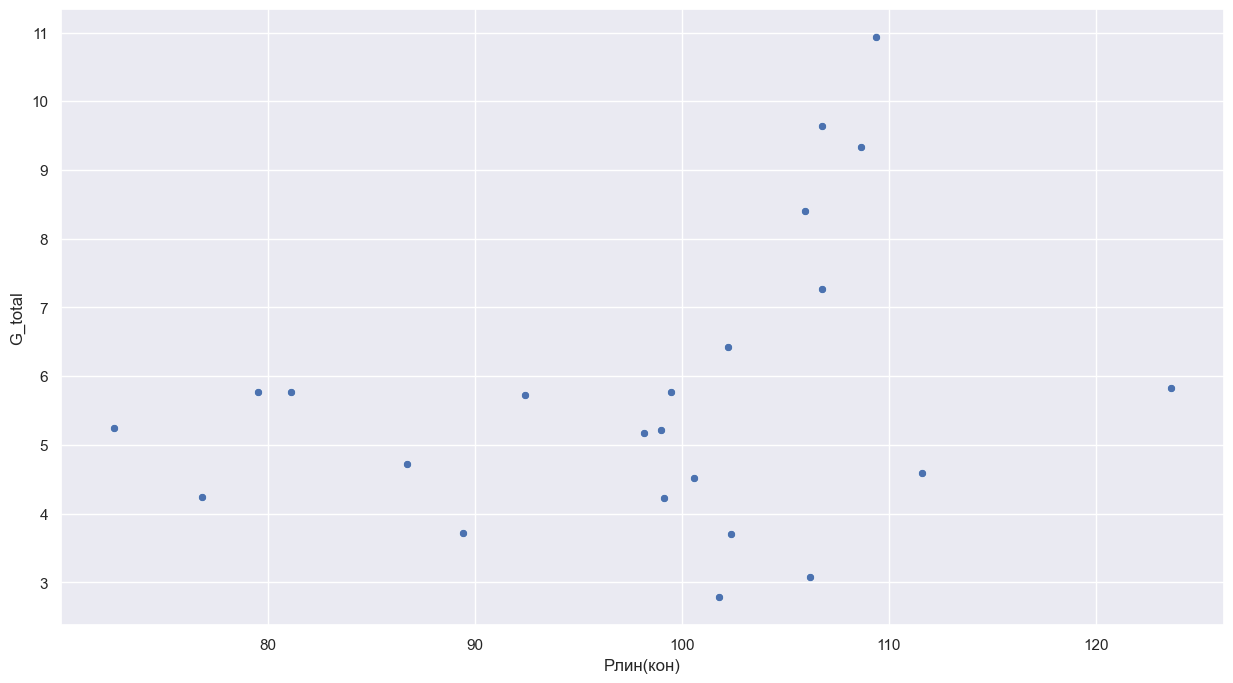

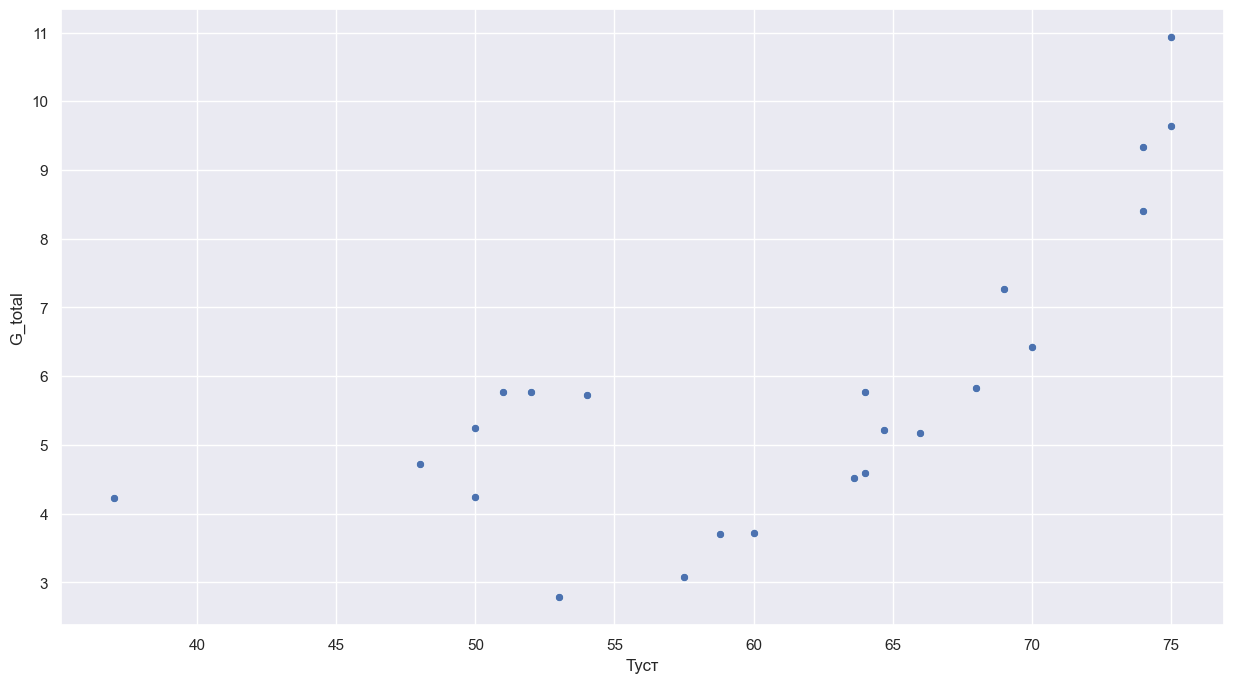

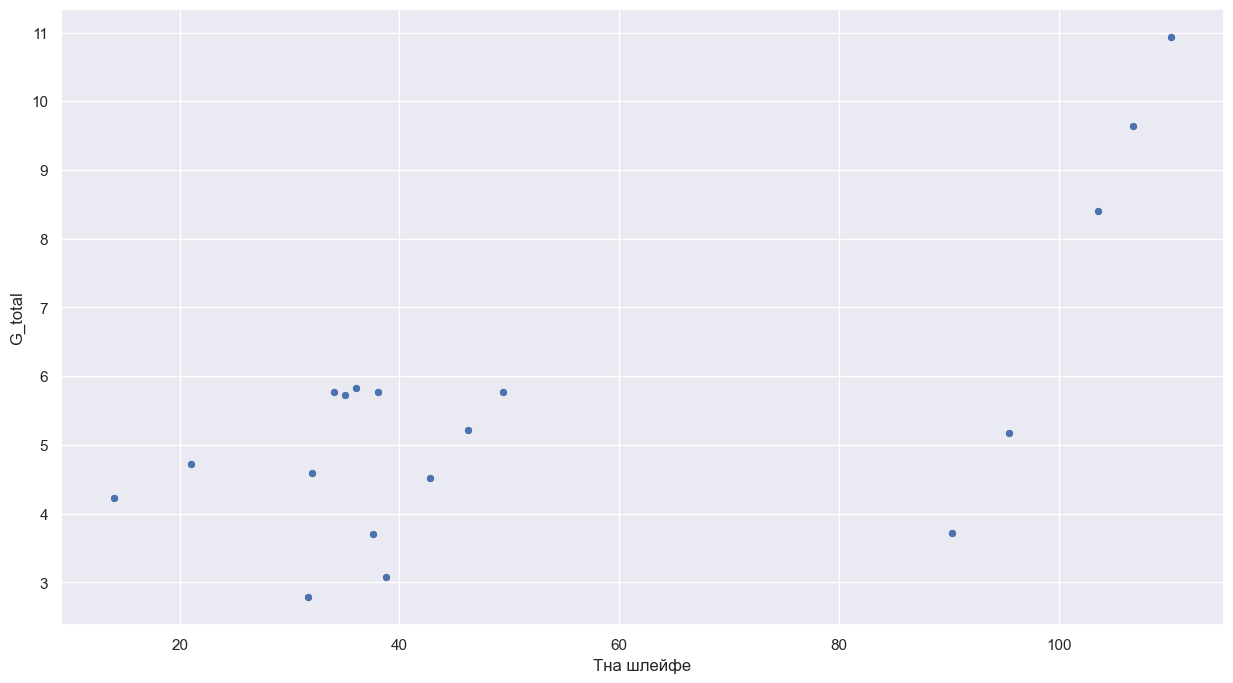

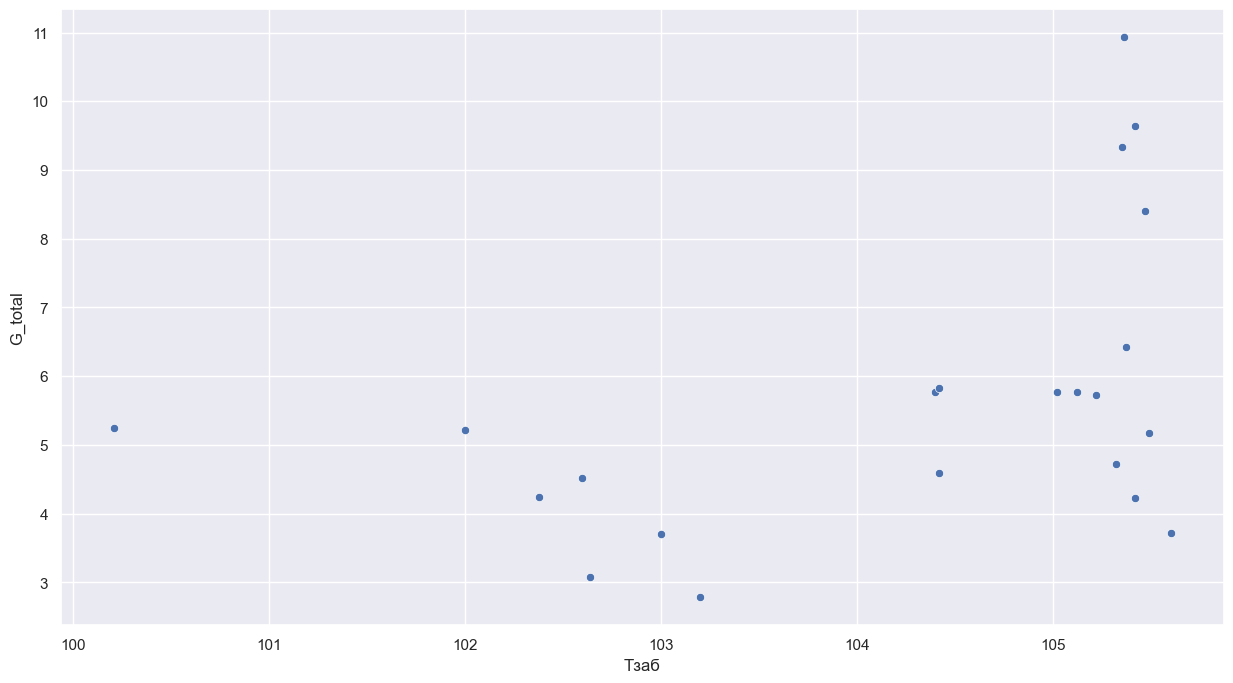

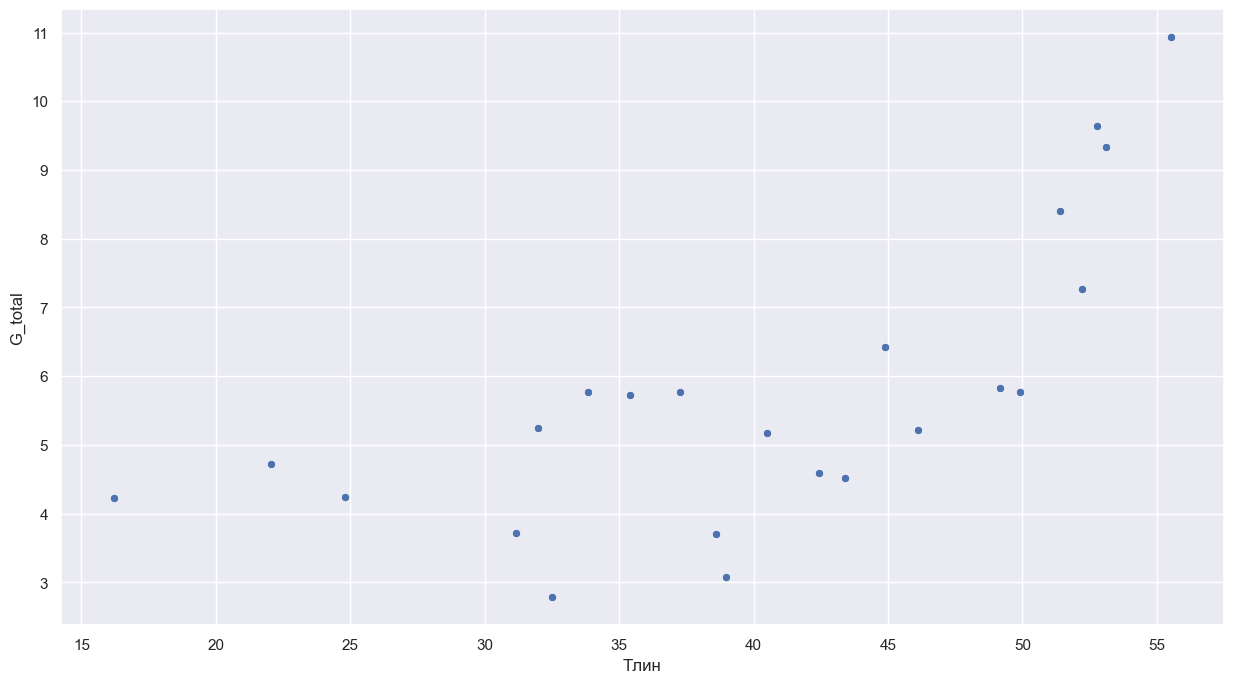

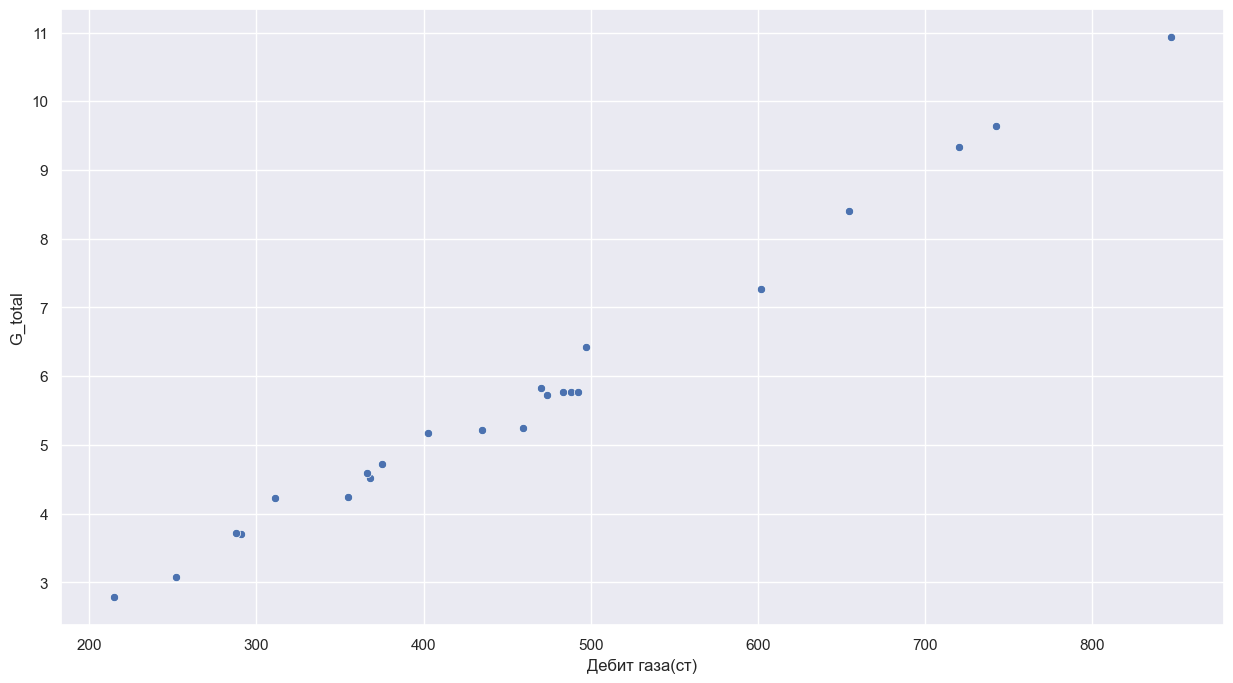

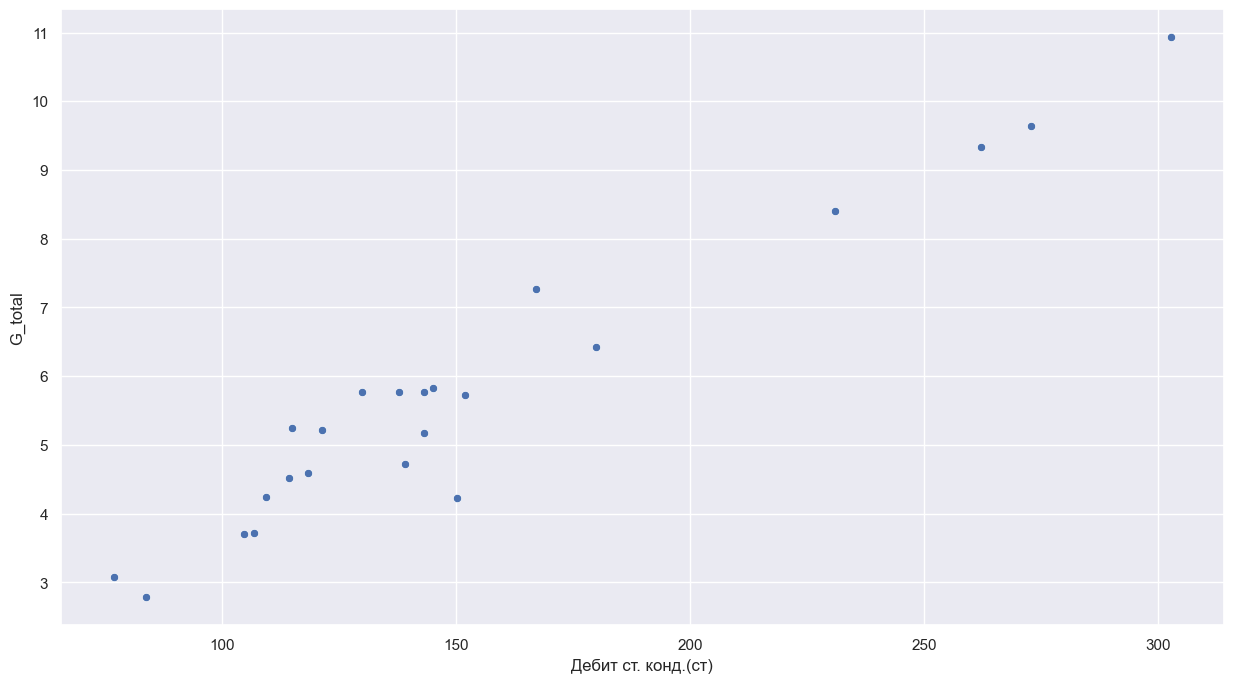

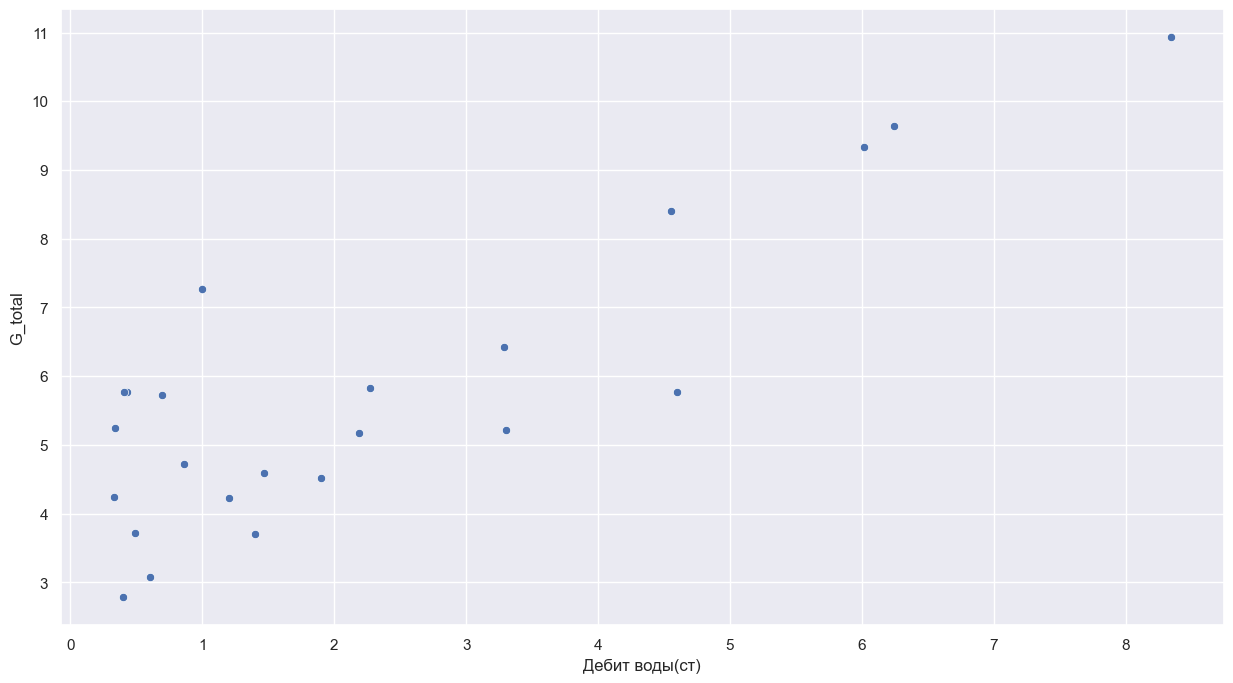

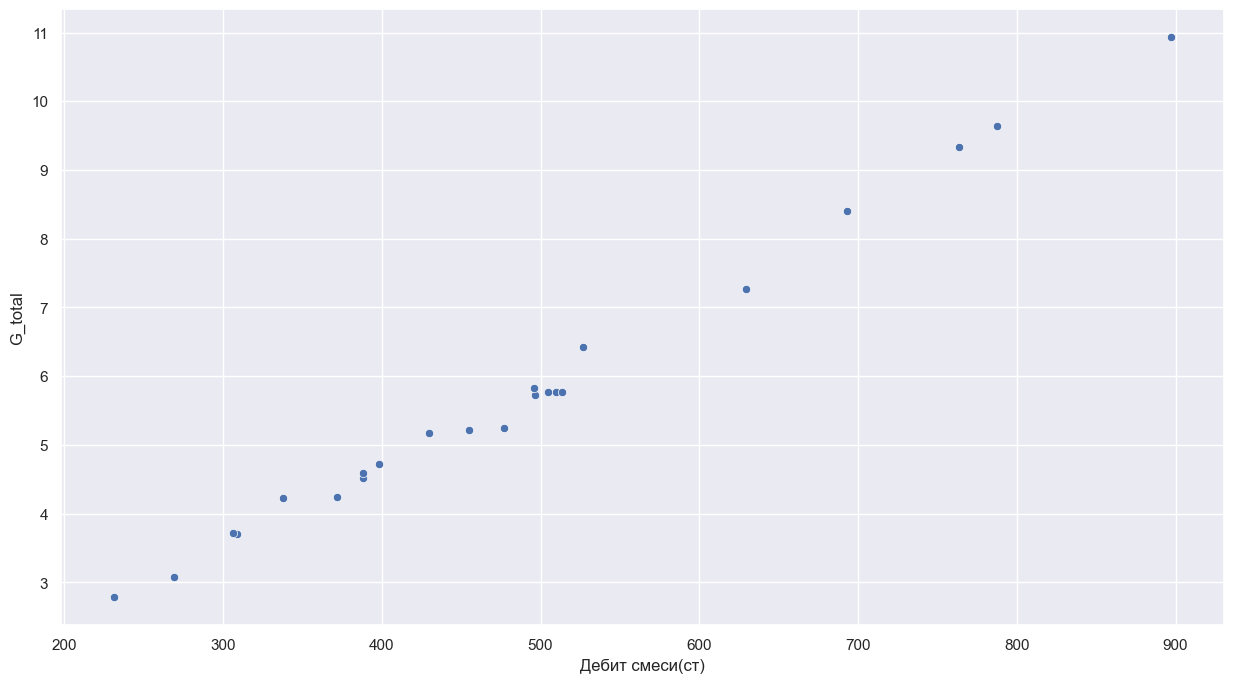

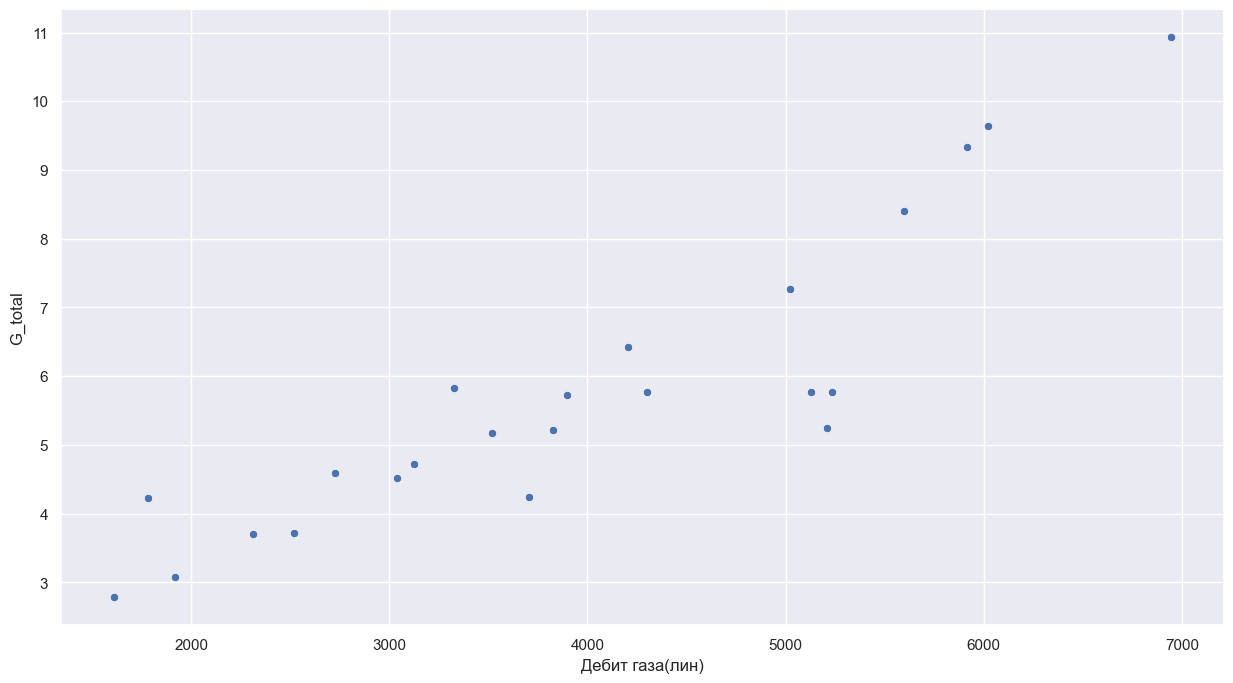

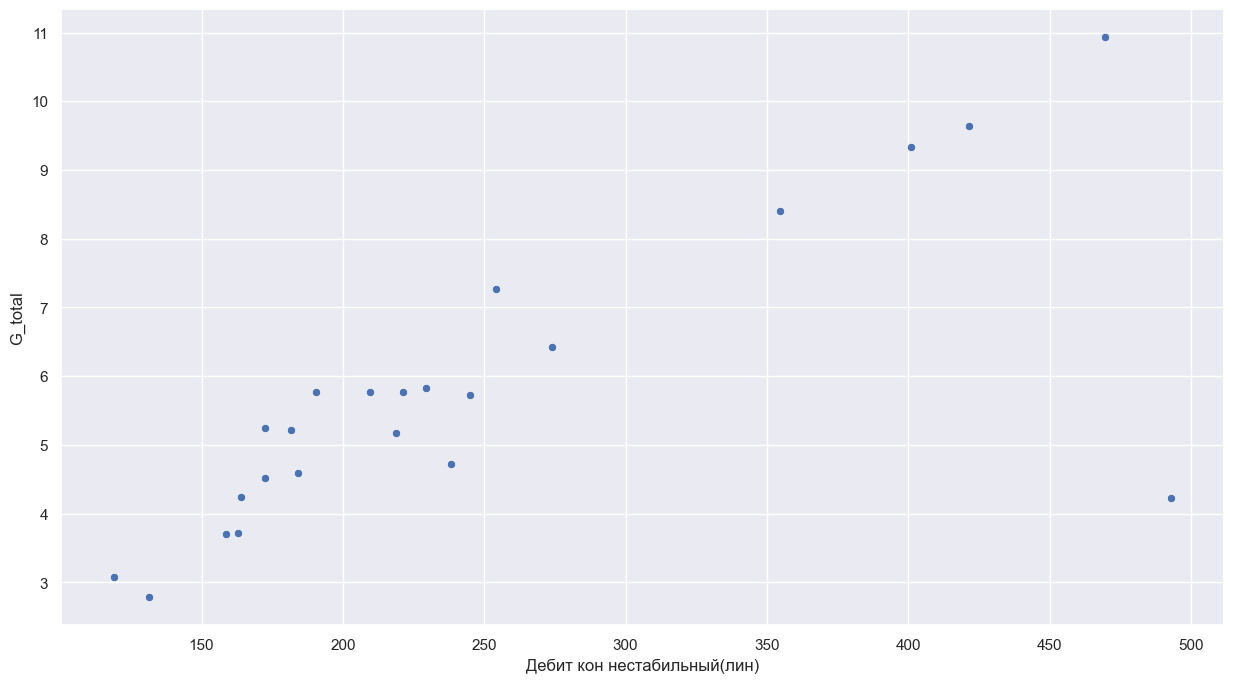

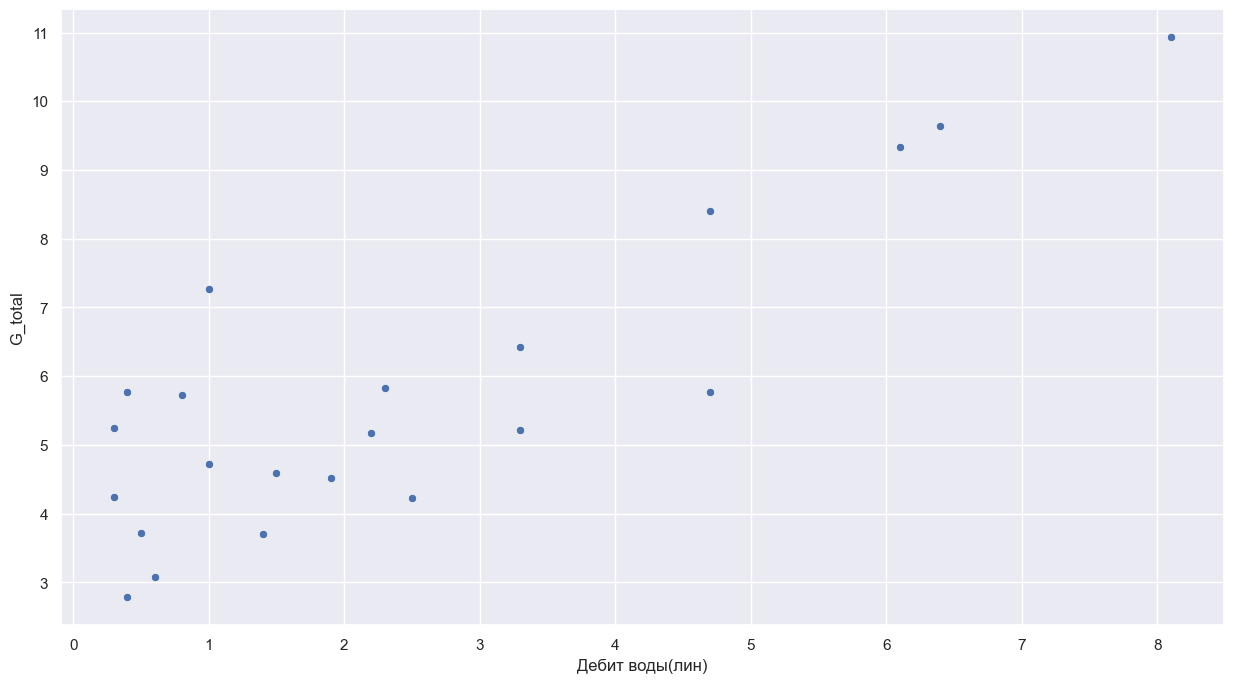

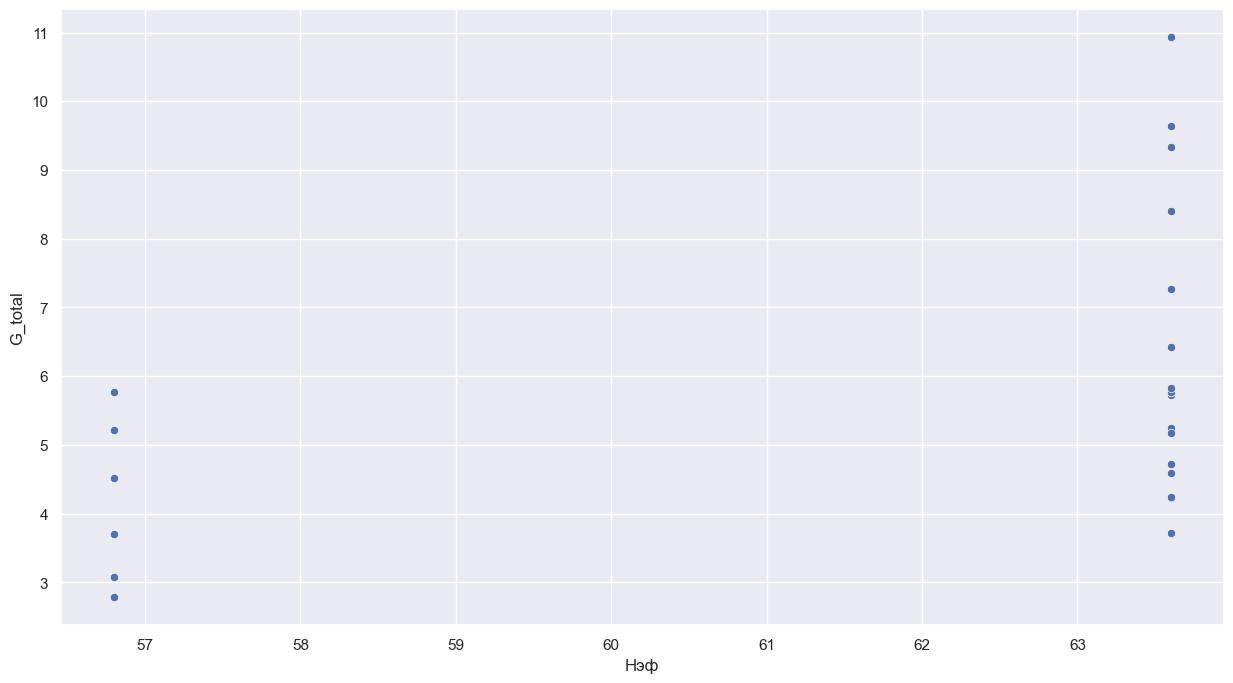

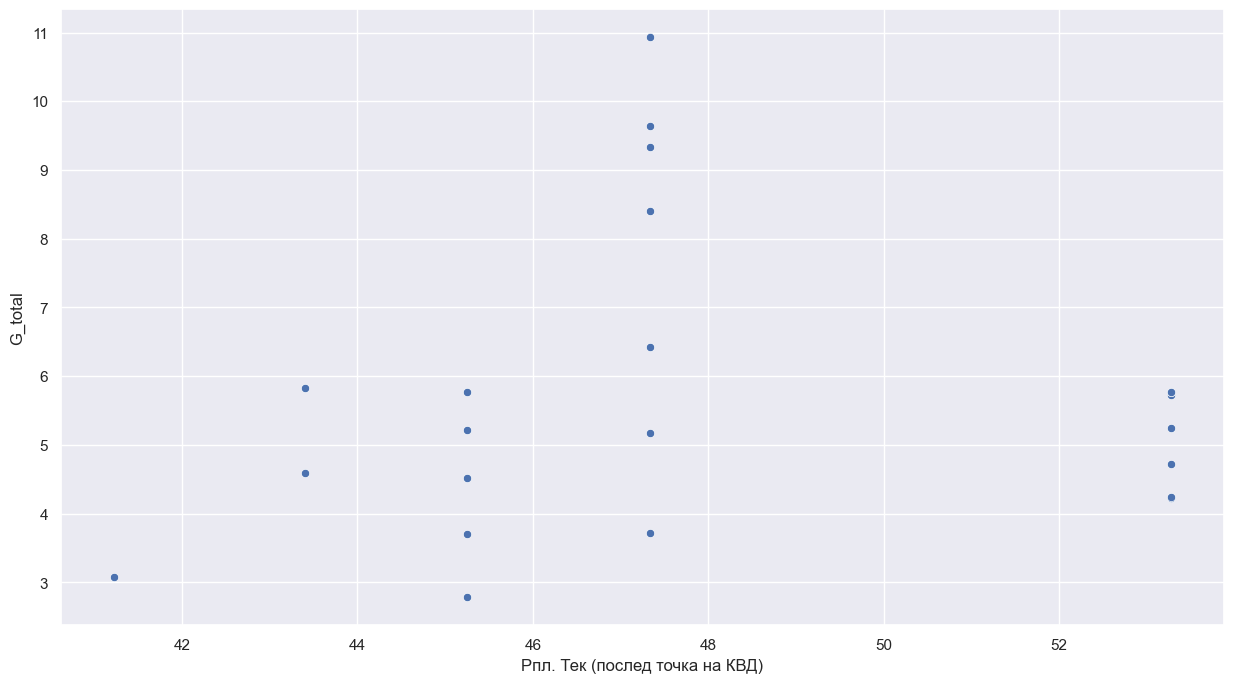

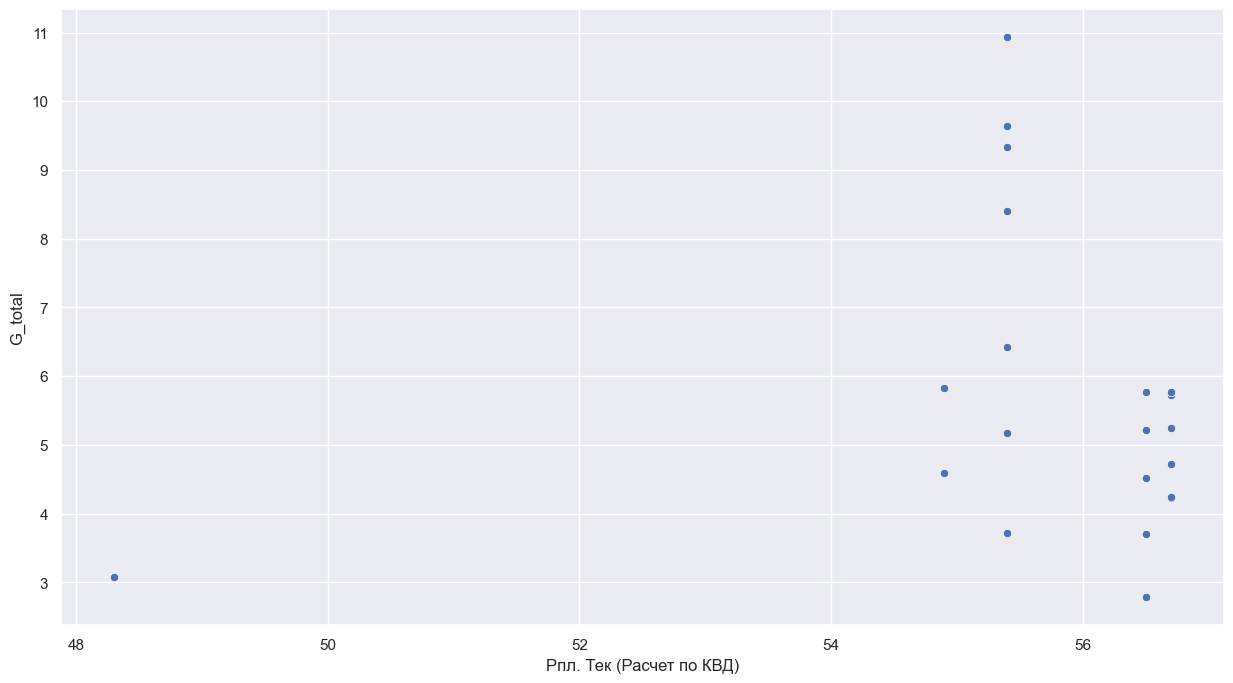

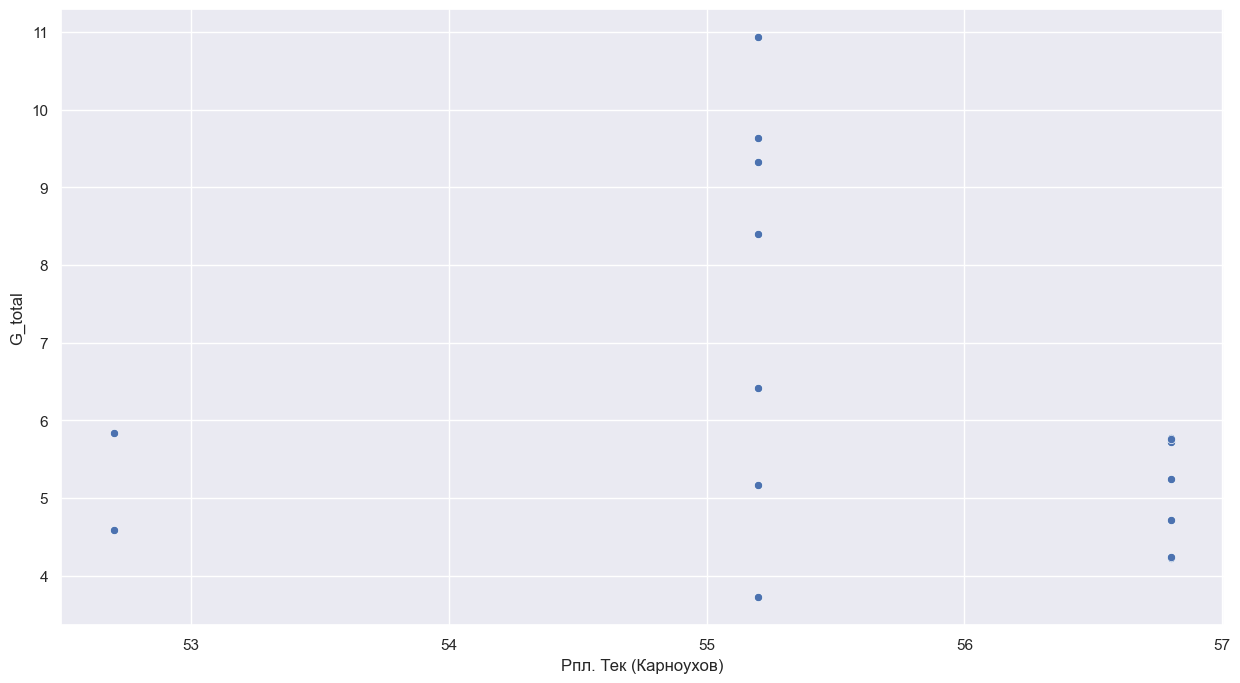

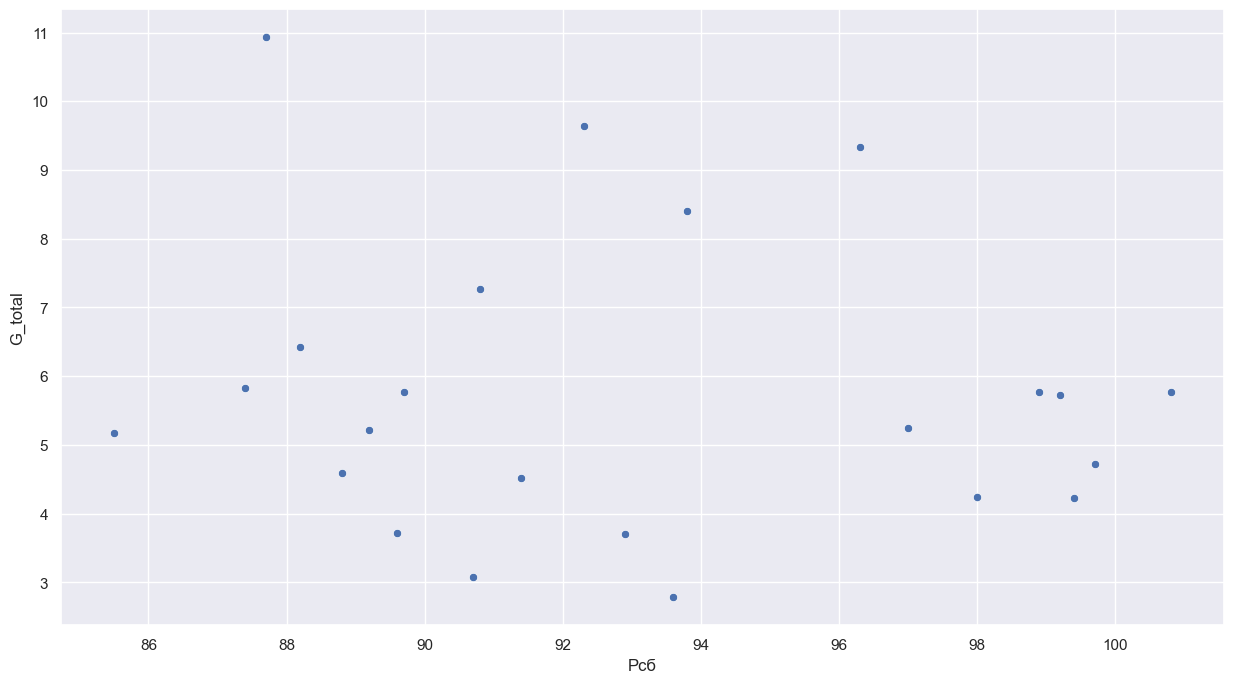

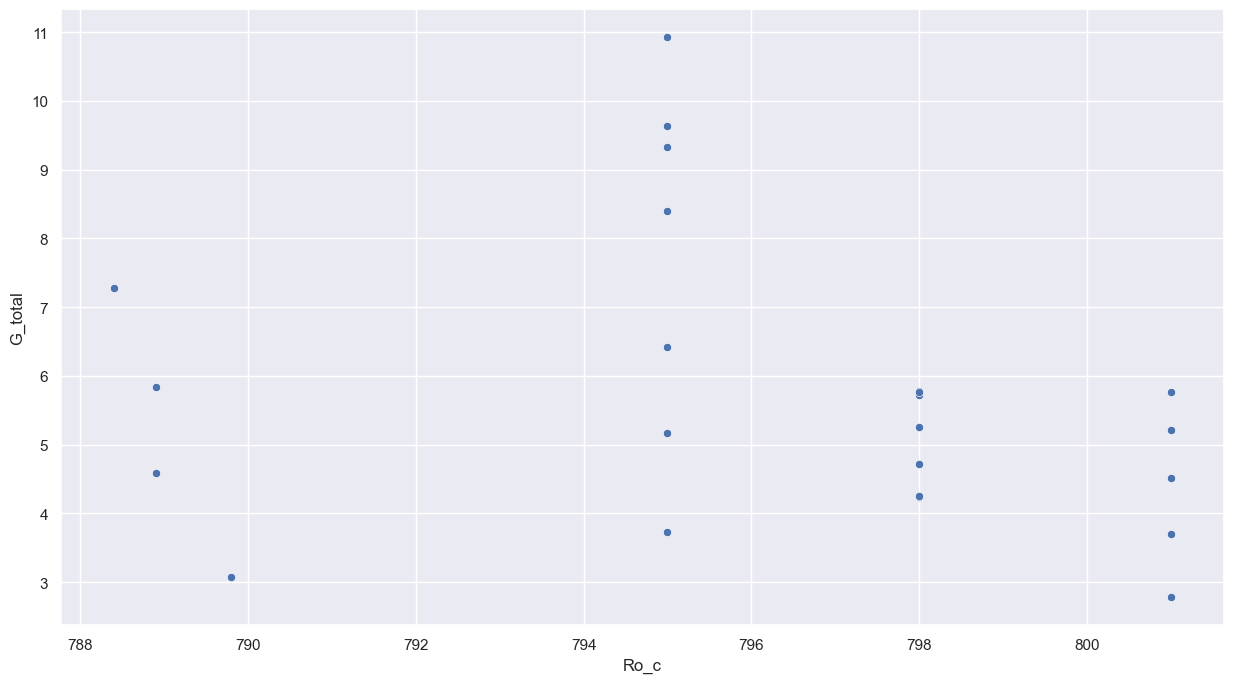

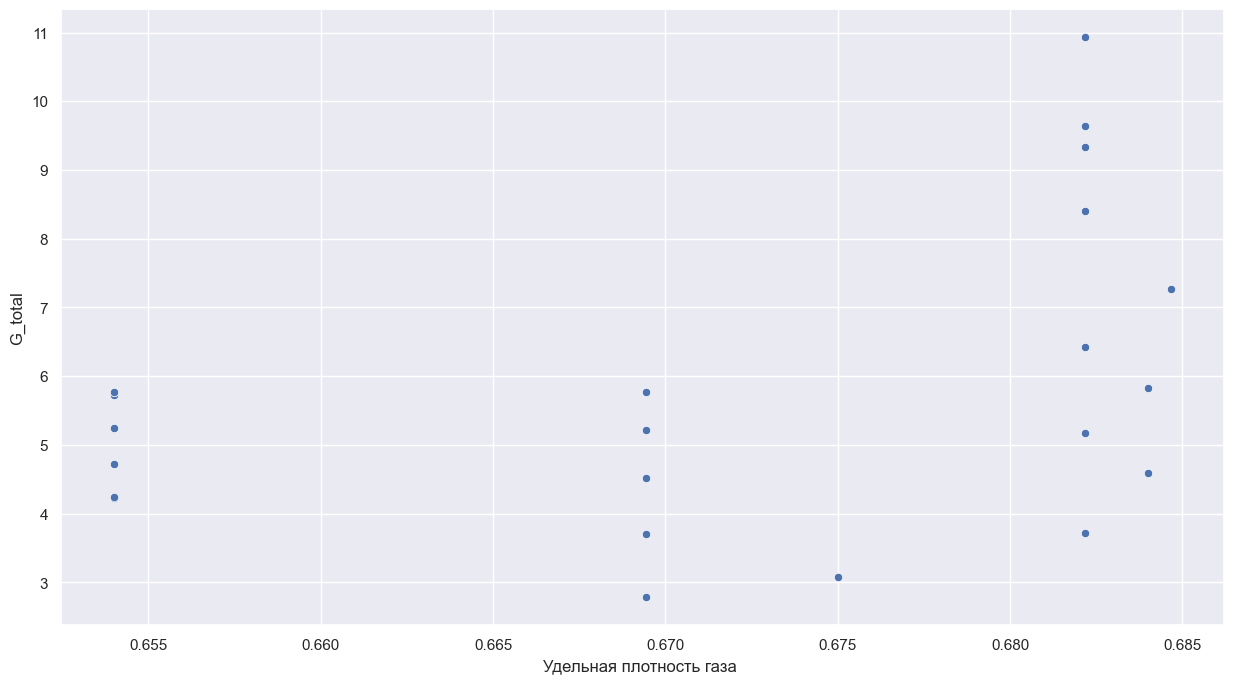

In [152]:
X1=df.iloc[:, 0:26]

for i in X1.columns:
    plt.figure(i)
    sns.scatterplot(data=df, y="G_total", x=i)
    plt.show()

### From the graphs we can see we have some outliers that can be cut-off using the inter quartile range

Index(['Руст(ср)', 'Руст(кон)', 'Рпл. Тек (послед точка на КВД)',
       'Рпл. Тек (Расчет по КВД)', 'Pсб'],
      dtype='object')


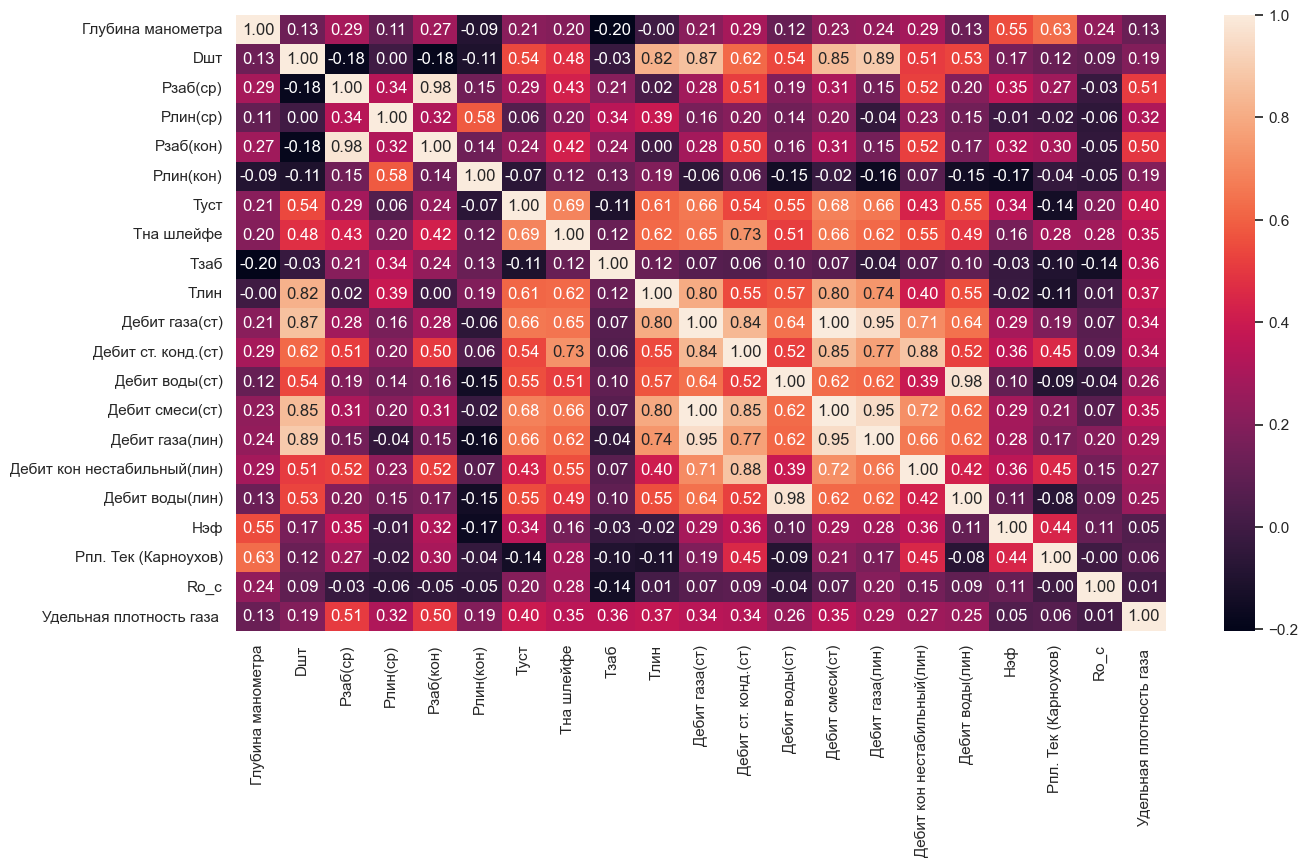

In [153]:
#checking correleation between G_total and the features
X = df.drop(df.columns[26:28], axis=1)
Y = df[df.columns[26]]

correlations = X.corrwith(Y)

threshold = 0.15 #inorder to identify even small correlations
correlated_features = correlations[correlations.abs() > threshold].index.tolist()
not_correlated = correlations[correlations.abs() < threshold].index.tolist()

# Choose data only with highly correlated features
X_filtered = X[correlated_features]

# It is also worth checking the correlation between the selected signs
corr_matrix = X_filtered.corr()

print(X[not_correlated].columns)


plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Index(['Pлин(ср)', 'Тзаб', 'Дебит газа(ст)', 'Дебит смеси(ст)',
       'Дебит газа(лин)', 'Дебит воды(лин)', 'Нэф', 'Pсб', 'Ro_c',
       'Удельная плотность газа '],
      dtype='object')


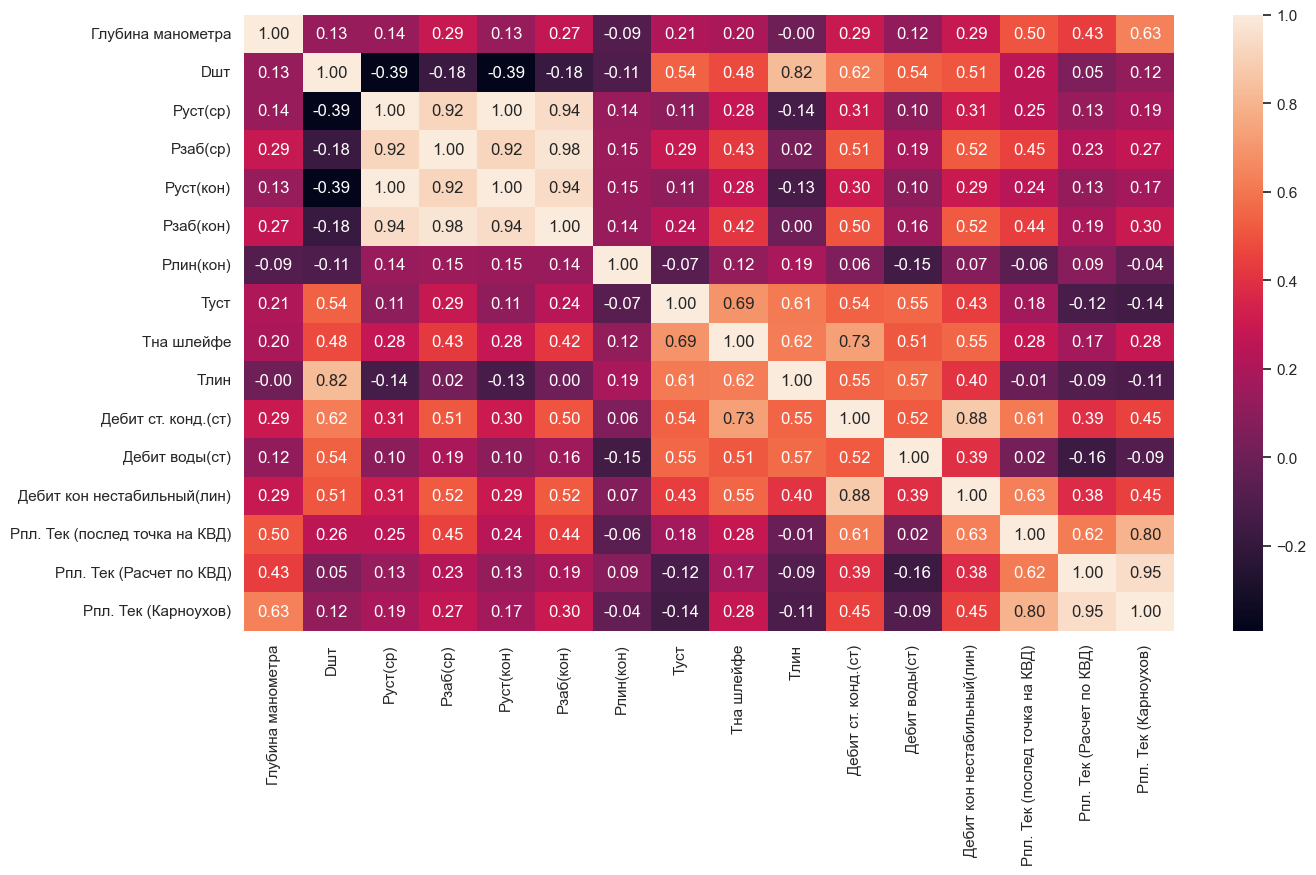

In [154]:
#checking correleation between KGF and the features
X = df.drop(df.columns[26:28], axis=1)
Y = df[df.columns[27]]

correlations = X.corrwith(Y)

threshold = 0.15 #inorder to identify even small correlations
correlated_features = correlations[correlations.abs() > threshold].index.tolist()
not_correlated = correlations[correlations.abs() < threshold].index.tolist()

# Choose data only with highly correlated features
X_filtered = X[correlated_features]

# It is also worth checking the correlation between the selected signs
corr_matrix = X_filtered.corr()

print(X[not_correlated].columns)


plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [155]:
#dropping Руст(кон), Руст(ср), Рзаб(кон) because of the high correlation. Рзаб(ср) will be enough to represent them. instead of four correlated features now we have one.
#dropping 'Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД) because of the correlation with Рпл. Тек (послед точка на КВД). I will keep it because it has high importance.
#dropping 'Dшт' because it has low importance and is strongly correlated to targets. 
df = df.drop(['Руст(кон)','Руст(ср)','Рзаб(кон)','Dшт','Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД)'], axis=1)
df.head()

Глубина манометра  Рзаб(ср)  Pлин(ср)  Рлин(кон)  Туст  Тна шлейфе   Тзаб  \
0             3576.3     370.1     101.8      101.8  53.0        31.7  103.2   
1             3576.3     364.6     101.3      102.4  58.8        37.6  103.0   
2             3576.3     357.1     101.6      100.6  63.6        42.8  102.6   
3             3576.3     347.4      98.4       99.0  64.7        46.2  102.0   
4             3576.3     337.7      99.2       99.5  64.0        49.4  104.4   

   Tлин  Дебит газа(ст)  Дебит ст. конд.(ст)  Дебит воды(ст)  Дебит смеси(ст)  \
0  32.5         214.704                 83.6             0.4        231.24884   
1  38.6         290.594                104.7             1.4        309.00166   
2  43.4         368.042                114.3             1.9        388.11498   
3  46.1         434.663                121.3             3.3        455.21452   
4  49.9         483.283                129.8             4.6        504.58778   

   Дебит газа(лин)  Дебит кон нестабильный(лин)  Дебит воды(лин)   Нэф  \
0      1610.368866                        131.3              0.4  56.8   
1      2310.226429                        158.5              1.4  56.8   
2      3039.489680                        172.3              1.9  56.8   
3      3824.082686                        181.5              3.3  56.8   
4      4299.104676                        190.6              4.7  56.8   

   Рпл. Тек (послед точка на КВД)   Pсб   Ro_c  Удельная плотность газа   \
0                           45.25  93.6  801.0                  0.669449   
1                           45.25  92.9  801.0                  0.669449   
2                           45.25  91.4  801.0                  0.669449   
3                           45.25  89.2  801.0                  0.669449   
4                           45.25  89.7  801.0                  0.669449   

    G_total       КГФ  
0  2.782623  311.9094  
1  3.697781  288.6003  
2  4.515073  248.7906  
3  5.217673  223.5591  
4  5.765092  215.1486

<Axes: >

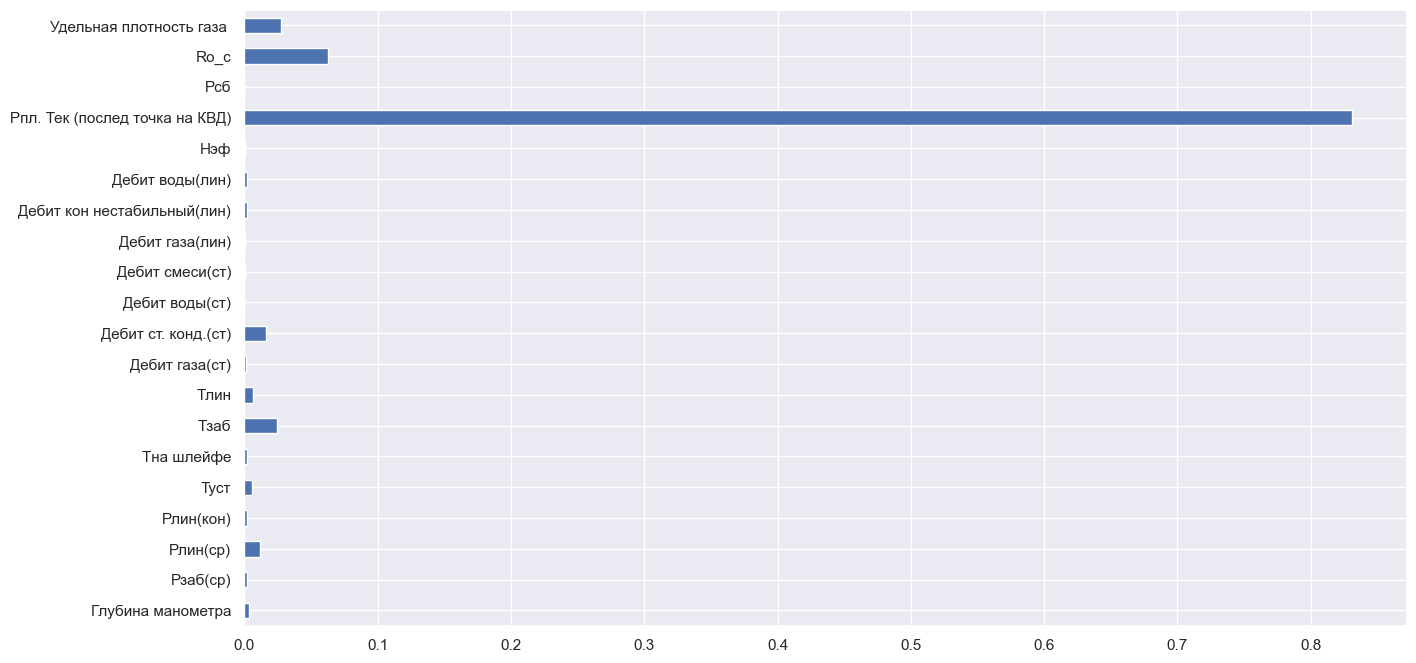

In [156]:
#generating importance with respect to G_total
df1 = df.fillna(-100)
X = df1.iloc[:, 0: 20]
Y = df1.iloc[:, 20]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')


<Axes: >

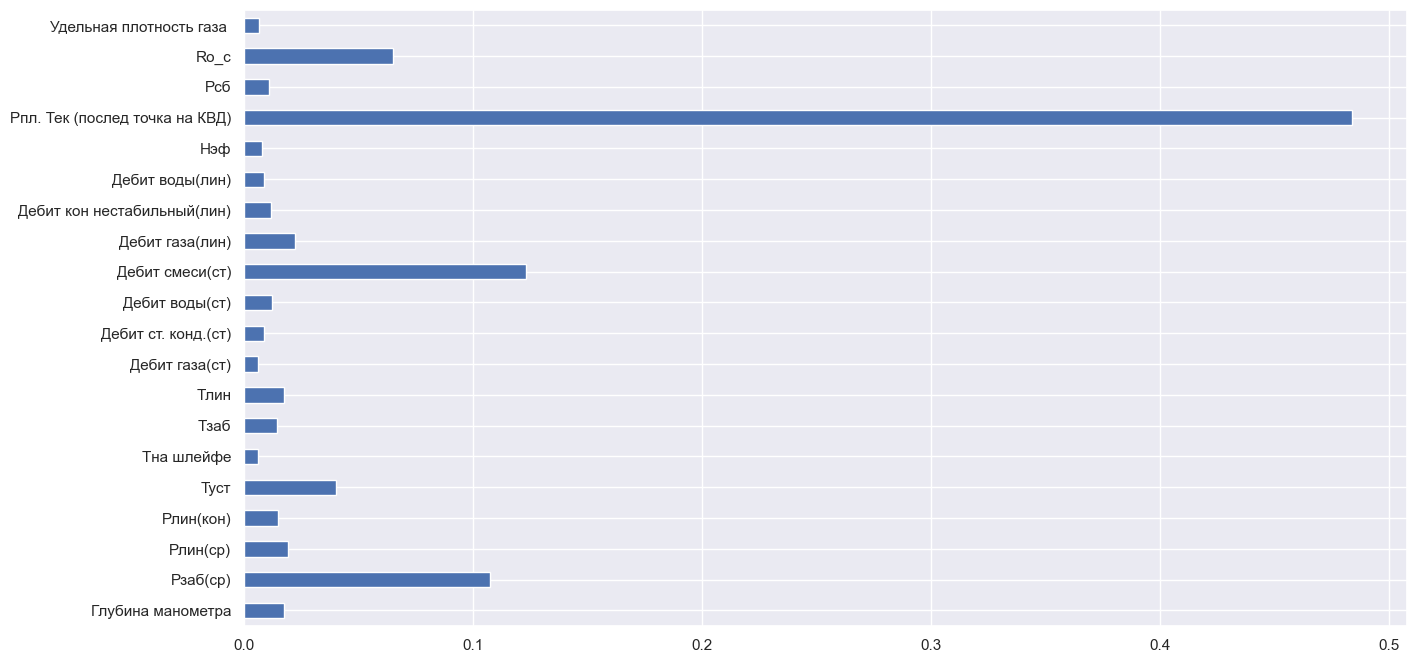

In [157]:
#generating importance with respect to KGF
df1 = df.fillna(-100)
X = df1.iloc[:, 0: 20]
Y = df1.iloc[:, 21]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [158]:
#dropping 'Дебит ст. конд.(ст)' because it has high correlation with Дебит кон нестабильный and has low importance
#dropping 'Дебит воды(лин)' because it has high correlation with Дебит воды(ст) and the latter has higher importance
#dropping 'Дебит газа(ст)' and 'Дебит газа(лин)' because they have high correlation with Дебит смеси(ст) but has higher importance
df1 = df1.drop(['Дебит ст. конд.(ст)', 'Дебит воды(лин)', 'Дебит газа(ст)', 'Дебит газа(лин)'], axis=1)
df1.head()

Глубина манометра  Рзаб(ср)  Pлин(ср)  Рлин(кон)  Туст  Тна шлейфе   Тзаб  \
0             3576.3     370.1     101.8      101.8  53.0        31.7  103.2   
1             3576.3     364.6     101.3      102.4  58.8        37.6  103.0   
2             3576.3     357.1     101.6      100.6  63.6        42.8  102.6   
3             3576.3     347.4      98.4       99.0  64.7        46.2  102.0   
4             3576.3     337.7      99.2       99.5  64.0        49.4  104.4   

   Tлин  Дебит воды(ст)  Дебит смеси(ст)  Дебит кон нестабильный(лин)   Нэф  \
0  32.5             0.4        231.24884                        131.3  56.8   
1  38.6             1.4        309.00166                        158.5  56.8   
2  43.4             1.9        388.11498                        172.3  56.8   
3  46.1             3.3        455.21452                        181.5  56.8   
4  49.9             4.6        504.58778                        190.6  56.8   

   Рпл. Тек (послед точка на КВД)   Pсб   Ro_c  Удельная плотность газа   \
0                           45.25  93.6  801.0                  0.669449   
1                           45.25  92.9  801.0                  0.669449   
2                           45.25  91.4  801.0                  0.669449   
3                           45.25  89.2  801.0                  0.669449   
4                           45.25  89.7  801.0                  0.669449   

    G_total       КГФ  
0  2.782623  311.9094  
1  3.697781  288.6003  
2  4.515073  248.7906  
3  5.217673  223.5591  
4  5.765092  215.1486

<Axes: >

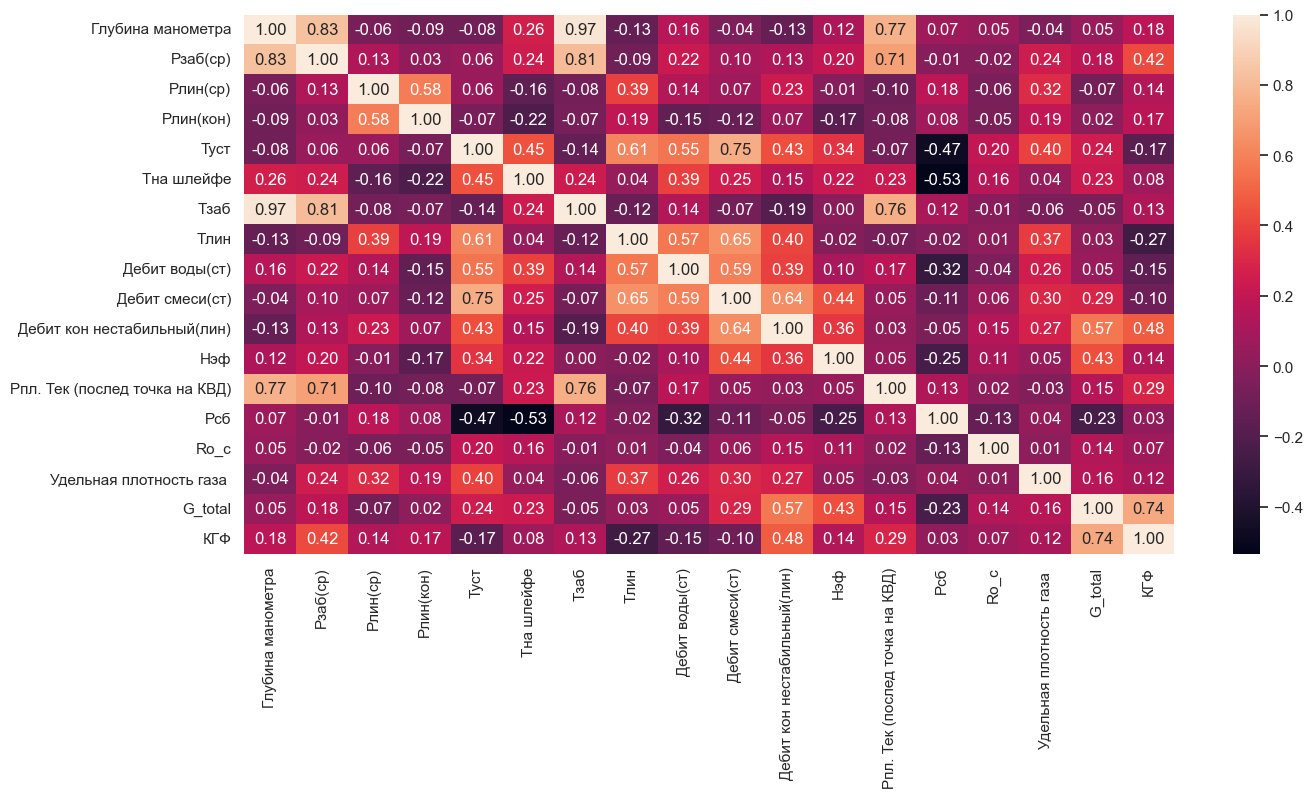

In [159]:
sns.set(rc = {'figure.figsize': (15,7)})
sns.heatmap(df1.corr(),annot=True, fmt=".2f")

<Axes: >

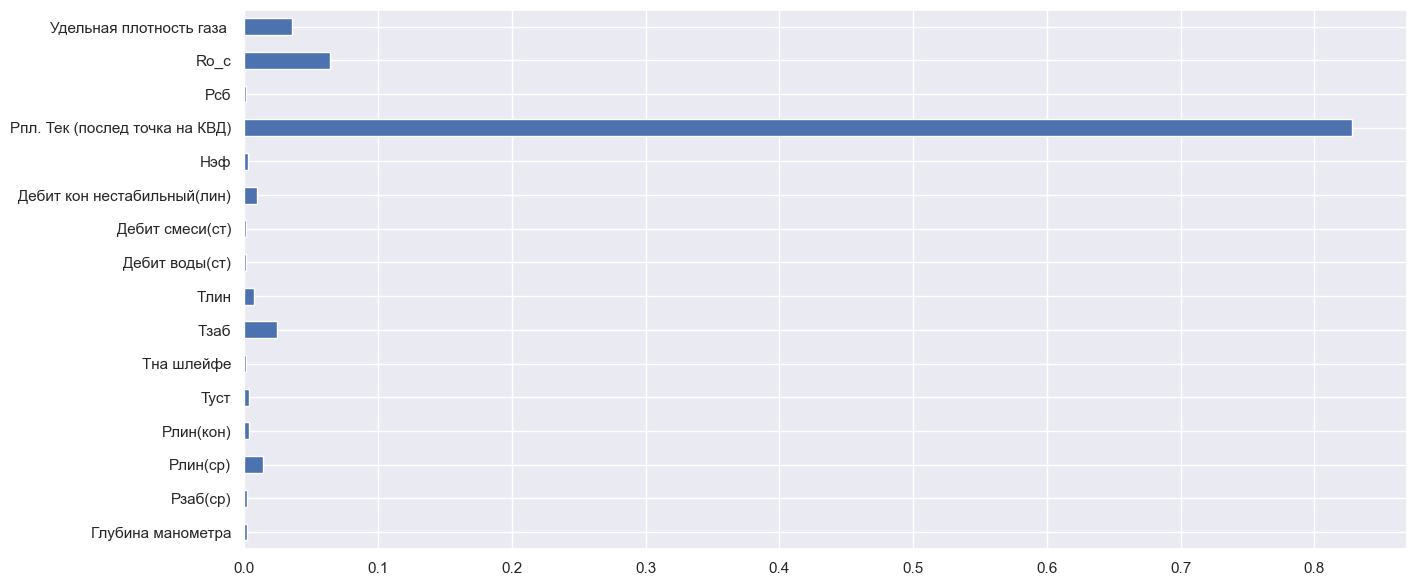

In [160]:
#checking importance with G_total
X = df1.iloc[:, 0: 16]
Y = df1.iloc[:, 16]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

<Axes: >

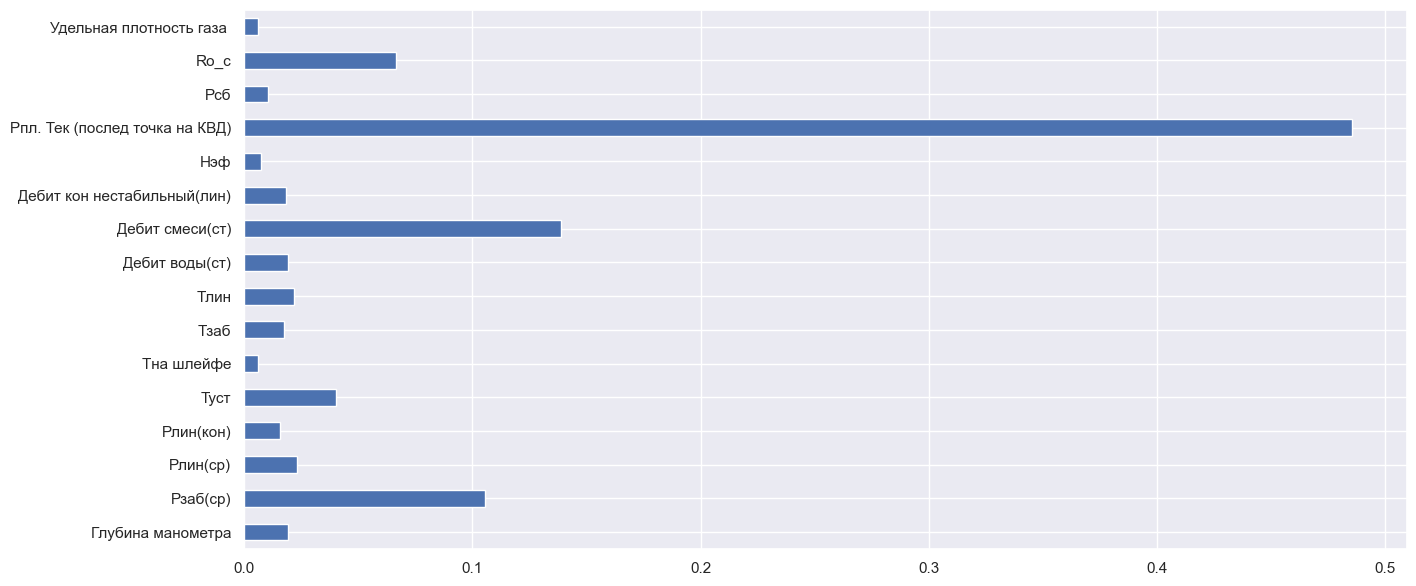

In [161]:
#checking importance with KGF
X = df1.iloc[:, 0: 16]
Y = df1.iloc[:, 17]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

## Conclusion

1. I removed Ro_g and Ro_w because of the high percentage of missing values and the Ro_w has a power equal to 1.
2. Dropping Руст(кон), Руст(ср), Рзаб(кон) because of the high correlation. Рзаб(ср) will be enough to represent them. instead of four correlated features now we have one.
3. Dropping 'Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД) because of the correlation with Рпл. Тек (послед точка на КВД). I will keep it because it has high importance.
4. Dropping 'Dшт' because it has low importance and is strongly correlated to targets. 
5. Dropping 'Дебит ст. конд.(ст)' because it has high correlation with Дебит кон нестабильный and has low importance.
6. Dropping 'Дебит воды(лин)' because it has high correlation with Дебит воды(ст) and the latter has higher importance.
7. Dropping 'Дебит газа(ст)' and 'Дебит газа(лин)' because they have high correlation with Дебит смеси(ст) but has higher importance.

In [166]:
def remove_outliers_and_fill_mean(df):
    for column in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        # Replace outliers with NaN
        df.loc[outliers, column] = np.nan

        # Fill NaN values with the mean of the column
        df[column].fillna(df[column].mean(), inplace=True)

    return df

# Process the DataFrame
cleaned_df = remove_outliers_and_fill_mean(df1)
cleaned_df

C:\Users\mewie\AppData\Local\Temp\ipykernel_24124\4188522865.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\mewie\AppData\Local\Temp\ipykernel_24124\4188522865.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Глубина манометра    Рзаб(ср)    Pлин(ср)   Рлин(кон)       Туст  \
0         3576.300000  370.100000  101.800000  101.800000  53.000000   
1         3576.300000  364.600000  101.300000  102.400000  58.800000   
2         3576.300000  357.100000  101.600000  100.600000  63.600000   
3         3576.300000  347.400000   98.400000   99.000000  64.700000   
4         3576.300000  337.700000   99.200000   99.500000  64.000000   
5         3576.300000  286.400000  106.361669  106.190000  57.500000   
6         3667.000000  354.333525  102.932004  101.565484  56.000000   
7         3667.000000  350.200000  103.186902  103.322581  61.000000   
8         3667.000000  344.000000  105.671499  105.588710  65.000000   
9         3667.000000  336.700000  108.100063  108.144839  42.000000   
10        3579.000000  365.860000  103.471415  101.420323  52.000000   
11        3579.000000  342.270000  103.200466  104.180000  58.000000   
12        3579.000000  312.270000  103.187111  103.000000  61.000000   
13        3579.000000  291.740000  103.229928  103.917419  62.000000   
14        3579.000000  263.030000  107.377560  107.536667  63.000000   
15        3582.500000  292.000000  105.507978  105.030000  56.000000   
16        3653.000000  440.500000  108.886435   99.167355  37.000000   
17        3653.000000  388.700000   89.652839   86.747194  48.000000   
18        3653.000000  308.800000   97.877045   92.457903  54.000000   
19        3653.000000  270.500000  100.622979  100.554787  52.000000   
20        3653.000000  239.300000  100.622979  100.554787  51.000000   
21        3653.000000  251.300000  100.622979  100.554787  50.000000   
22        3653.000000  296.800000  100.622979  100.554787  50.000000   
23        3650.000000  458.600000   91.045545   89.433677  60.000000   
24        3650.000000  452.800000   97.787995   98.179065  66.000000   
25        3650.000000  437.300000  103.108052  105.977097  74.000000   
26        3650.000000  426.200000  107.062626  106.771290  75.000000   
27        3650.000000  414.000000  109.784475  109.390323  75.000000   
28        3650.000000  414.800000  108.633163  108.640000  74.000000   
29        3650.000000  424.500000  100.126341  102.254286  70.000000   
30        3653.000000  403.400000  111.381880  111.612903  64.000000   
31        3653.000000  399.200000  100.622979  100.554787  68.000000   
32        3524.086667  333.534865  107.555531  106.770000  69.000000   
33        3572.000000  341.500000  106.000000  114.700000  57.203333   
34        3572.000000  330.000000  105.900000  103.800000  31.000000   
35        3572.000000  316.000000  108.900000  108.700000  37.000000   
36        3572.000000  301.600000  101.700000  108.400000  37.000000   
37        3588.500000  359.900000  100.200000  100.200000  57.000000   
38        3588.500000  346.900000   98.900000   98.800000  62.000000   
39        3588.500000  330.500000   94.500000   93.100000  66.000000   
40        3588.500000  314.200000   96.900000   97.000000  68.000000   
41        3588.500000  297.500000   98.200000   98.300000  68.000000   
42        3588.500000  306.900000   97.200000   97.600000  67.000000   
43        3524.086667  333.534865  100.369642  100.260000  58.000000   
44        3478.500000  347.000000   93.852163   94.363065  57.000000   
45        3478.500000  342.000000   94.360181   94.184839  60.000000   
46        3524.086667  333.534865  102.135191  102.230000  66.000000   
47        3640.500000  403.000000  105.384230  105.950323  47.000000   
48        3640.500000  396.600000  108.491570  108.117097  59.000000   
49        3640.500000  390.000000  107.785976  108.501613  62.000000   
50        3640.500000  384.400000  110.165932  110.190000  64.000000   
51        3667.000000  362.800000   95.601217   95.335032  49.000000   
52        3667.000000  359.300000   96.597383   97.321839  55.000000   
53        3667.000000  354.000000   98.952402  100.554787  60.000000   
54        3667.000000  348.100000  100.10129

In [167]:
C = len(cleaned_df.columns)
L = len(cleaned_df.index)
CN = cleaned_df.count()
NP = ((L-CN)/L)*100
MN = cleaned_df.min()
Q1 = cleaned_df.quantile(q=0.25)
MA = cleaned_df.mean() 
ME = cleaned_df.median() 
Q3 = cleaned_df.quantile(q=0.75) 
MX = cleaned_df.max() 
ST = cleaned_df.std() 
P = cleaned_df.nunique() 
IQ = Q3-Q1 

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

<Axes: >

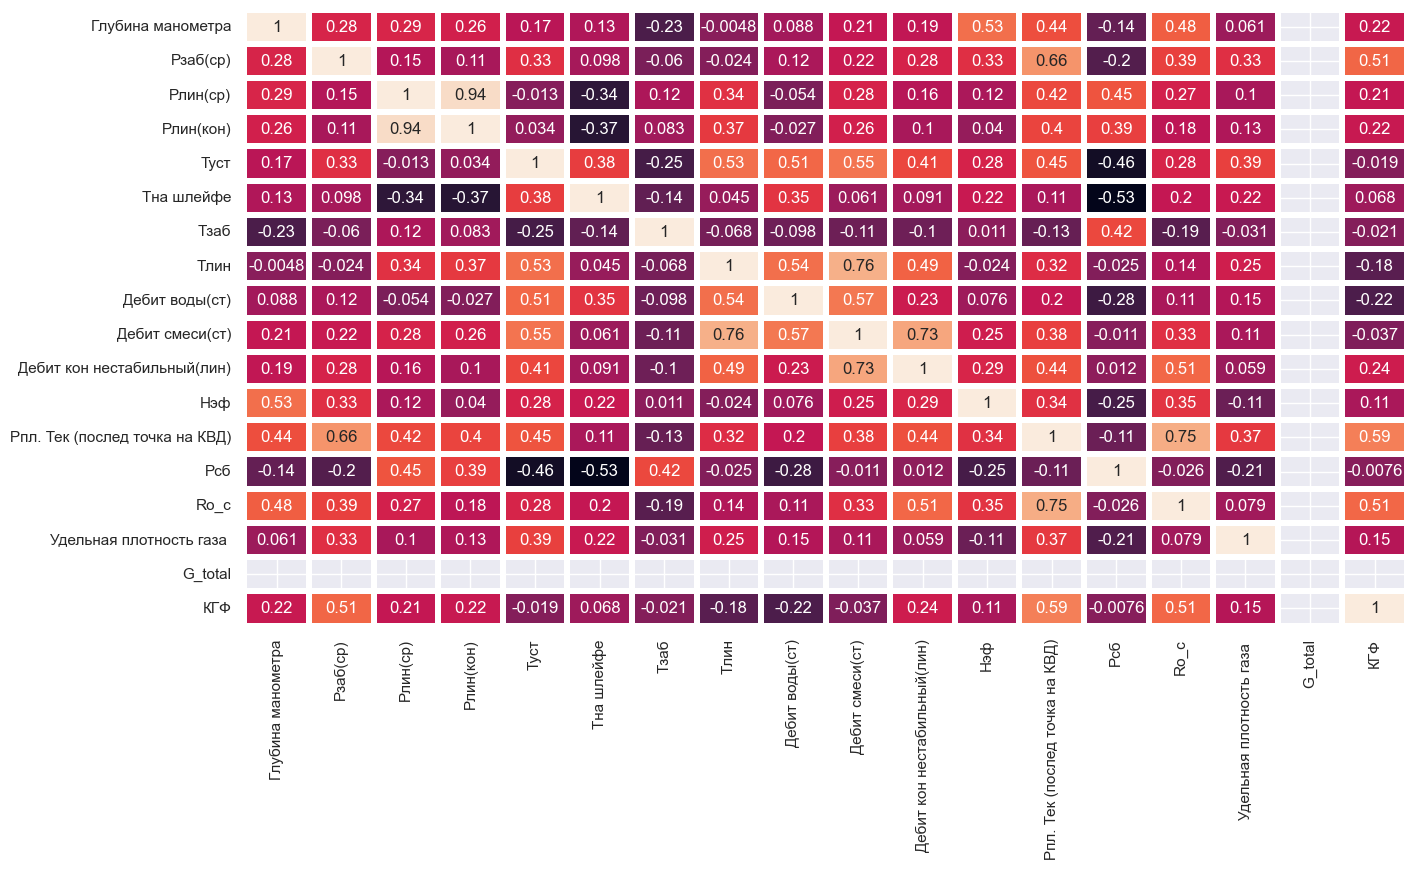

In [168]:
sns.set(rc={'figure.figsize': (15,8),})
sns.heatmap(cleaned_df.corr(), annot=True, linewidths=3, cbar=False)

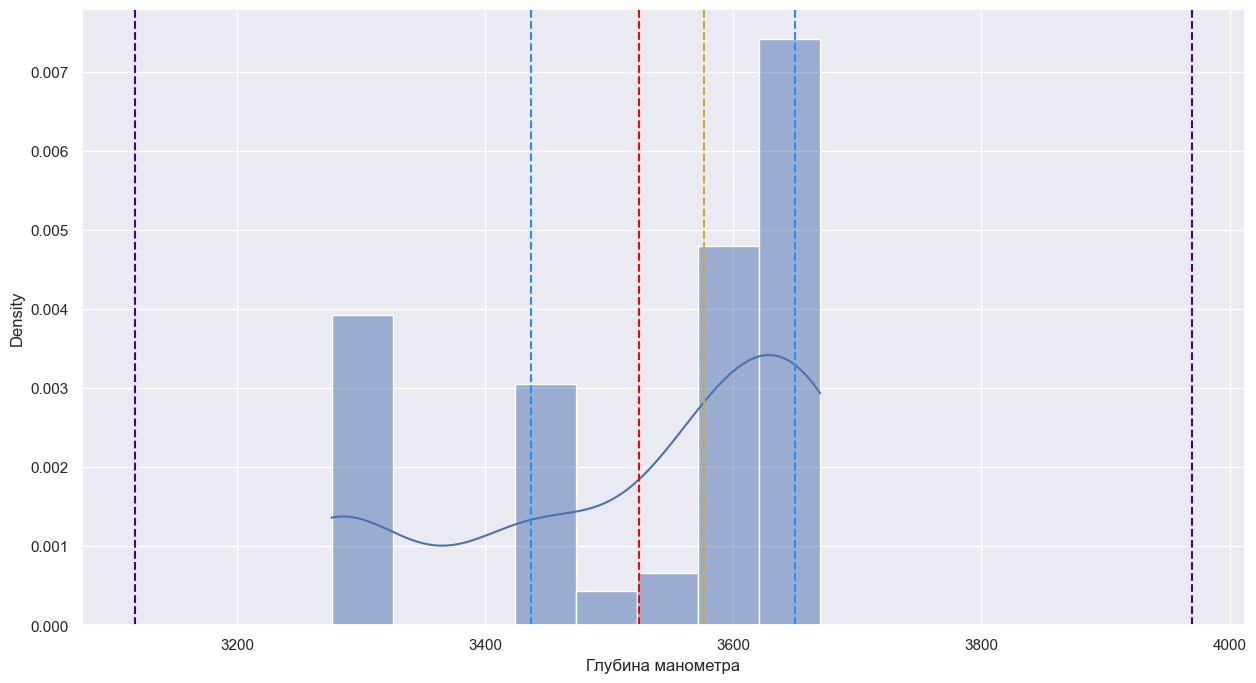

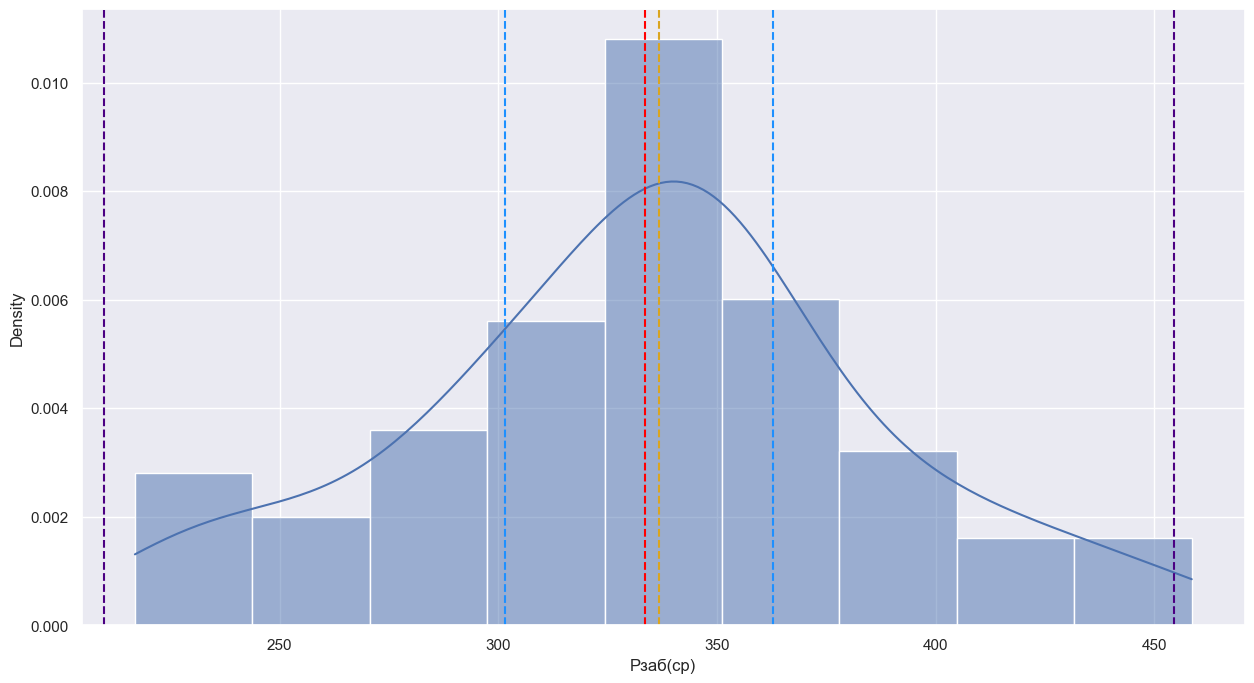

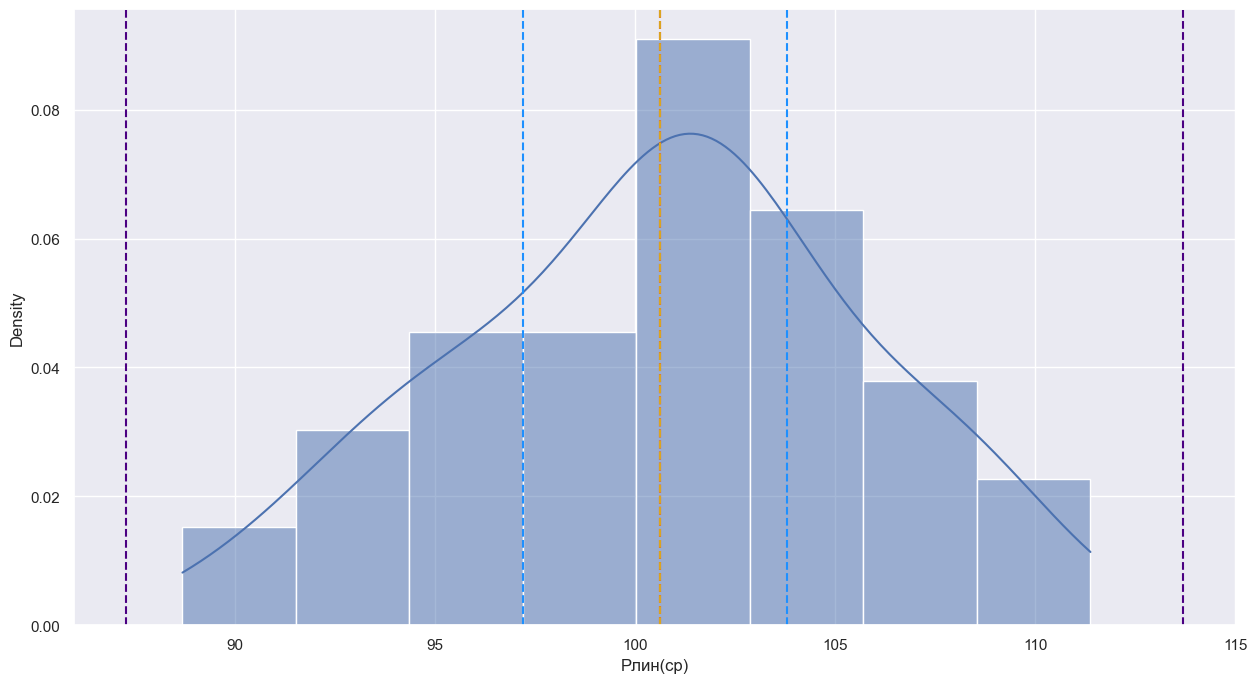

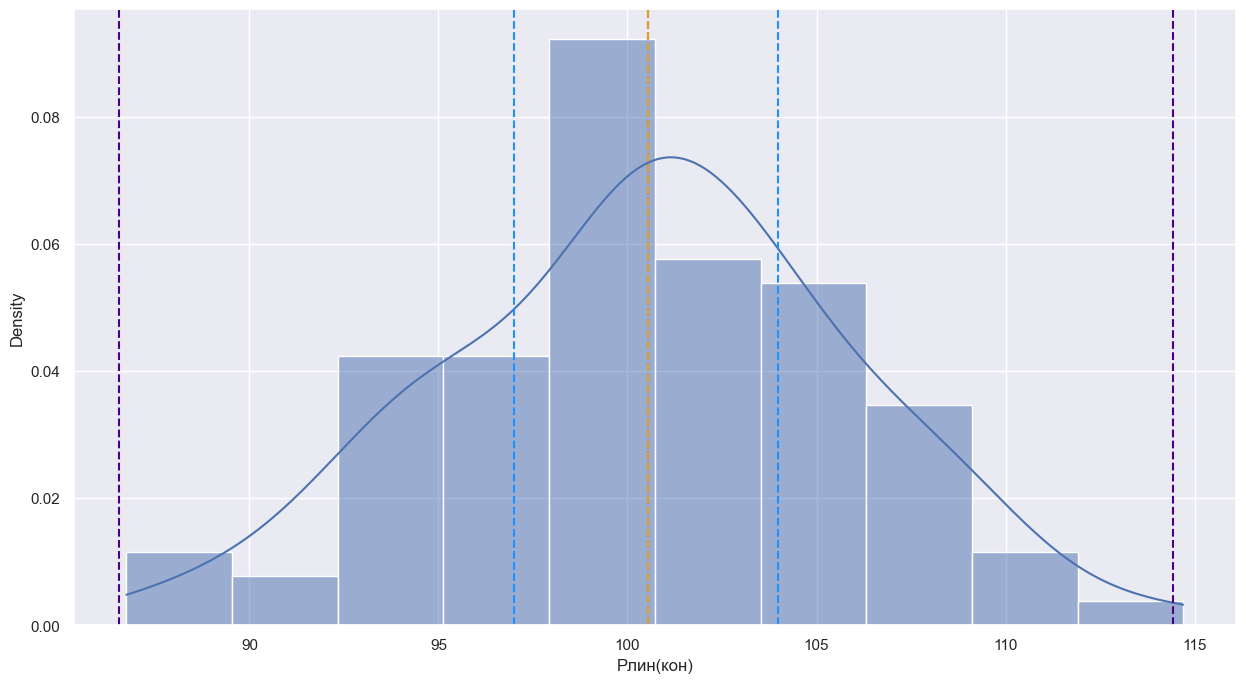

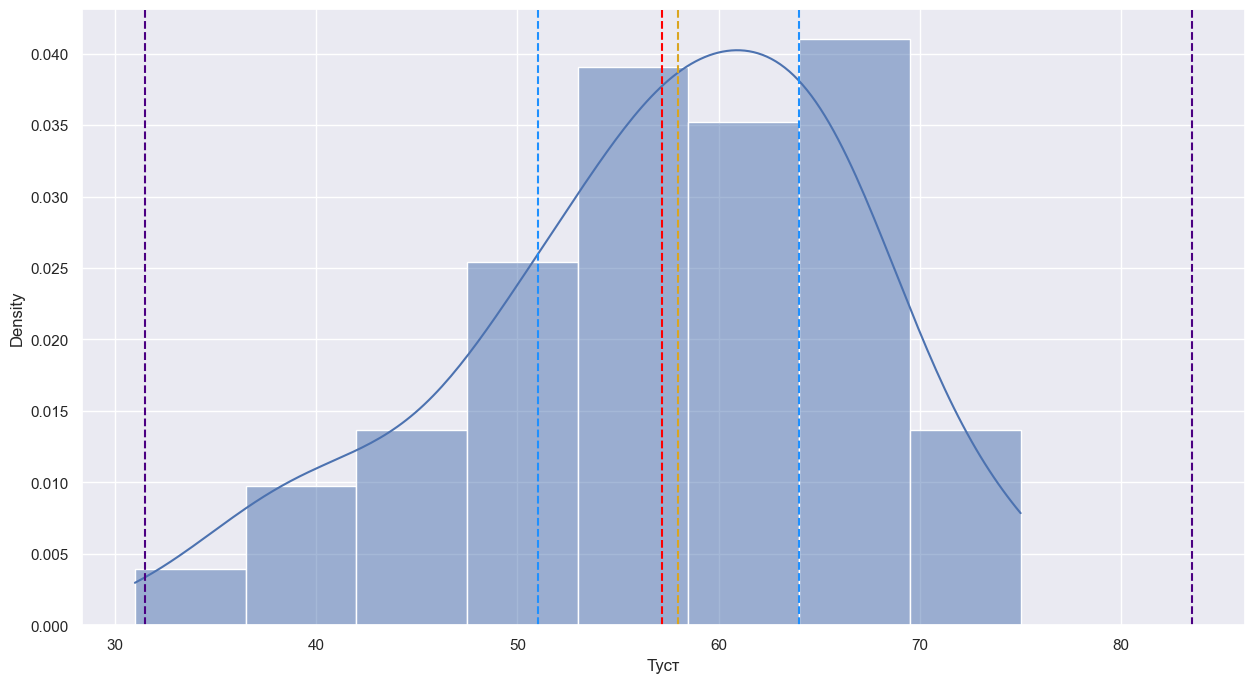

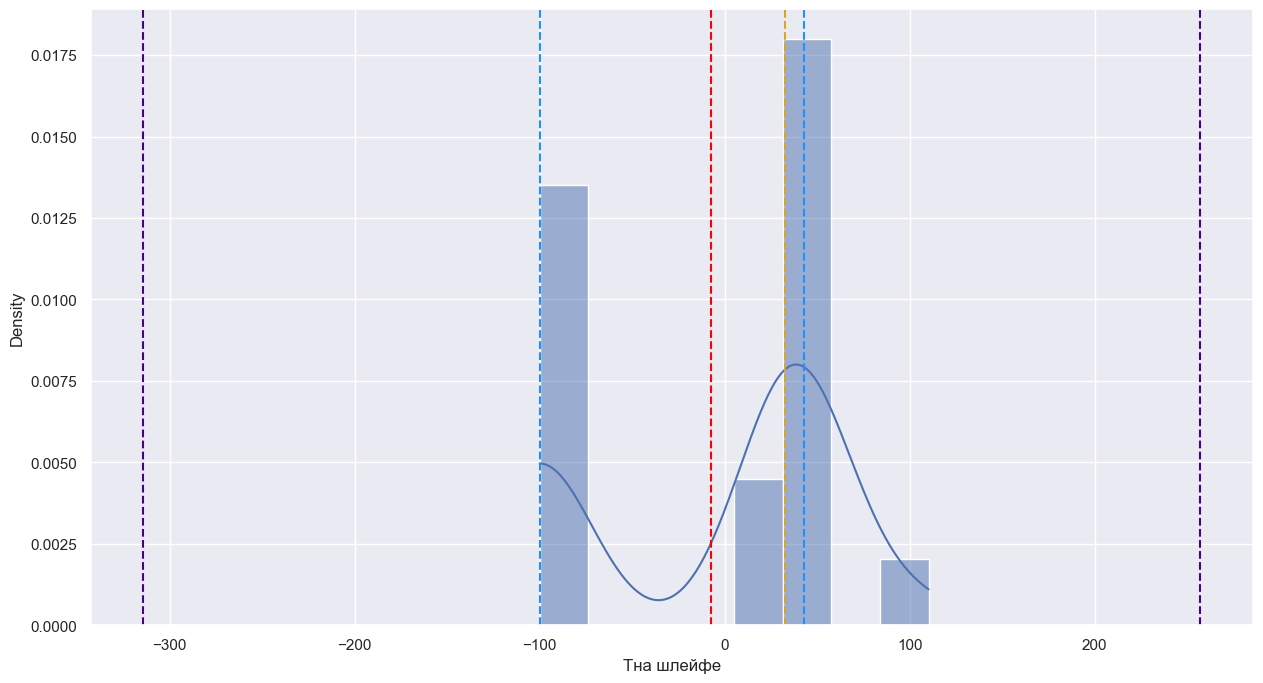

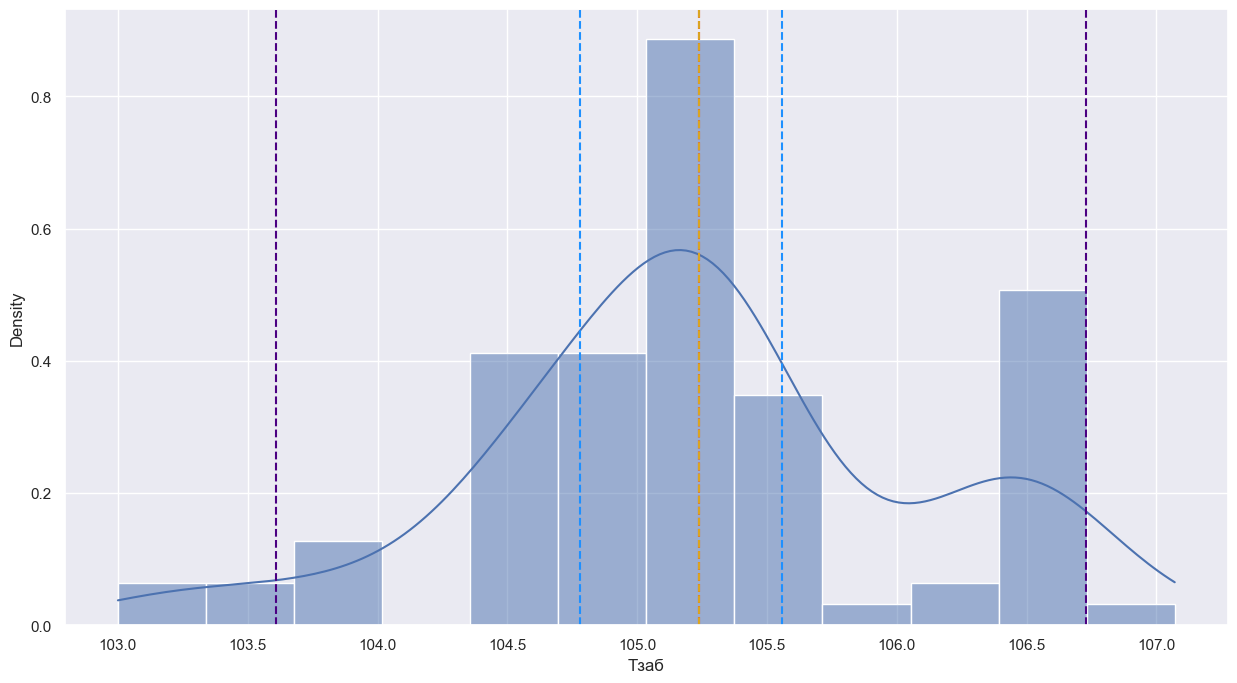

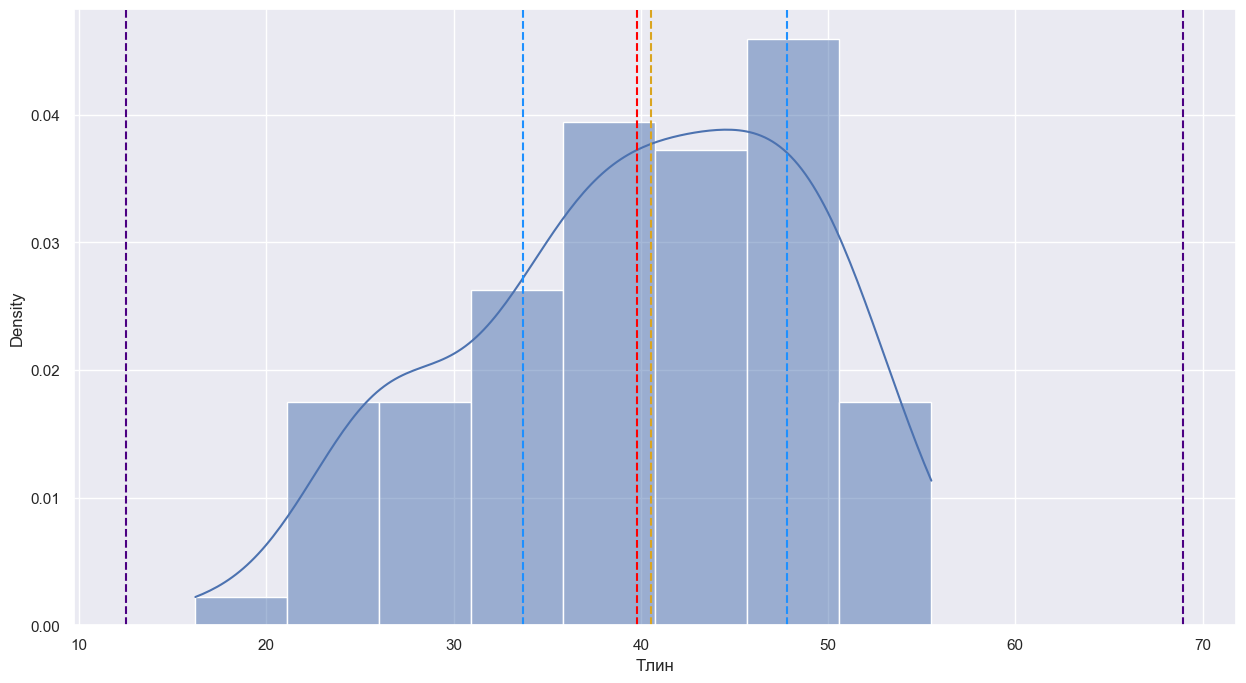

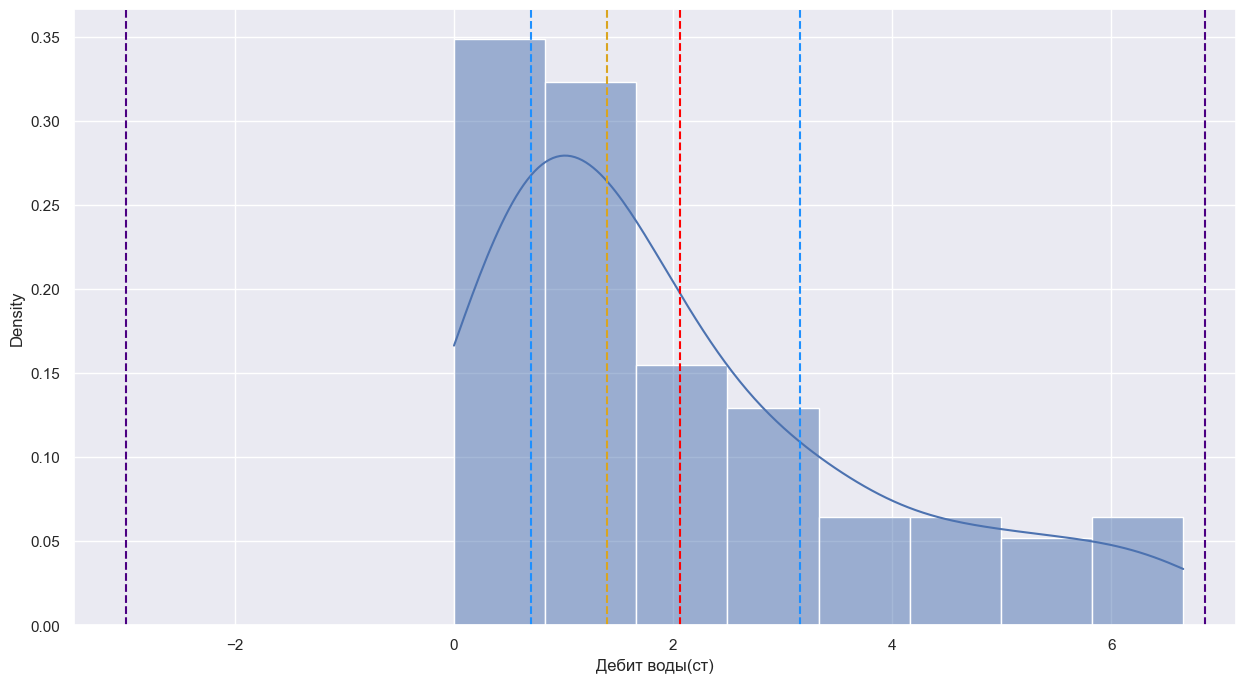

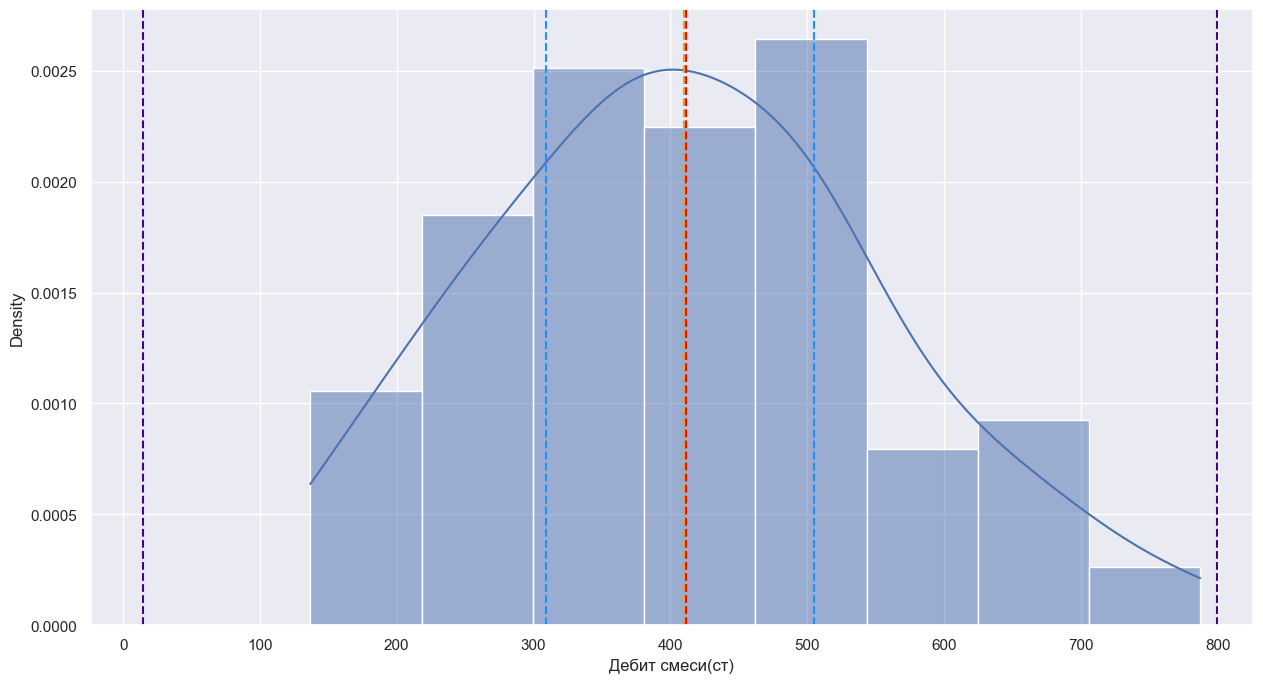

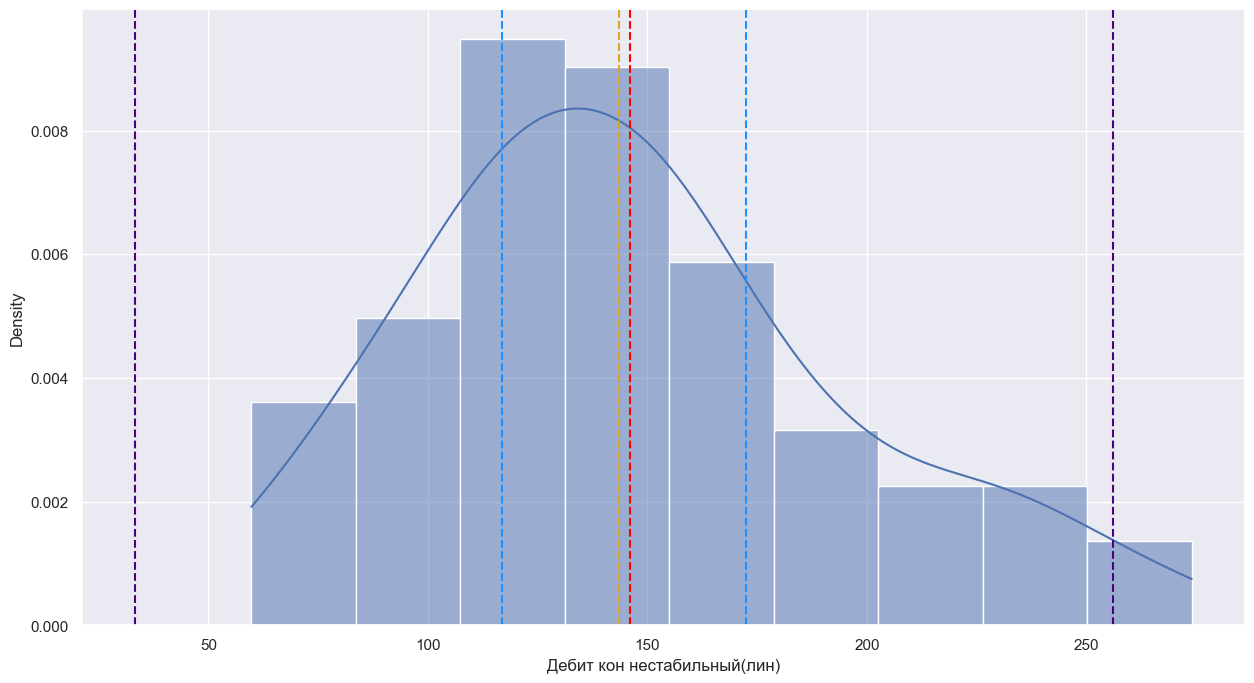

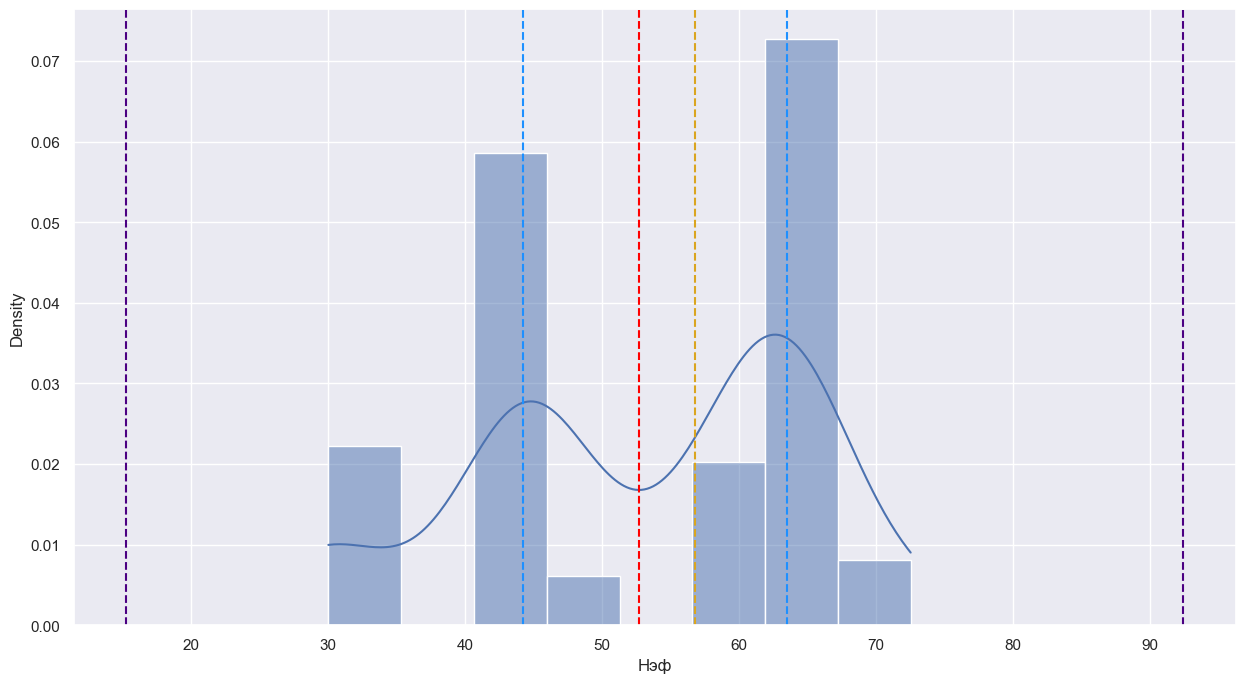

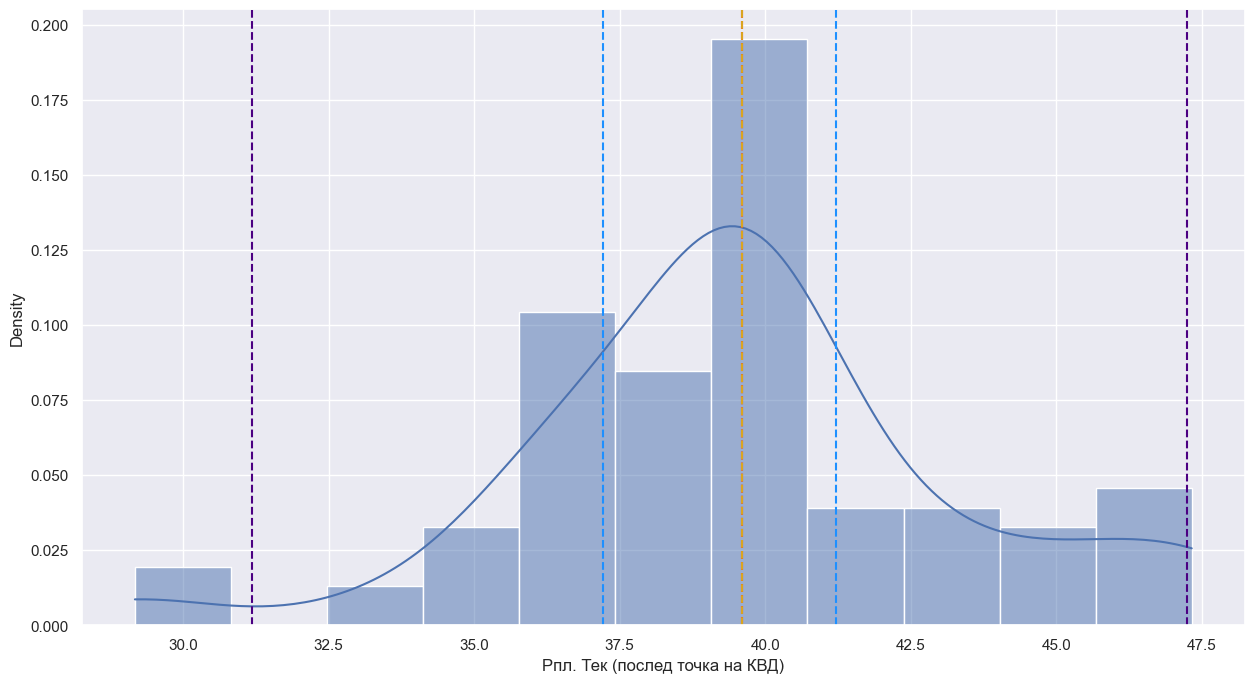

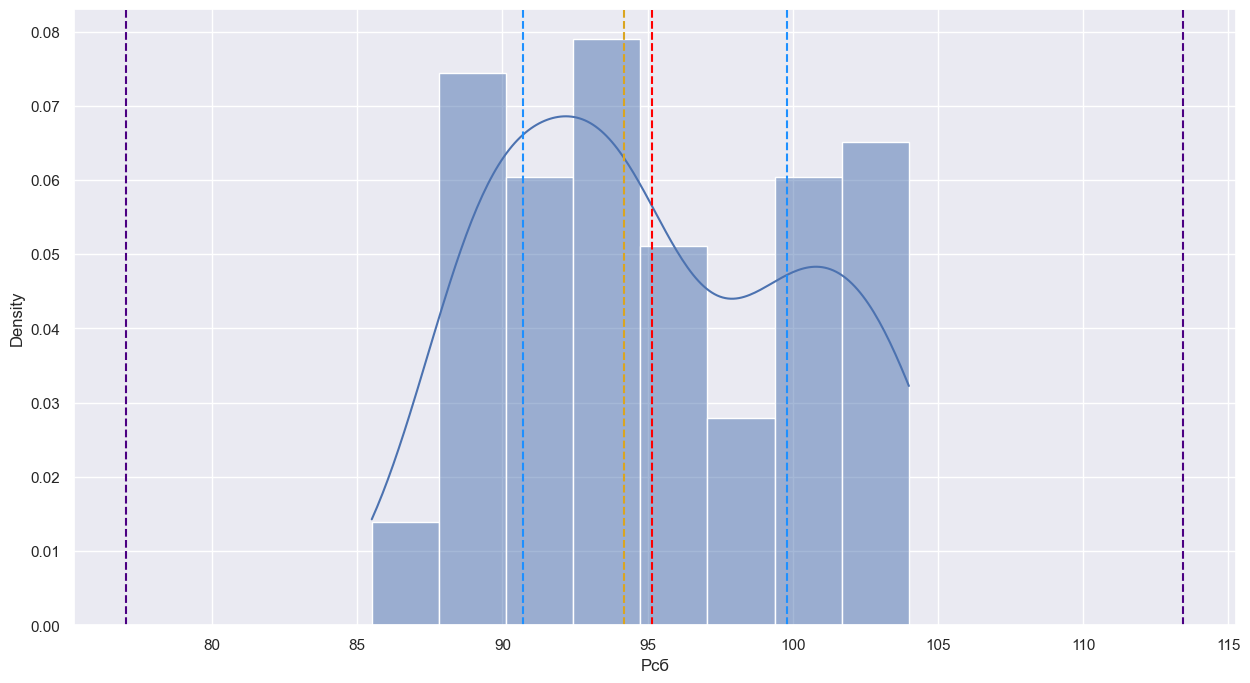

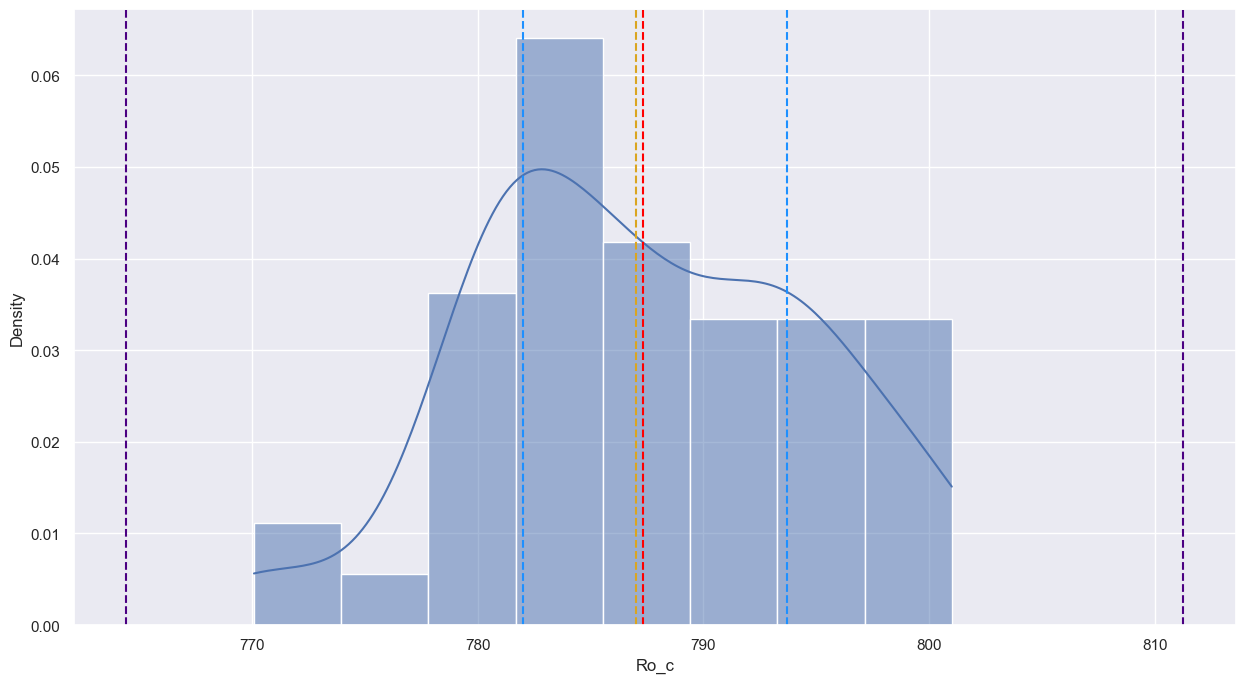

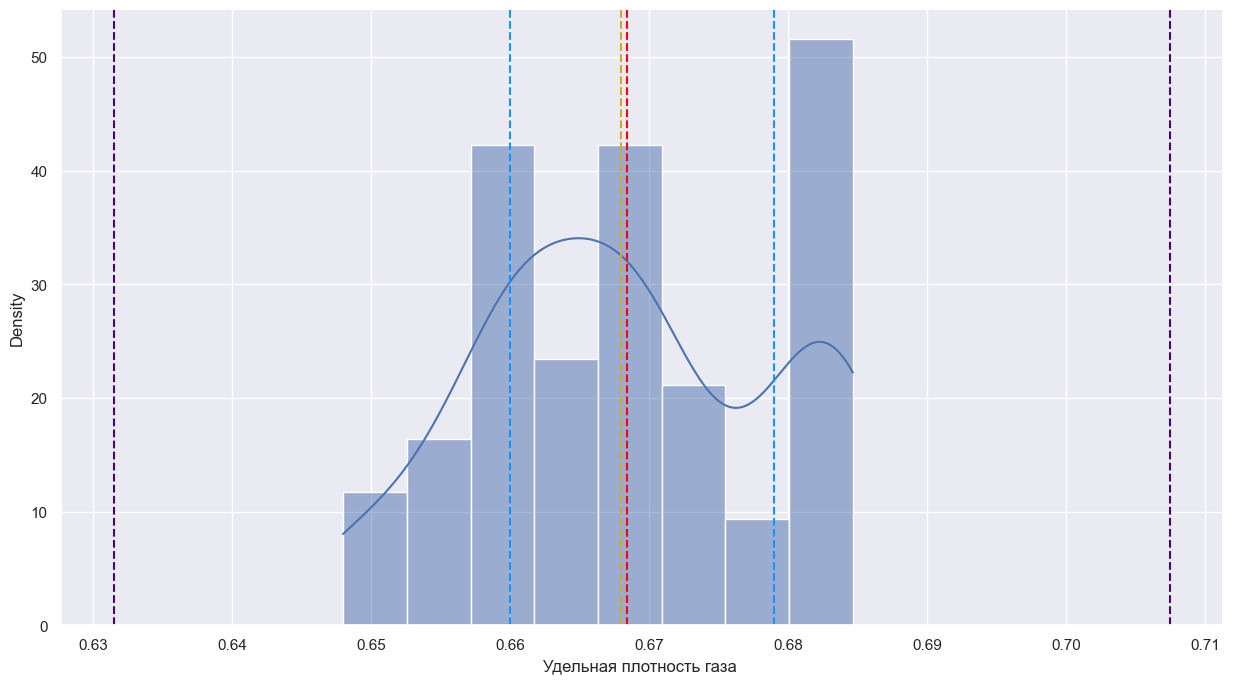

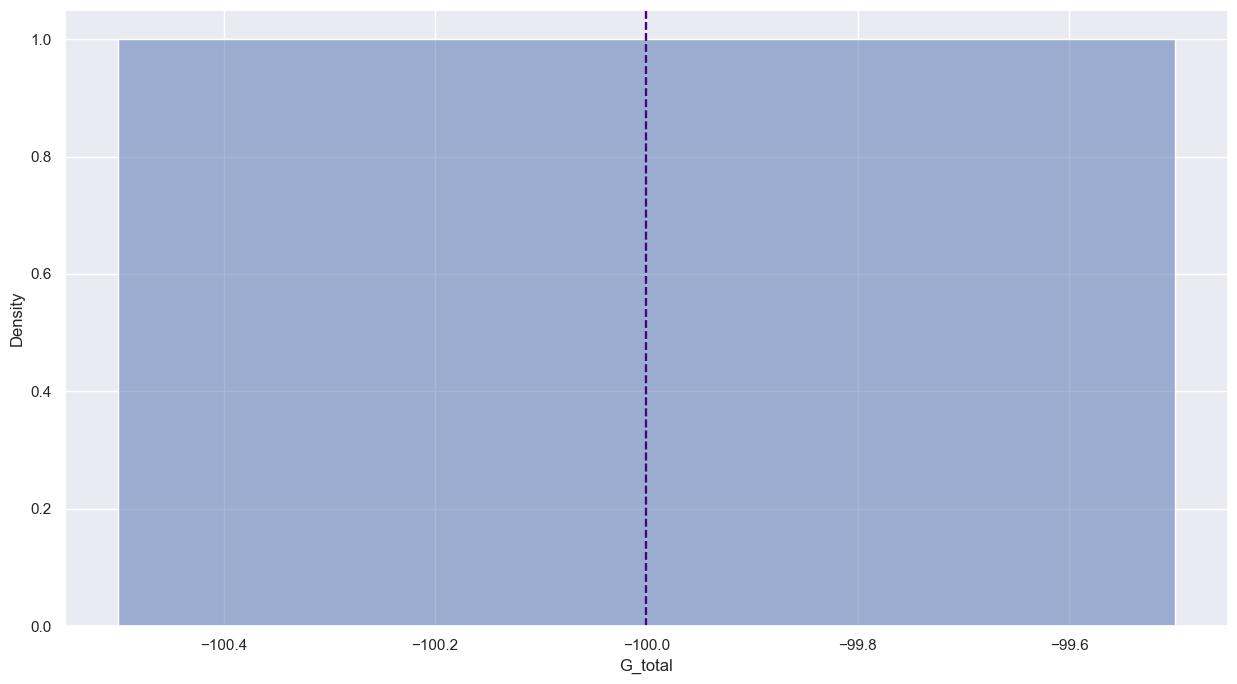

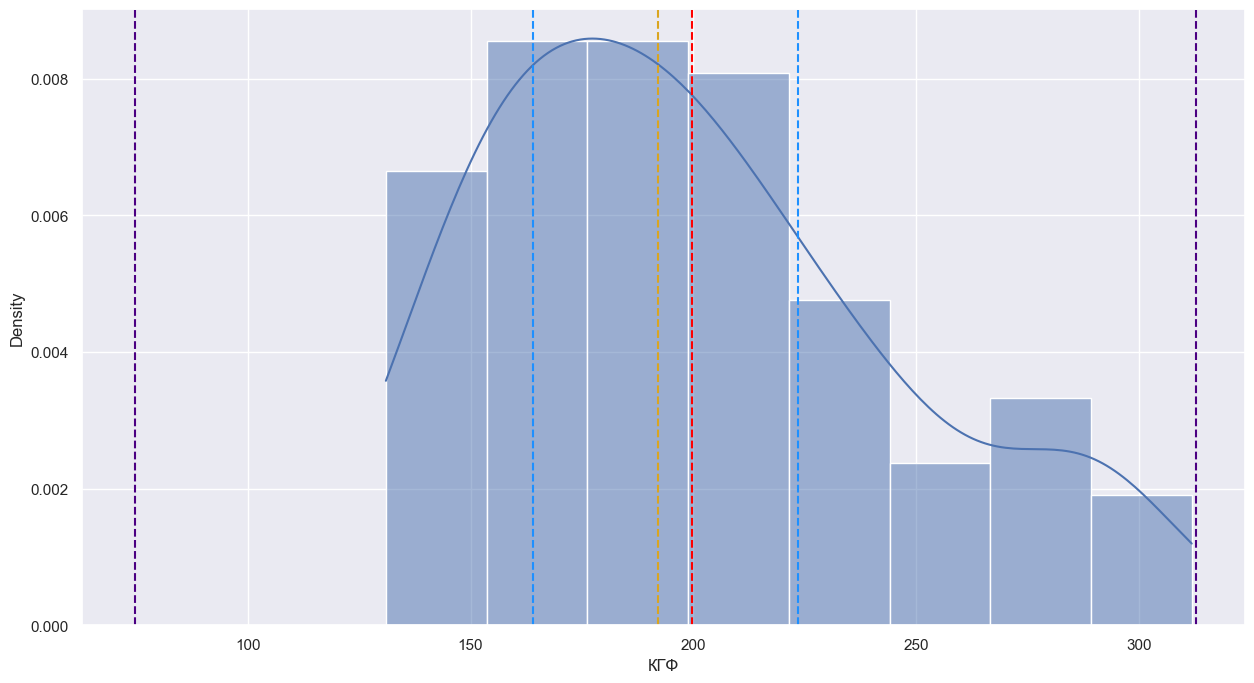

In [170]:
for i in cleaned_df.columns:
    plt.figure(i)
    sns.histplot(cleaned_df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10][i], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #first quarile
    plt.axvline(f.iloc[4][i], color="red", ls='--') #mean
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #meadian
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #third quatile
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

In [172]:
cleaned_df.head()

Глубина манометра  Рзаб(ср)  Pлин(ср)  Рлин(кон)  Туст  Тна шлейфе  \
0             3576.3     370.1     101.8      101.8  53.0        31.7   
1             3576.3     364.6     101.3      102.4  58.8        37.6   
2             3576.3     357.1     101.6      100.6  63.6        42.8   
3             3576.3     347.4      98.4       99.0  64.7        46.2   
4             3576.3     337.7      99.2       99.5  64.0        49.4   

         Тзаб  Tлин  Дебит воды(ст)  Дебит смеси(ст)  \
0  103.200000  32.5             0.4        231.24884   
1  103.000000  38.6             1.4        309.00166   
2  105.238671  43.4             1.9        388.11498   
3  105.238671  46.1             3.3        455.21452   
4  104.400000  49.9             4.6        504.58778   

   Дебит кон нестабильный(лин)   Нэф  Рпл. Тек (послед точка на КВД)   Pсб  \
0                        131.3  56.8                           45.25  93.6   
1                        158.5  56.8                           45.25  92.9   
2                        172.3  56.8                           45.25  91.4   
3                        181.5  56.8                           45.25  89.2   
4                        190.6  56.8                           45.25  89.7   

    Ro_c  Удельная плотность газа   G_total       КГФ  
0  801.0                  0.669449   -100.0  311.9094  
1  801.0                  0.669449   -100.0  288.6003  
2  801.0                  0.669449   -100.0  248.7906  
3  801.0                  0.669449   -100.0  223.5591  
4  801.0                  0.669449   -100.0  215.1486

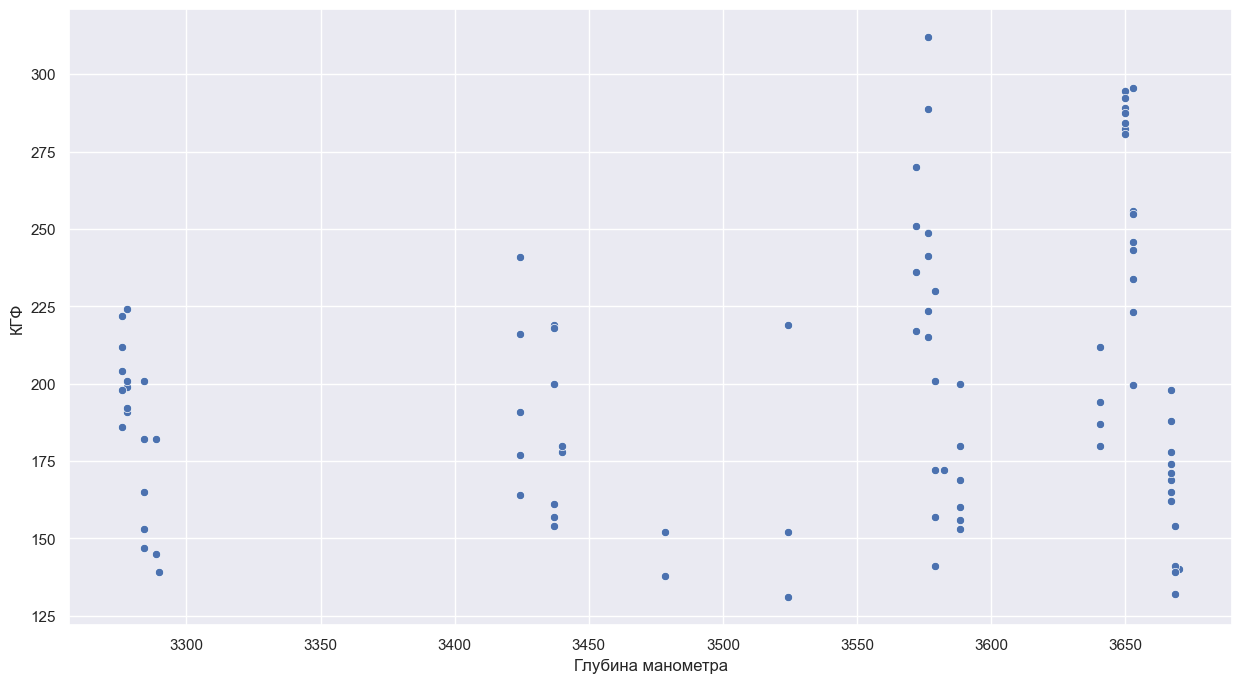

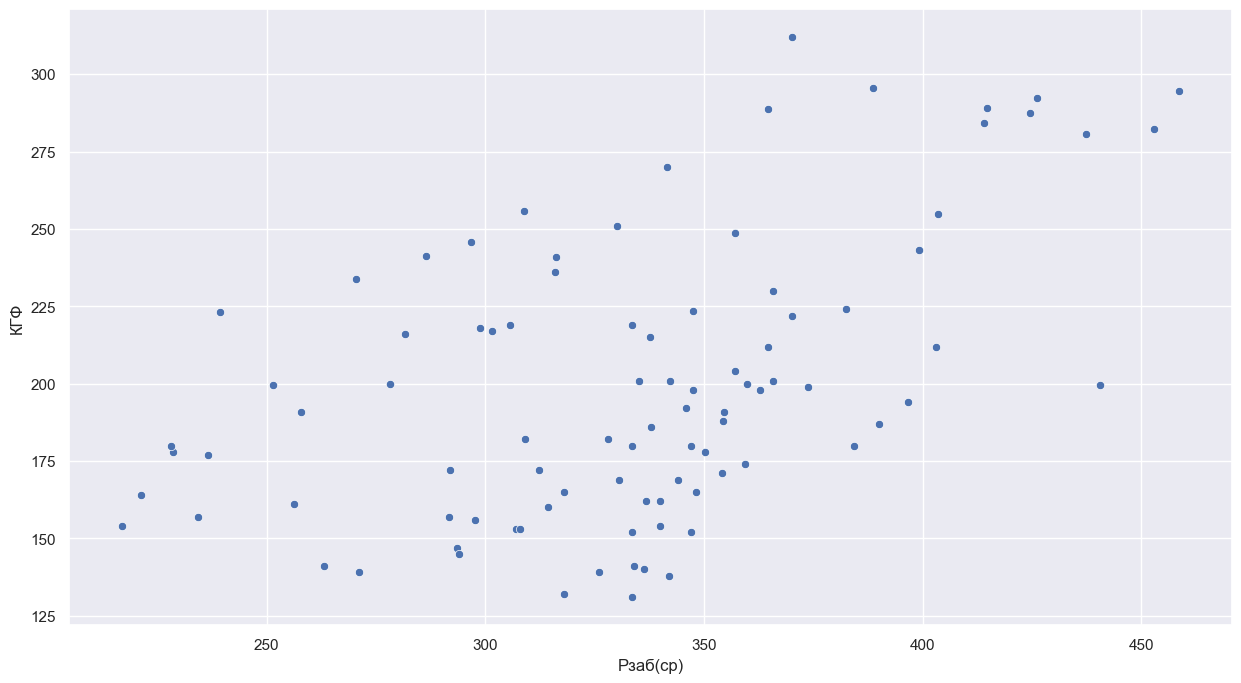

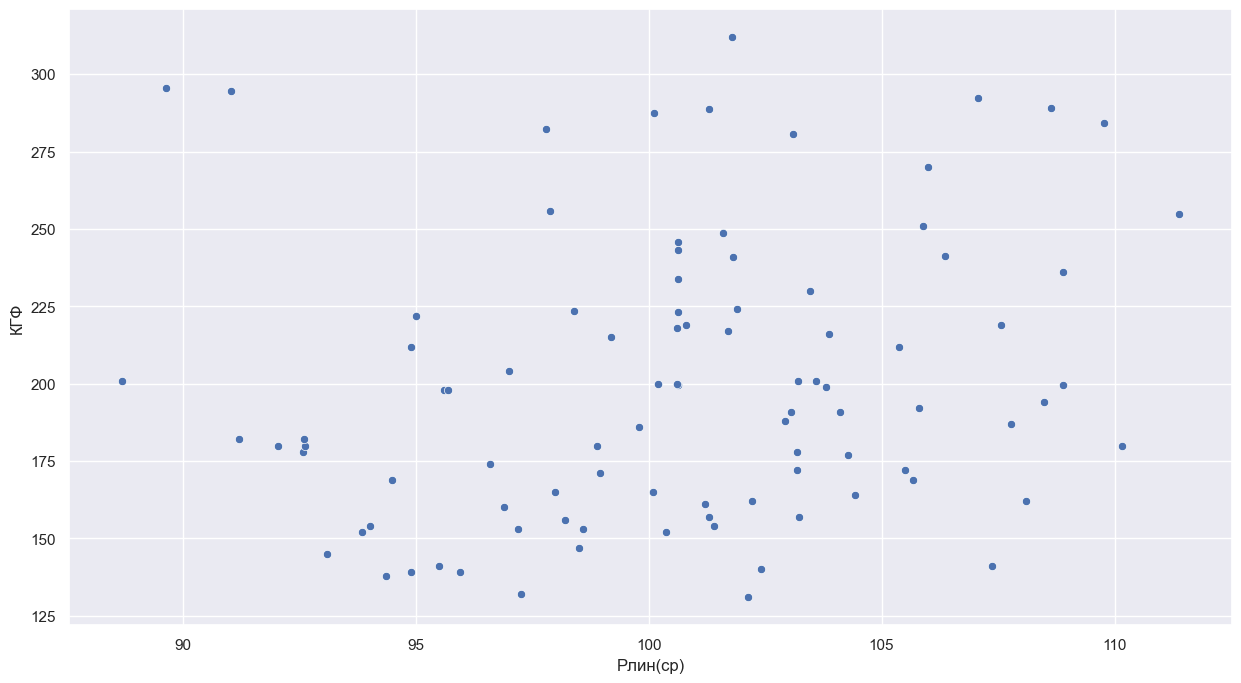

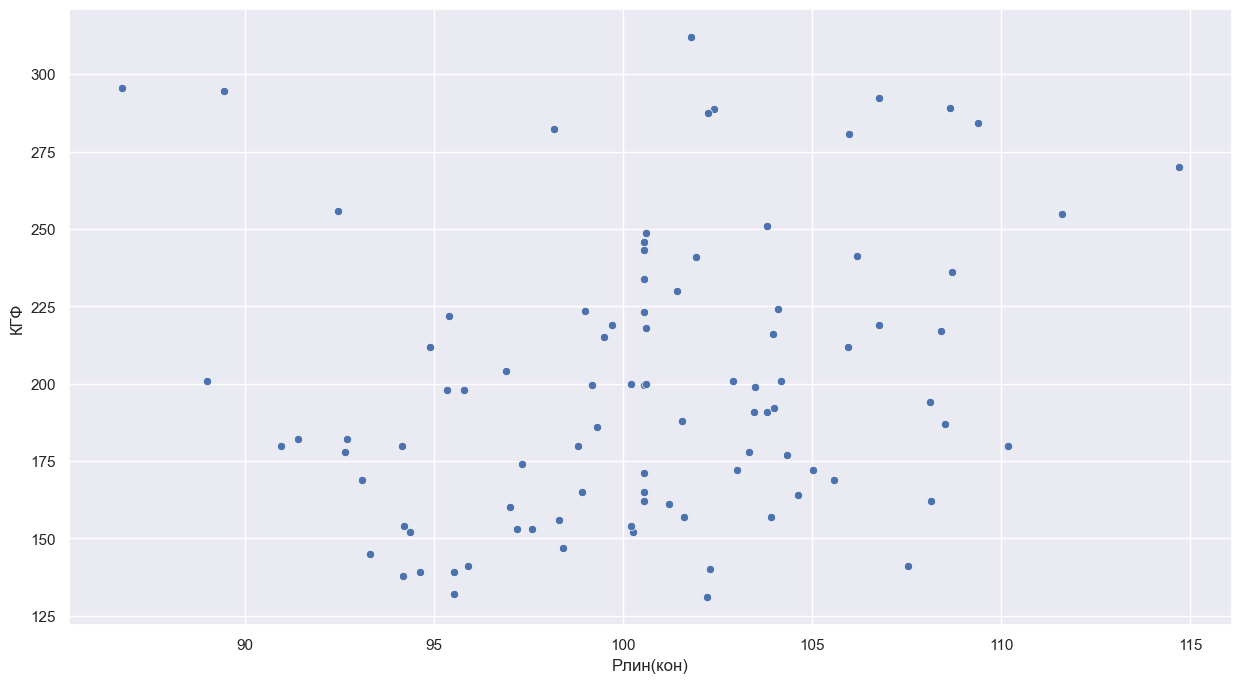

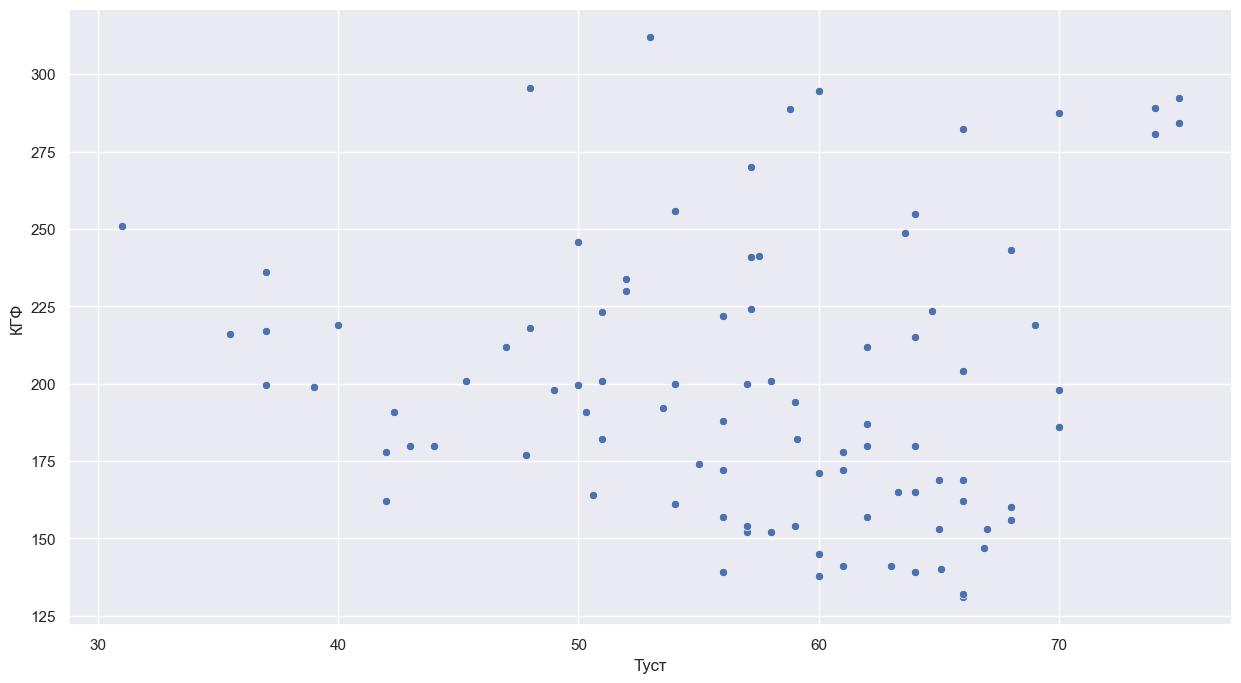

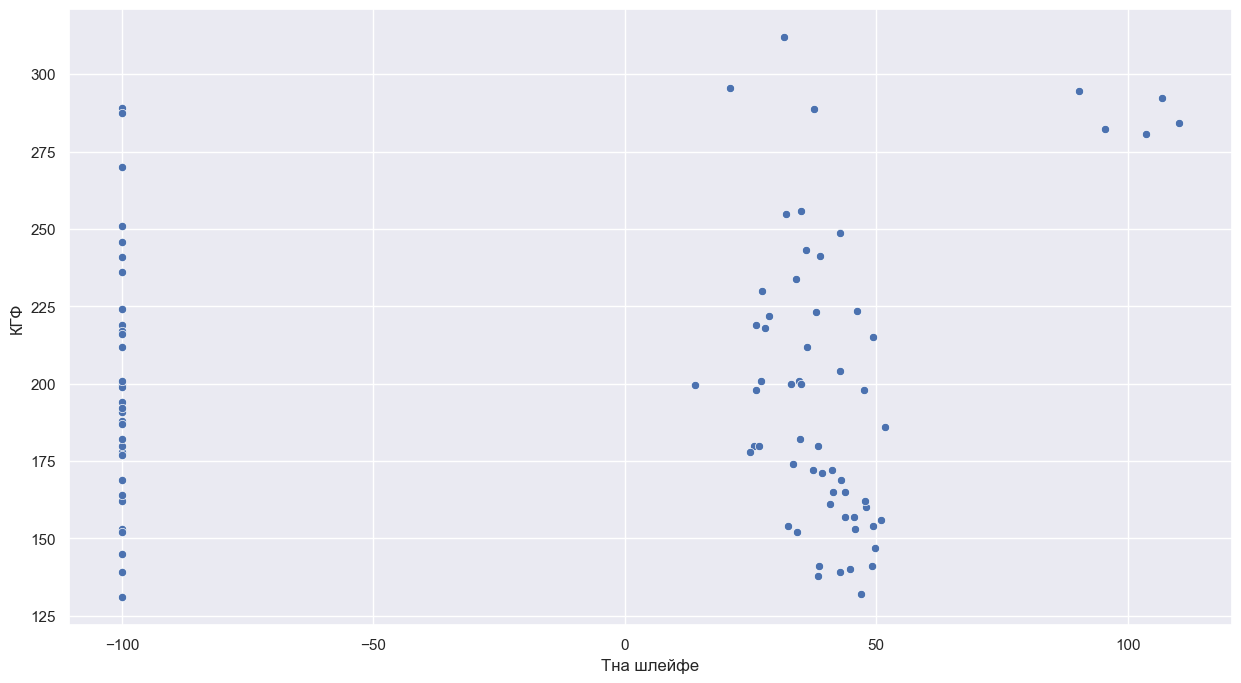

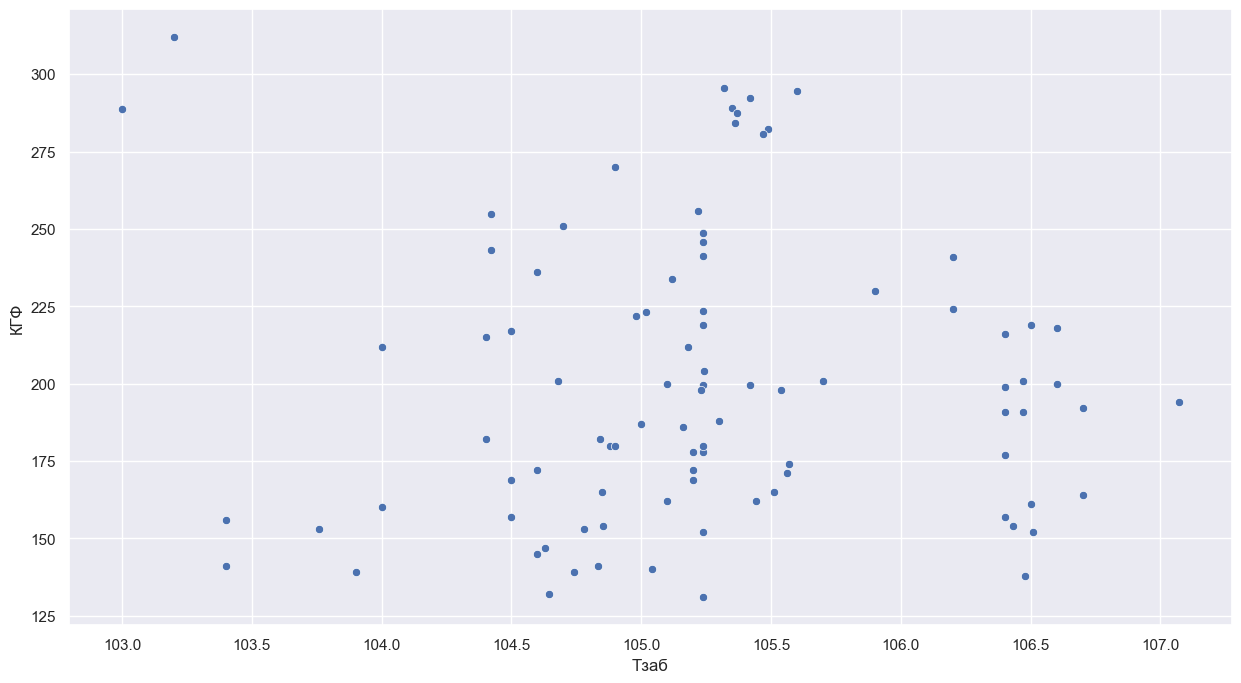

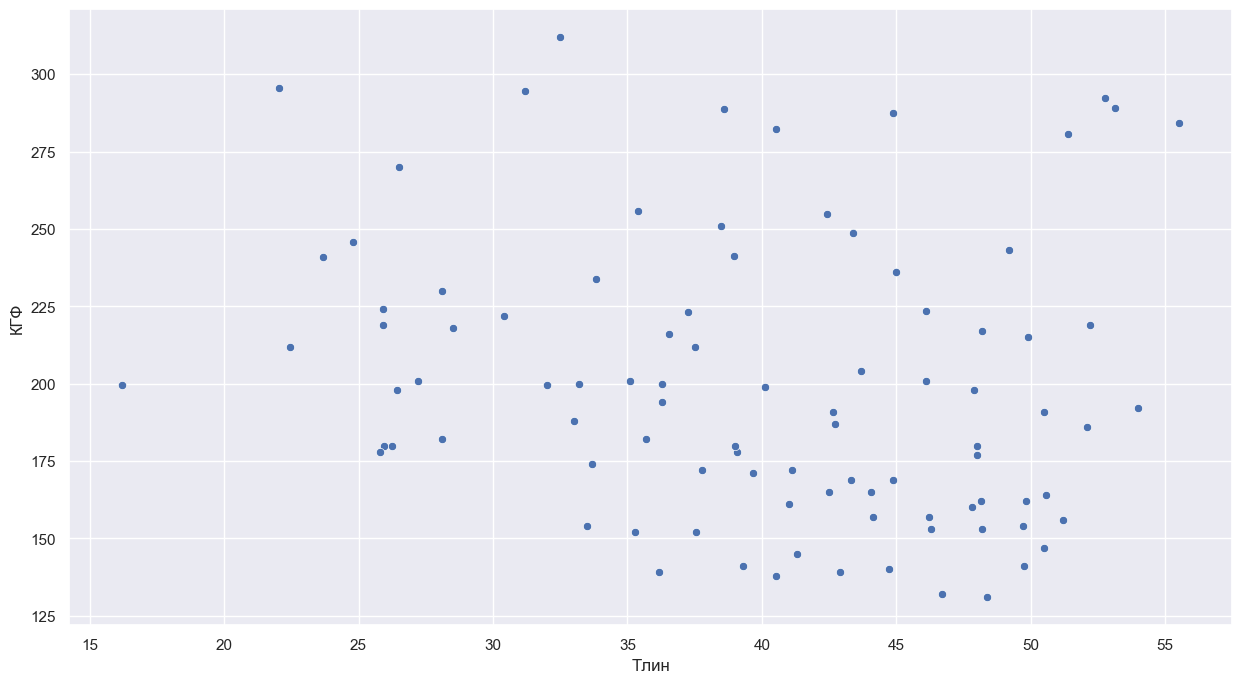

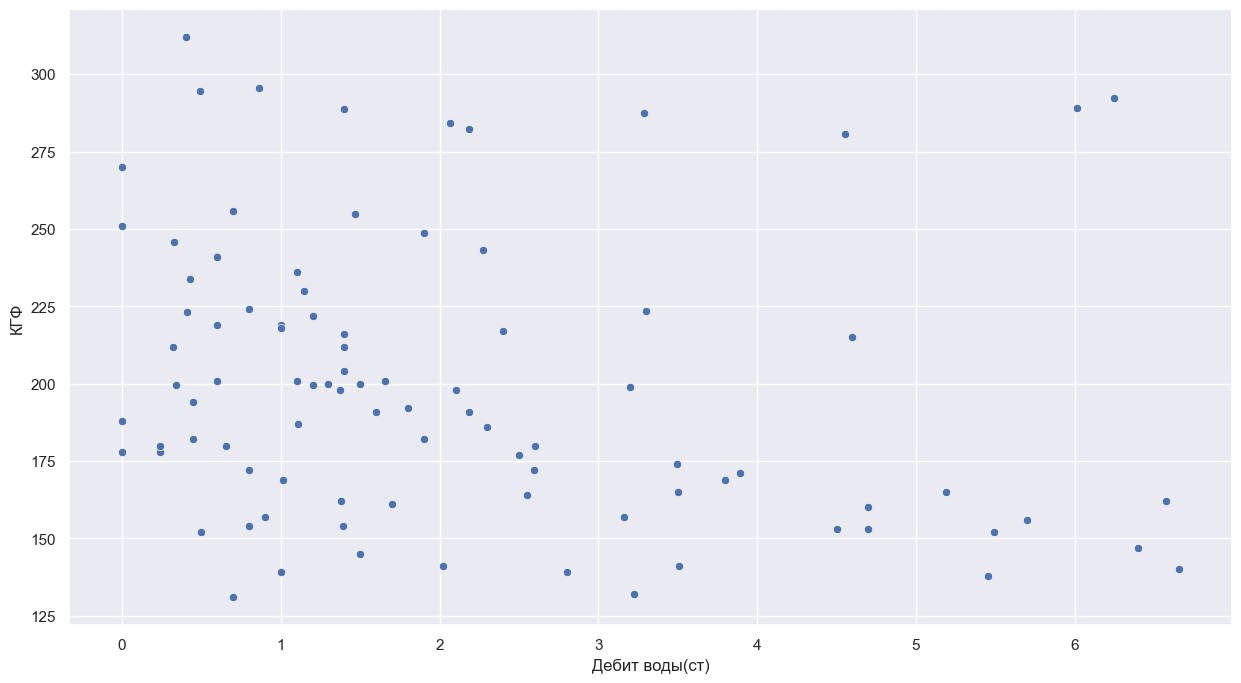

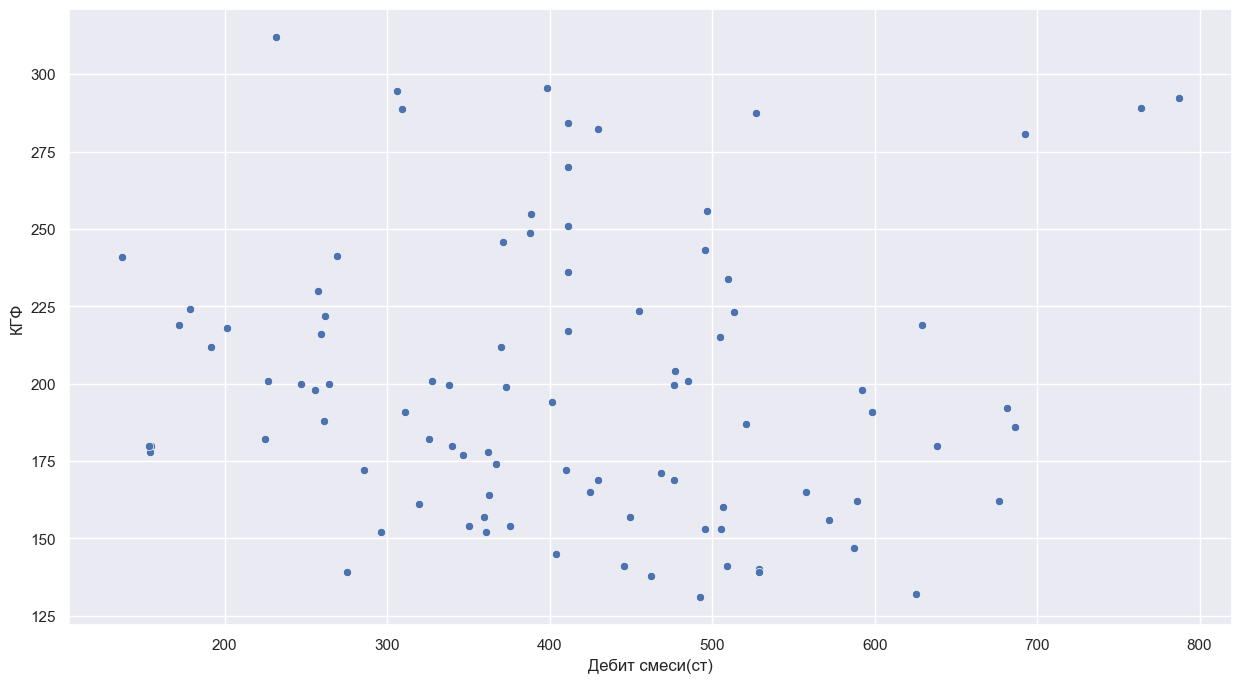

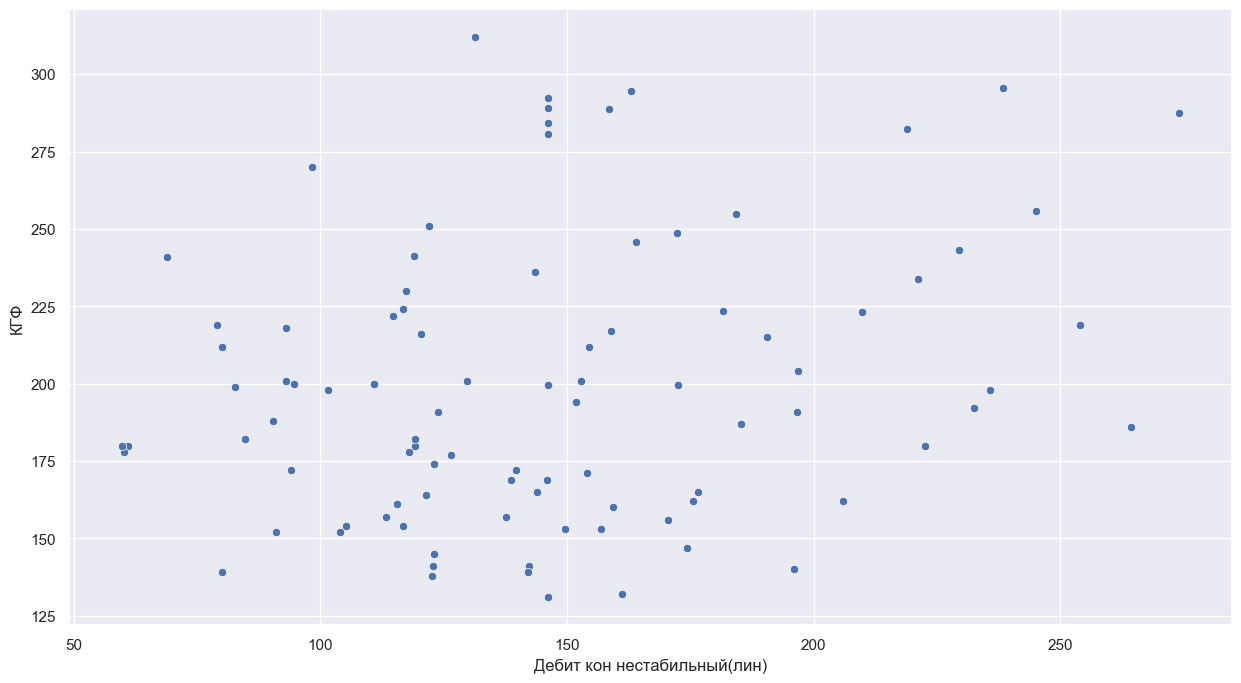

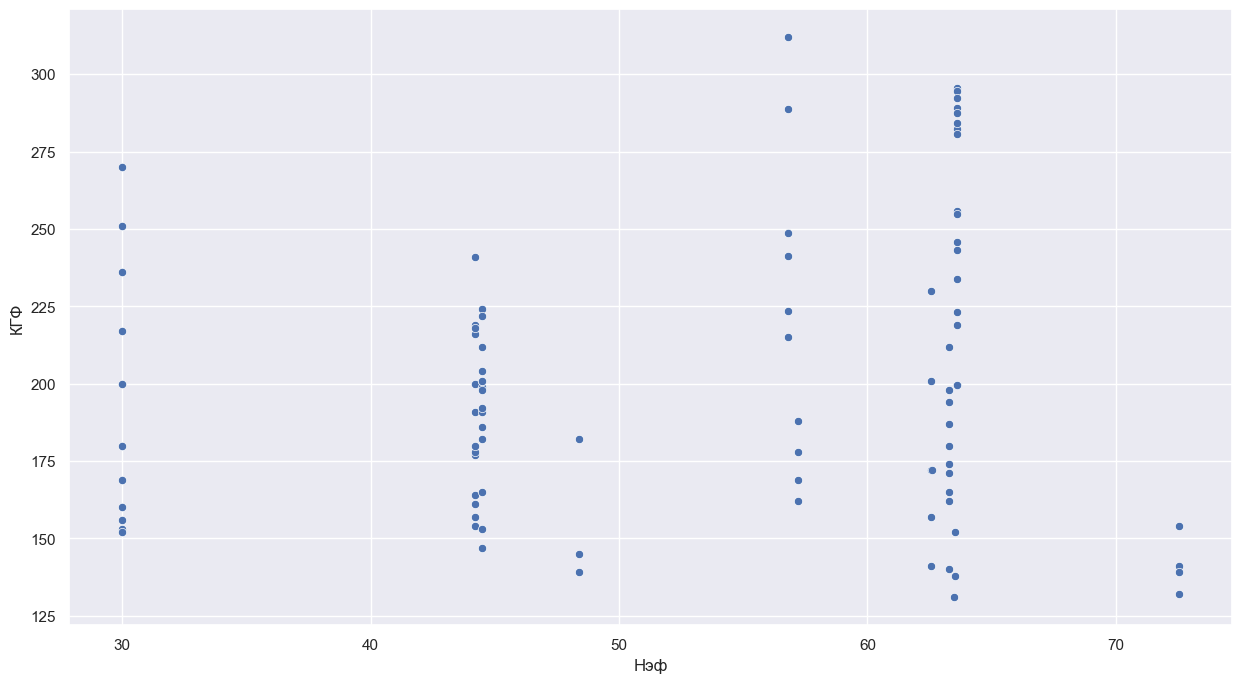

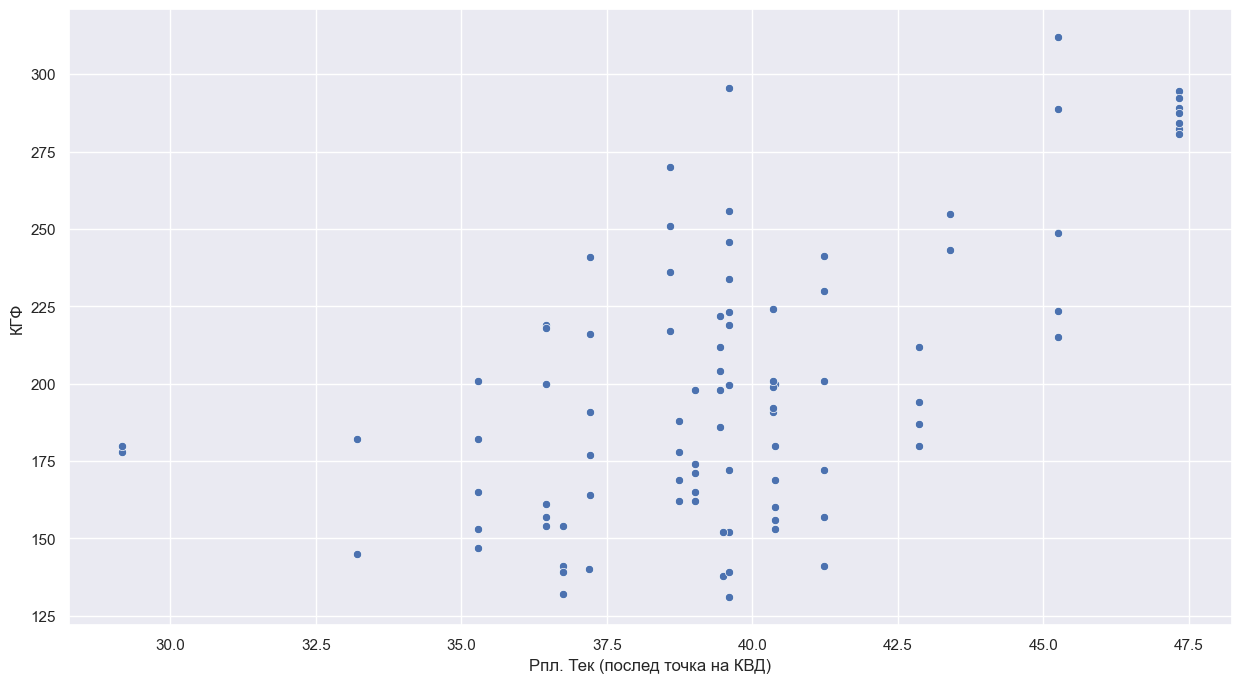

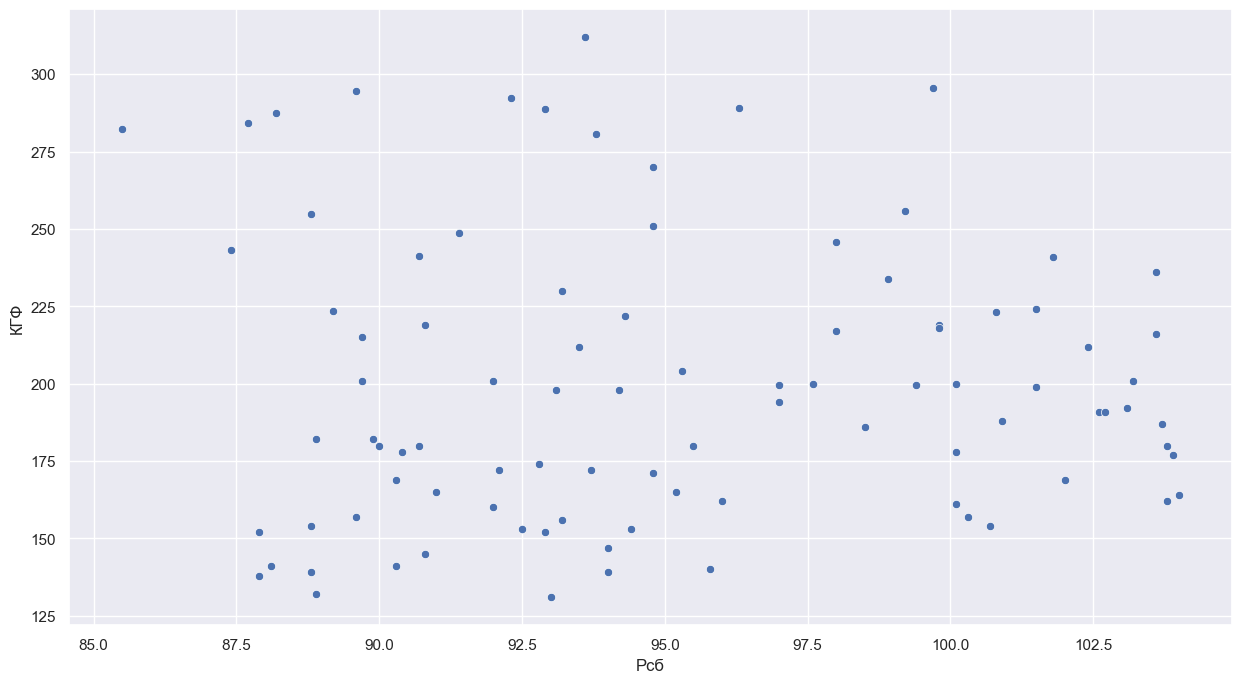

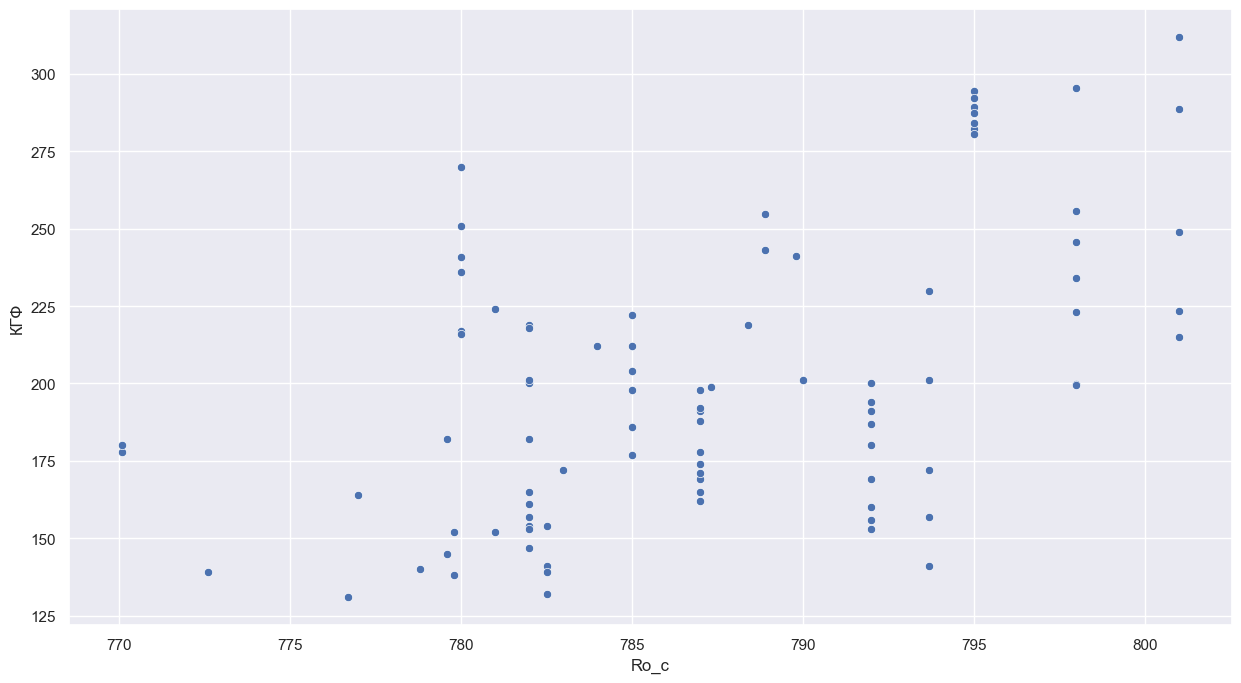

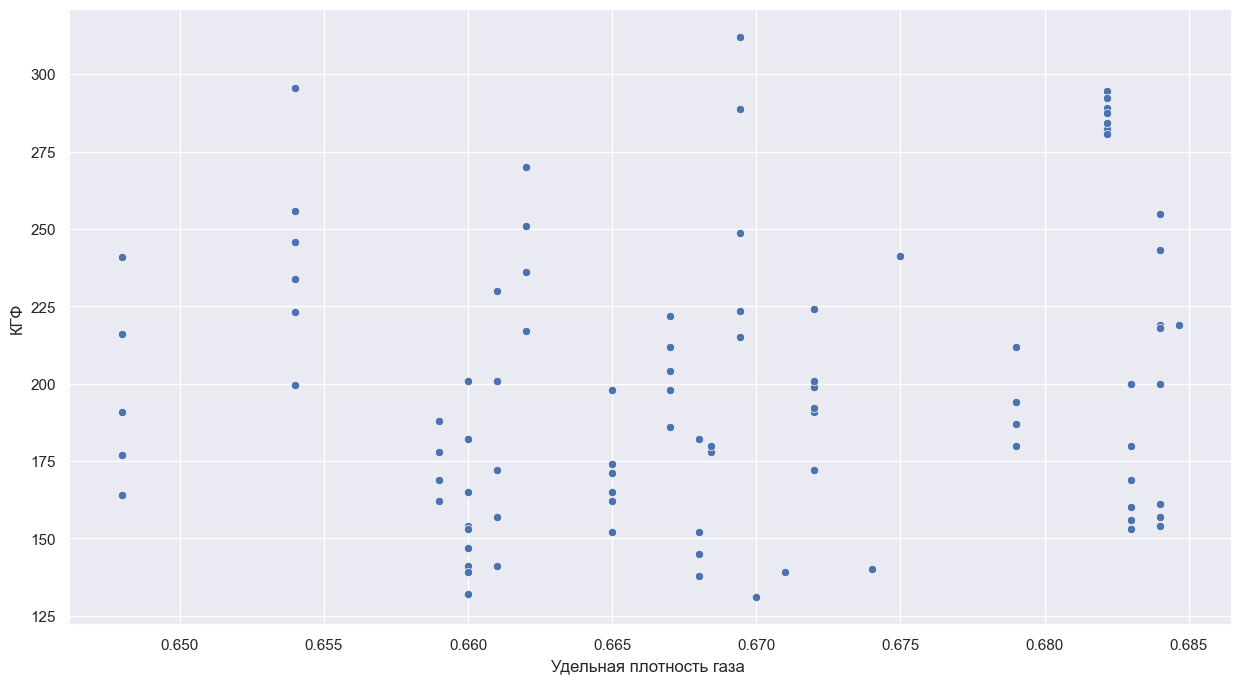

In [173]:
X1=cleaned_df.iloc[:, 0:16]

for i in X1.columns:
    plt.figure(i)
    sns.scatterplot(data=cleaned_df, y="КГФ", x=i)
    plt.show()

<Axes: >

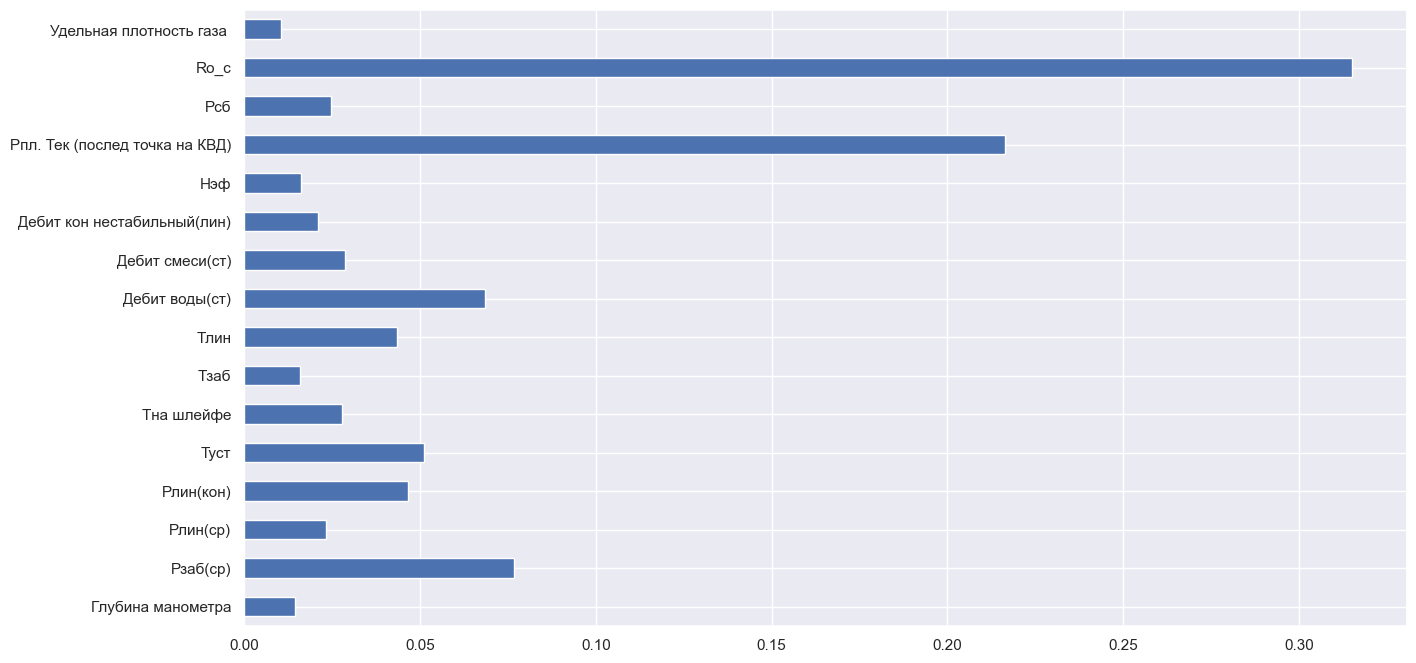

In [178]:
X = cleaned_df.iloc[:, 0: 16]
Y = cleaned_df.iloc[:, 17]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')